# Arinthi - M-Ighty EWS Use Case.

Arinti : https://arinti.ai - Wouter Baetens

M-Igthy : http://www.m-ighty.com/



EWS stands for Early warning score (info: see [2] )

#### Data:

Dataset : 20200124_ews_observations.csv, anonimized EWS patient data from the Royal Papworth Hospital (https://royalpapworth.nhs.uk/).

###### Column Legend:

PatientId: Unique identifier for the patient

ObservationDate: Date of the observation

EwsProcedure: Which EWS procedure has been used (> in your dataset, this will normally always be NEWS2.0)

EWS_Total: Total EWS score

SBP: Systolic Blood Pressure

SBP_Score: Contribution of SBP parameter to total EWS score

LOC: Level Of Consciousness

LOC_Score: Contribution of LOC parameter to total EWS score

SpO2: Peripheral capillary oxygen saturation (the amount of oxygen in the blood)

SpO2_Score: Contribution of SpO2 parameter to total EWS score

Add_O2: Is the patient receiving additional oxygen or not

Add_O2_Score: Contribution of Add_O2 parameter to total EWS score

HR: Heartrate

HR_Score: Contribution of HR parameter to total EWS score

RR: Respiratory Rate

RR_Score: Contribution of RR parameter to total EWS score

TEMP: Patient body temperature

TEMP_Score: Contribution of TEMP parameter to total EWS score

###### References

[1] Jason Brownlee : << Introduction to Time Series Forecasting With Python
                    How to Prepare Data and Develop Models to Predict the Future >>
                 2020, ed. v1.9
                 
[2] EWS info: https://en.wikipedia.org/wiki/Early_warning_score, https://mens-en-gezondheid.infonu.nl/diversen/184941-verpleegkunde-ews-score-early-warning-system.html)

[3] NEWS2 chart 3: https://www.rcplondon.ac.uk/file/9436/download

[4] https://www.rcplondon.ac.uk/projects/outputs/national-early-warning-score-news-2

[5] NEWS2:
       https://www.independentnurse.co.uk/professional-article/how-to-read-the-news-the-new-early-warning-system/218551/

[6] NEWS2 chart: https://nhsconnect.github.io/FHIR-NEWS2/index.html

## Variables studied

Load dataset:

In [2]:
import pandas as pd
import numpy as np

#df = pd.read_csv('20200124_ews_observations.csv', dtype={'SpO2_Score': np.float32})
df = pd.read_csv('20200124_ews_observations.csv', low_memory=False)

In [2]:
df.T

0                            1       \
PatientId                                 29                           30   
ObservationDate  2019-05-01 13:27:50.0000000  2019-05-01 15:27:44.0000000   
EwsProcedure                           NEWS2                        NEWS2   
EWS_Total                                  0                            3   
SBP                                      143                          NaN   
SBP_Score                                  0                          NaN   
LOC                                    ALERT                        ALERT   
LOC_Score                                  0                            0   
SpO2                                      96                           94   
SpO2_Score                                 0                            1   
Add_O2                                 False                        False   
Add_O2_Score                               0                            0   
HR                                        80                           83   
HR_Score                                   0                            0   
RR                                        18                           16   
RR_Score                                   0                            0   
TEMP                                    36.6                         36.5   
TEMP_Score                                 0                            0   

                                      2                            3       \
PatientId                                 31                           32   
ObservationDate  2019-05-01 15:54:27.0000000  2019-05-01 16:07:27.0000000   
EwsProcedure                           NEWS2                        NEWS2   
EWS_Total                                  1                            0   
SBP                                      117                          NaN   
SBP_Score                                  0                          NaN   
LOC                                    ALERT                        ALERT   
LOC_Score                                  0                            0   
SpO2                                      95                           98   
SpO2_Score                                 1                            0   
Add_O2                                 False                        False   
Add_O2_Score                               0                            0   
HR                                        75                           85   
HR_Score                                   0                            0   
RR                                        14                           19   
RR_Score                                   0                            0   
TEMP                                    37.3                         37.2   
TEMP_Score                                 0                            0   

                                      4                            5       \
PatientId                                 33                           32   
ObservationDate  2019-05-01 17:03:16.0000000  2019-05-01 18:02:29.0000000   
EwsProcedure                           NEWS2                        NEWS2   
EWS_Total                                  0                            0   
SBP                                      135                          NaN   
SBP_Score                                  0                          NaN   
LOC                                    ALERT                        ALERT   
LOC_Score                                  0                            0   
SpO2                                      97                           96   
SpO2_Score                                 0                            0   
Add_O2                                 False                        False   
Add_O2_Score                               0                            0   
HR                                        89                           82   
HR_Score                        

In [2]:
df.shape

(171736, 18)

We have 171736 rows, 17 features and 1 target (EWS_Total).

In [4]:
#df.describe(include='all').T

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171736 entries, 0 to 171735
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PatientId        171736 non-null  int64  
 1   ObservationDate  171736 non-null  object 
 2   EwsProcedure     171736 non-null  object 
 3   EWS_Total        171736 non-null  int64  
 4   SBP              160949 non-null  float64
 5   SBP_Score        160949 non-null  float64
 6   LOC              171736 non-null  object 
 7   LOC_Score        171736 non-null  int64  
 8   SpO2             171734 non-null  float64
 9   SpO2_Score       171734 non-null  float64
 10  Add_O2           171734 non-null  object 
 11  Add_O2_Score     171734 non-null  float64
 12  HR               171736 non-null  int64  
 13  HR_Score         171736 non-null  int64  
 14  RR               171736 non-null  int64  
 15  RR_Score         171736 non-null  int64  
 16  TEMP             171736 non-null  floa

In [4]:
df.columns

Index(['PatientId', 'ObservationDate', 'EwsProcedure', 'EWS_Total', 'SBP',
       'SBP_Score', 'LOC', 'LOC_Score', 'SpO2', 'SpO2_Score', 'Add_O2',
       'Add_O2_Score', 'HR', 'HR_Score', 'RR', 'RR_Score', 'TEMP',
       'TEMP_Score'],
      dtype='object')

In [5]:
df.dtypes

PatientId            int64
ObservationDate     object
EwsProcedure        object
EWS_Total            int64
SBP                float64
SBP_Score          float64
LOC                 object
LOC_Score            int64
SpO2               float64
SpO2_Score         float64
Add_O2              object
Add_O2_Score       float64
HR                   int64
HR_Score             int64
RR                   int64
RR_Score             int64
TEMP               float64
TEMP_Score           int64
dtype: object

In [6]:
df.index

RangeIndex(start=0, stop=171736, step=1)

In [7]:
df.isnull().sum(axis = 0)

PatientId              0
ObservationDate        0
EwsProcedure           0
EWS_Total              0
SBP                10787
SBP_Score          10787
LOC                    0
LOC_Score              0
SpO2                   2
SpO2_Score             2
Add_O2                 2
Add_O2_Score           2
HR                     0
HR_Score               0
RR                     0
RR_Score               0
TEMP                   0
TEMP_Score             0
dtype: int64

In [8]:
df.duplicated().any()

True

In [9]:
DuplicateRowsDF = df[df.duplicated()]
DuplicateRowsDF

PatientId              ObservationDate EwsProcedure  EWS_Total    SBP  \
151            52  2019-05-03 18:46:40.0000000        NEWS2          1    NaN   
10734         942  2019-05-30 13:40:41.0000000        NEWS2          2  159.0   
17533        1365  2019-06-11 18:51:39.0000000        NEWS2          0  136.0   
17534        1241  2019-06-11 18:51:44.0000000        NEWS2          2  129.0   
17535        1146  2019-06-11 18:51:53.0000000        NEWS2          3  124.0   
17539        1519  2019-06-11 18:56:10.0000000        NEWS2          6  104.0   
17542        1494  2019-06-11 18:57:04.0000000        NEWS2          8  120.0   
17546        1376  2019-06-11 18:59:02.0000000        NEWS2          4   98.0   
17550        1023  2019-06-11 19:00:40.0000000        NEWS2          4  105.0   
101007       6798  2019-10-05 23:10:48.0000000        NEWS2          3  114.0   
101008       6798  2019-10-05 23:10:57.0000000        NEWS2          3  114.0   
137877       8697  2019-11-16 01:42:27.0000000        NEWS2          1  123.0   
157779       9473  2019-12-12 15:54:21.0000000        NEWS2          2  149.0   
157852       9577  2019-12-12 17:54:48.0000000        NEWS2          6  133.0   

        SBP_Score    LOC  LOC_Score  SpO2  SpO2_Score Add_O2  Add_O2_Score  \
151           NaN  ALERT          0  97.0         0.0  False           0.0   
10734         0.0  ALERT          0  98.0         0.0   True           2.0   
17533         0.0  ALERT          0  97.0         0.0  False           0.0   
17534         0.0  ALERT          0  89.0         0.0   True           2.0   
17535         0.0  ALERT          0  91.0         3.0  False           0.0   
17539         1.0  ALERT          0  24.0         3.0   True           2.0   
17542         0.0  ALERT          0  85.0         3.0   True           2.0   
17546         2.0  ALERT          0  92.0         2.0  False           0.0   
17550         1.0  ALERT          0  96.0         0.0   True           2.0   
101007        0.0  ALERT          0  92.0         2.0  False           0.0   
101008        0.0  ALERT          0  93.0         2.0  False           0.0   
137877        0.0  ALERT          0  94.0         1.0  False           0.0   
157779        0.0  ALERT          0  98.0         0.0  False           0.0   
157852        0.0  ALERT          0  95.0         1.0   True           2.0   

        HR  HR_Score  RR  RR_Score  TEMP  TEMP_Score  
151     84         0  17         0  37.7           0  
10734   79         0  18         0  38.0           0  
17533   86         0  17         0  36.5           0  
17534   84         0  17         0  37.3           0  
17535   80         0  19         0  37.8           0  
17539   66         0  12         0  36.8           0  
17542   84         0  25         3  36.6           0  
17546   61         0  18         0  36.4           0  
17550   94         1  16         0  36.8           0  
101007  96         1  15         0  37.3           0  
101008  96         1  15         0  37.3           0  
137877  68         0  16         0  37.1           0  
157779  72         0  22         2  36.8           0  
157852  84         0  27         3  37.8           0

In [10]:
df[df.duplicated() == True]

PatientId              ObservationDate EwsProcedure  EWS_Total    SBP  \
151            52  2019-05-03 18:46:40.0000000        NEWS2          1    NaN   
10734         942  2019-05-30 13:40:41.0000000        NEWS2          2  159.0   
17533        1365  2019-06-11 18:51:39.0000000        NEWS2          0  136.0   
17534        1241  2019-06-11 18:51:44.0000000        NEWS2          2  129.0   
17535        1146  2019-06-11 18:51:53.0000000        NEWS2          3  124.0   
17539        1519  2019-06-11 18:56:10.0000000        NEWS2          6  104.0   
17542        1494  2019-06-11 18:57:04.0000000        NEWS2          8  120.0   
17546        1376  2019-06-11 18:59:02.0000000        NEWS2          4   98.0   
17550        1023  2019-06-11 19:00:40.0000000        NEWS2          4  105.0   
101007       6798  2019-10-05 23:10:48.0000000        NEWS2          3  114.0   
101008       6798  2019-10-05 23:10:57.0000000        NEWS2          3  114.0   
137877       8697  2019-11-16 01:42:27.0000000        NEWS2          1  123.0   
157779       9473  2019-12-12 15:54:21.0000000        NEWS2          2  149.0   
157852       9577  2019-12-12 17:54:48.0000000        NEWS2          6  133.0   

        SBP_Score    LOC  LOC_Score  SpO2  SpO2_Score Add_O2  Add_O2_Score  \
151           NaN  ALERT          0  97.0         0.0  False           0.0   
10734         0.0  ALERT          0  98.0         0.0   True           2.0   
17533         0.0  ALERT          0  97.0         0.0  False           0.0   
17534         0.0  ALERT          0  89.0         0.0   True           2.0   
17535         0.0  ALERT          0  91.0         3.0  False           0.0   
17539         1.0  ALERT          0  24.0         3.0   True           2.0   
17542         0.0  ALERT          0  85.0         3.0   True           2.0   
17546         2.0  ALERT          0  92.0         2.0  False           0.0   
17550         1.0  ALERT          0  96.0         0.0   True           2.0   
101007        0.0  ALERT          0  92.0         2.0  False           0.0   
101008        0.0  ALERT          0  93.0         2.0  False           0.0   
137877        0.0  ALERT          0  94.0         1.0  False           0.0   
157779        0.0  ALERT          0  98.0         0.0  False           0.0   
157852        0.0  ALERT          0  95.0         1.0   True           2.0   

        HR  HR_Score  RR  RR_Score  TEMP  TEMP_Score  
151     84         0  17         0  37.7           0  
10734   79         0  18         0  38.0           0  
17533   86         0  17         0  36.5           0  
17534   84         0  17         0  37.3           0  
17535   80         0  19         0  37.8           0  
17539   66         0  12         0  36.8           0  
17542   84         0  25         3  36.6           0  
17546   61         0  18         0  36.4           0  
17550   94         1  16         0  36.8           0  
101007  96         1  15         0  37.3           0  
101008  96         1  15         0  37.3           0  
137877  68         0  16         0  37.1           0  
157779  72         0  22         2  36.8           0  
157852  84         0  27         3  37.8           0

In [11]:
df[df.duplicated() == True].count()

PatientId          14
ObservationDate    14
EwsProcedure       14
EWS_Total          14
SBP                13
SBP_Score          13
LOC                14
LOC_Score          14
SpO2               14
SpO2_Score         14
Add_O2             14
Add_O2_Score       14
HR                 14
HR_Score           14
RR                 14
RR_Score           14
TEMP               14
TEMP_Score         14
dtype: int64

In [12]:
def UniqueValues(df):
    # Print the number of unique values of each column, only printing those that have less than 100 unique values

    col = df.columns.tolist()  # Redo this list because columns dropped
    NbrSamples = len(df)

    for c in col:
        s = sorted(set(df[c]))
        #s = set(df[c])
        count = len(s)
        if count == NbrSamples:
            print(f"\n {c} \n\nPossible Index: {count} unique values")
        elif count < 100:
            print(f"\n {c}: {s}")
        else:
            print(f"\n {c}: {count} unique values")



In [15]:
UniqueValues(df)


 PatientId: 10136 unique values

 ObservationDate: 170783 unique values

 EwsProcedure: ['NEWS2']

 EWS_Total: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 19]

 SBP: 10964 unique values

 SBP_Score: 10791 unique values

 LOC: ['ALERT', 'NEW_CONFUSION', 'PAIN', 'UNRESPONSIVE', 'VOICE']

 LOC_Score: [0, 3]

 SpO2: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, nan, nan, 7.0, 9.0, 10.0, 12.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 28.0, 32.0, 36.0, 40.0, 46.0, 50.0, 56.0, 60.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]

 SpO2_Score: [0.0, 1.0, 2.0, 3.0, nan, nan]

 Add_O2: [False, True, nan]

 Add_O2_Score: [0.0, nan, 2.0, nan]

 HR: 180 unique values

 HR_Score: [0, 1, 2, 3]

 RR: [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 3

In [13]:
# Hart Rate
# see https://www.webmd.com/heart-disease/heart-failure/watching-rate-monitor#3)
# Maximum hart rate seems to depend on age. We do not have the patient age in the dataset !

HR = set(df['HR'])
print(len(HR))
print(HR)

180
{20, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 196, 198, 199, 200, 208, 210, 239, 252}


In [17]:
# Period of measurement records:

print("Period of measurements from ", df.ObservationDate.min(), " to ", df.ObservationDate.max() )

Period of measurements from  2019-05-01 13:27:50.0000000  to  2020-01-02 09:03:56.0000000


In [22]:
# Count nbr of patients and occurences of same patient (rows per patient)

NbrOfPatients = df.PatientId.nunique()
print("Number of Patients = ", NbrOfPatients, "\n")

PatientsNbrRows = df.groupby(['PatientId'])['PatientId'].count().sort_values(ascending=False)
print("\t>= 200 records = ", PatientsNbrRows[PatientsNbrRows > 199].count())
print("\t>= 100 records = ", PatientsNbrRows[PatientsNbrRows > 99].count())
print("\t>= 50 records = ", PatientsNbrRows[PatientsNbrRows > 49].count())
print("\t>= 10 records = ", PatientsNbrRows[PatientsNbrRows > 9].count())
print("\t2 records = ", PatientsNbrRows[PatientsNbrRows == 2].count())
print("\t1 record = ", PatientsNbrRows[PatientsNbrRows == 1].count())

Number of Patients =  10055 

	>= 200 records =  28
	>= 100 records =  200
	>= 50 records =  749
	>= 10 records =  3771
	2 records =  965
	1 record =  1678


In [15]:
display(PatientsNbrRows)

PatientId
1743    643
5797    441
1261    441
630     356
1841    351
       ... 
4572      1
4561      1
4556      1
4555      1
29        1
Name: PatientId, Length: 10136, dtype: int64

In [20]:
df[df.Add_O2.isnull() == True]

PatientId              ObservationDate EwsProcedure  EWS_Total    SBP  \
73869       4709  2019-08-29 15:44:39.0000000        NEWS2          1  133.0   
74294       5294  2019-08-30 07:37:17.0000000        NEWS2          5   80.0   

       SBP_Score    LOC  LOC_Score  SpO2  SpO2_Score Add_O2  Add_O2_Score  HR  \
73869        0.0  ALERT          0   NaN         NaN    NaN           NaN  80   
74294        2.0  ALERT          0   NaN         NaN    NaN           NaN  85   

       HR_Score  RR  RR_Score  TEMP  TEMP_Score  
73869         0  18         1  36.3           0  
74294         0  85         3  37.5           0

In [16]:
df.Add_O2.dtype

dtype('O')

In [17]:
type(df.Add_O2)

pandas.core.series.Series

In [18]:
print(df[df.PatientId == 4709].count())
print(df[df.PatientId == 5294].count())

PatientId          138
ObservationDate    138
EwsProcedure       138
EWS_Total          138
SBP                135
SBP_Score          135
LOC                138
LOC_Score          138
SpO2               137
SpO2_Score         137
Add_O2             137
Add_O2_Score       137
HR                 138
HR_Score           138
RR                 138
RR_Score           138
TEMP               138
TEMP_Score         138
dtype: int64
PatientId          2
ObservationDate    2
EwsProcedure       2
EWS_Total          2
SBP                2
SBP_Score          2
LOC                2
LOC_Score          2
SpO2               1
SpO2_Score         1
Add_O2             1
Add_O2_Score       1
HR                 2
HR_Score           2
RR                 2
RR_Score           2
TEMP               2
TEMP_Score         2
dtype: int64


###### from https://en.wikipedia.org/wiki/Early_warning_score :


Score	3	2	1	0	1	2	3

Respiratory rate (breaths/min)	>35	31-35	21-30	9-20			<7

SpO2 (%)	<85	85-89	90-92	>92

Temperature (C)		>38.9	38-38.9	36-37.9	35-35.9	34-34.9	<34

Systolic BP (mmHg)		>199		100-199	80-99	70-79	<70

Heart rate (bpm)	>129	110-129	100-109	50-99	40-49	30-39	<30

AVPU				Alert	Verbal	Pain	Unresponsive

In [19]:
# Check occurence of extreme values:
# see https://en.wikipedia.org/wiki/Clinical_death

display (df[(df.TEMP < 20.0) | (df.TEMP > 45.0)].count() )
display(df[(df.TEMP < 20.0) | (df.TEMP > 45.0)])

PatientId          9
ObservationDate    9
EwsProcedure       9
EWS_Total          9
SBP                9
SBP_Score          9
LOC                9
LOC_Score          9
SpO2               9
SpO2_Score         9
Add_O2             9
Add_O2_Score       9
HR                 9
HR_Score           9
RR                 9
RR_Score           9
TEMP               9
TEMP_Score         9
dtype: int64

PatientId              ObservationDate EwsProcedure  EWS_Total    SBP  \
20440        1757  2019-06-16 13:30:33.0000000        NEWS2          5   93.0   
24017        1797  2019-06-21 09:46:40.0000000        NEWS2          9   99.0   
24451        1823  2019-06-21 20:13:06.0000000        NEWS2          4  157.0   
42378        3290  2019-07-15 20:39:40.0000000        NEWS2          3  150.0   
43313        3335  2019-07-17 04:49:21.0000000        NEWS2          3  150.0   
49041        3620  2019-07-24 10:06:52.0000000        NEWS2          5  103.0   
77165        2257  2019-09-03 13:43:35.0000000        NEWS2          5  102.0   
101414       6291  2019-10-06 13:28:00.0000000        NEWS2          4  135.0   
102610       6930  2019-10-08 01:01:08.0000000        NEWS2          3  127.0   

        SBP_Score    LOC  LOC_Score  SpO2  SpO2_Score Add_O2  Add_O2_Score  \
20440         2.0  ALERT          0  97.0         0.0  False           0.0   
24017         2.0  ALERT          0  95.0         2.0   True           2.0   
24451         0.0  ALERT          0  98.0         0.0  False           0.0   
42378         0.0  ALERT          0  97.0         0.0  False           0.0   
43313         0.0  ALERT          0  96.0         0.0  False           0.0   
49041         1.0  ALERT          0  99.0         0.0   True           2.0   
77165         1.0  ALERT          0  98.0         0.0  False           0.0   
101414        0.0  ALERT          0  98.0         0.0  False           0.0   
102610        0.0  ALERT          0  97.0         0.0  False           0.0   

         HR  HR_Score  RR  RR_Score  TEMP  TEMP_Score  
20440    53         0  18         0   6.8           3  
24017    71         0  15         0   6.5           3  
24451   100         1  17         0   3.2           3  
42378    81         0  16         0   3.0           3  
43313    60         0  19         0   6.1           3  
49041    83         0  19         0  50.0           2  
77165    93         1  18         0   3.1           3  
101414   97         1  19         0   8.3           3  
102610   89         0  16         0   3.6           3

In [20]:
# Check occurence of extreme values:

display (df[(df.HR < 30) | (df.HR > 200)].count() )
display(df[(df.HR < 30) | (df.HR > 200)])

PatientId          26
ObservationDate    26
EwsProcedure       26
EWS_Total          26
SBP                26
SBP_Score          26
LOC                26
LOC_Score          26
SpO2               26
SpO2_Score         26
Add_O2             26
Add_O2_Score       26
HR                 26
HR_Score           26
RR                 26
RR_Score           26
TEMP               26
TEMP_Score         26
dtype: int64

PatientId              ObservationDate EwsProcedure  EWS_Total    SBP  \
4982          266  2019-05-18 14:51:17.0000000        NEWS2          5   99.0   
8091          672  2019-05-24 21:59:02.0000000        NEWS2          7  105.0   
13765        1242  2019-06-06 01:02:54.0000000        NEWS2          4  121.0   
13833        1242  2019-06-06 04:58:39.0000000        NEWS2          4  152.0   
13835        1242  2019-06-06 04:59:00.0000000        NEWS2          3  152.0   
61780        4430  2019-08-12 07:14:57.0000000        NEWS2          5  103.0   
62089        4572  2019-08-12 15:31:18.0000000        NEWS2          6   78.0   
74057        1261  2019-08-29 21:19:37.0000000        NEWS2          5   93.0   
75410        1261  2019-08-31 19:32:34.0000000        NEWS2          6   90.0   
78759        5583  2019-09-05 16:47:39.0000000        NEWS2          4  166.0   
88028        6161  2019-09-18 13:40:23.0000000        NEWS2          4  108.0   
93469        1261  2019-09-25 19:30:04.0000000        NEWS2          5   94.0   
95807        1261  2019-09-28 20:17:47.0000000        NEWS2          6   89.0   
102793       7025  2019-10-08 06:50:22.0000000        NEWS2          4  139.0   
103780       7074  2019-10-09 11:05:10.0000000        NEWS2          4  116.0   
118602       7903  2019-10-27 15:56:11.0000000        NEWS2          3  115.0   
128574       8342  2019-11-08 11:35:54.0000000        NEWS2          6  133.0   
129148       8289  2019-11-09 01:59:32.0000000        NEWS2          3  145.0   
133071       8619  2019-11-13 18:05:18.0000000        NEWS2          3  168.0   
134572        900  2019-11-15 11:30:42.0000000        NEWS2          7  142.0   
146065       1278  2019-11-28 16:09:31.0000000        NEWS2          7   90.0   
146935       1278  2019-11-29 15:33:41.0000000        NEWS2          5   92.0   
146937       1278  2019-11-29 15:35:02.0000000        NEWS2          5   92.0   
156164       9246  2019-12-10 18:08:54.0000000        NEWS2          9   92.0   
161253       9898  2019-12-17 11:14:01.0000000        NEWS2          7  108.0   
171561      20503  2020-01-02 01:28:25.0000000        NEWS2          6   87.0   

        SBP_Score    LOC  LOC_Score   SpO2  SpO2_Score Add_O2  Add_O2_Score  \
4982          2.0  ALERT          0   97.0         0.0  False           0.0   
8091          1.0  ALERT          0   91.0         3.0  False           0.0   
13765         0.0  ALERT          0   95.0         1.0  False           0.0   
13833         0.0  ALERT          0   96.0         0.0  False           0.0   
13835         0.0  ALERT          0   96.0         0.0  False           0.0   
61780         1.0  ALERT          0   97.0         0.0  False           0.0   
62089         3.0  ALERT          0  100.0         0.0  False           0.0   
74057         2.0  ALERT          0   97.0         0.0  False           0.0   
75410         3.0  ALERT          0   96.0         0.0  False           0.0   
78759         0.0  ALERT          0   95.0         1.0  False           0.0   
88028         1.0  ALERT          0  100.0         0.0  False           0.0   
93469         2.0  ALERT          0   97.0         0.0  False           0.0   
95807         3.0  ALERT          0   96.0         0.0  False           0.0   
102793        0.0  ALERT          0   98.0         0.0  False           0.0   
103780        0.0  ALERT          0   95.0         1.0  False           0.0   
118602        0.0  ALERT          0  100.0         0.0  False           0.0   
128574        0.0  ALERT          0   94.0         1.0  False           0.0   
129148        0.0  ALERT          0   98.0         0.0  False           0.0   
133071        0.0  ALERT          0   98.0         0.0  False           0.0   
134572        0.0  ALERT          0   90.0         3.0  False           0.0   
146065        3.0  ALERT          0   99.0         0.0  False           0.0   
146935        2.0  ALERT          0  100.0         0.0  False           0.0   
146

#### Observations

- There are 14 duplicate rows

- 4 Columns have type "object": 'ObservationDate', 'EwsProcedure', 'LOC' and 'Add_O2'

- Columns 'SBP' and 'SBP_Score' have 10787 NaN values

- Columns 'SpO2', 'SpO2_Score', 'Add_O2' and 'Add_O2_Score' have 2 NaN values

- Column 'EwsProcedure' has only 1 value: 'NEWS2'
 
- Column 'EWS_Total' has 20 values (0-19)

- Column 'LOC' has 5 values :  {'ALERT', 'NEW_CONFUSION', 'UNRESPONSIVE', 'VOICE', 'PAIN'}

- Column 'LOC_Score' has 2 values: {0, 3}

- Column 'SpO2_Score' has 5 values: {0.0, 1.0, 2.0, 3.0, nan, nan}  -- nan is shown twice ???

- Column 'Add_O2' has 3 values: {False, True, nan}

- Column 'Add_O2_Score' has 3 values: {0.0, nan, 2.0, nan} -- nan is shown twice ???

- Column 'HR_Score', 'RR_Score' and 'TEMP_Score' have 4 values: {0, 1, 2, 3}

- Column 'TEMP' shows values 3.2, 3.0, 3.1, 6.8, 6.5, 6.1, 8.3, 3.6,  24.4, 27.8, 33.0, 33.9, 34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8, 34.9, 50.0.
  The temperatures 3.2, 3.0, 3.1, 6.8, 6.5, 6.1, 8.3, 3.6, 50.0 occur once. Assume these are faulty measurements.
          Is that possible (assuming temperature in Celsius/Centigrade scale)?
          Does the dataset include dead people? apparantly not
          
- Column 'HR' shows values 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 196, 198, 199, 200, 208, 210, 239, 252
          Is that possible?
          
- Columns SBP_Score, LOC_Score, SpO2_Score, Add_O2_Score, HR_Score, RR_Score, TEMP_Score are categories derived from base data.

- Out of the 10136 patients 9897 have less than 100 records, 6254 have less than 10 records


#### Convert some data columns and cleanup

In [3]:
# Convert 'ObservationDate' column to datetime format:
df.ObservationDate = pd.to_datetime(df.ObservationDate)

In [4]:
# remove column 'EwsProcedure', as it has only 1 value:

df = df.drop(columns=['EwsProcedure'])

In [5]:
# remove duplicate rows:
df.drop_duplicates()

PatientId     ObservationDate  EWS_Total    SBP  SBP_Score    LOC  \
0              29 2019-05-01 13:27:50          0  143.0        0.0  ALERT   
1              30 2019-05-01 15:27:44          3    NaN        NaN  ALERT   
2              31 2019-05-01 15:54:27          1  117.0        0.0  ALERT   
3              32 2019-05-01 16:07:27          0    NaN        NaN  ALERT   
4              33 2019-05-01 17:03:16          0  135.0        0.0  ALERT   
...           ...                 ...        ...    ...        ...    ...   
171731      20278 2020-01-02 08:57:05          3   88.0        3.0  ALERT   
171732      20480 2020-01-02 08:58:46          3   83.0        3.0  ALERT   
171733       2499 2020-01-02 09:03:14          0  118.0        0.0  ALERT   
171734      20527 2020-01-02 09:03:20          0  129.0        0.0  ALERT   
171735       4853 2020-01-02 09:03:56          1  133.0        0.0  ALERT   

        LOC_Score   SpO2  SpO2_Score Add_O2  Add_O2_Score  HR  HR_Score  RR  \
0               0   96.0         0.0  False           0.0  80         0  18   
1               0   94.0         1.0  False           0.0  83         0  16   
2               0   95.0         1.0  False           0.0  75         0  14   
3               0   98.0         0.0  False           0.0  85         0  19   
4               0   97.0         0.0  False           0.0  89         0  14   
...           ...    ...         ...    ...           ...  ..       ...  ..   
171731          0  100.0         0.0  False           0.0  72         0  14   
171732          0   92.0         0.0  False           0.0  79         0  18   
171733          0   98.0         0.0  False           0.0  82         0  20   
171734          0   98.0         0.0  False           0.0  70         0  16   
171735          0   98.0         0.0  False           0.0  84         0  15   

        RR_Score  TEMP  TEMP_Score  
0              0  36.6           0  
1              0  36.5           0  
2              0  37.3           0  
3              0  37.2           0  
4              0  36.1           0  
...          ...   ...         ...  
171731         0  36.1           0  
171732         0  36.8           0  
171733         0  36.2           0  
171734         0  36.5           0  
171735         0  35.9           1  

[171722 rows x 17 columns]

In [6]:
# Remove records with faulty temperature readings:

df.drop(df[(df.TEMP < 20.0) | (df.TEMP > 45.0)].index, inplace=True)

In [7]:
# Remove records with NULL values:

df = df.dropna(how='any')

In [8]:
df.shape

(160938, 17)

In [8]:
# Vectorize 'LOC' column
df['LOC'].replace(to_replace=['ALERT', 'NEW_CONFUSION', 'UNRESPONSIVE', 'VOICE', 'PAIN'], value=[1, 2, 3, 4, 5], inplace=True)

In [33]:
df.dtypes

PatientId                   int64
ObservationDate    datetime64[ns]
EWS_Total                   int64
SBP                       float64
SBP_Score                 float64
LOC                         int64
LOC_Score                   int64
SpO2                      float64
SpO2_Score                float64
Add_O2                     object
Add_O2_Score              float64
HR                          int64
HR_Score                    int64
RR                          int64
RR_Score                    int64
TEMP                      float64
TEMP_Score                  int64
dtype: object

In [9]:
# Vectorize 'Add_O2' column
df['Add_O2'].replace(to_replace=[False, True], value=[0, 1], inplace=True)

In [29]:
df.dtypes

PatientId                   int64
ObservationDate    datetime64[ns]
EWS_Total                   int64
SBP                       float64
SBP_Score                 float64
LOC                         int64
LOC_Score                   int64
SpO2                      float64
SpO2_Score                float64
Add_O2                      int64
Add_O2_Score              float64
HR                          int64
HR_Score                    int64
RR                          int64
RR_Score                    int64
TEMP                      float64
TEMP_Score                  int64
dtype: object

In [10]:
#re-index rows:
df = df.reindex()

In [31]:
df.shape

(160938, 17)

In [ ]:
df.T

In [32]:
df.dtypes

PatientId                   int64
ObservationDate    datetime64[ns]
EWS_Total                   int64
SBP                       float64
SBP_Score                 float64
LOC                         int64
LOC_Score                   int64
SpO2                      float64
SpO2_Score                float64
Add_O2                      int64
Add_O2_Score              float64
HR                          int64
HR_Score                    int64
RR                          int64
RR_Score                    int64
TEMP                      float64
TEMP_Score                  int64
dtype: object

In [33]:
UniqueValues(df)


 PatientId: 10055 unique values

 ObservationDate: 160102 unique values

 EWS_Total: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 19]

 SBP: 177 unique values

 SBP_Score: [0.0, 1.0, 2.0, 3.0]

 LOC: [1, 2, 3, 4, 5]

 LOC_Score: [0, 3]

 SpO2: [0.0, 1.0, 2.0, 4.0, 5.0, 7.0, 9.0, 10.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 28.0, 32.0, 40.0, 50.0, 56.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]

 SpO2_Score: [0.0, 1.0, 2.0, 3.0]

 Add_O2: [0, 1]

 Add_O2_Score: [0.0, 2.0]

 HR: 179 unique values

 HR_Score: [0, 1, 2, 3]

 RR: [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 49, 50, 52, 53, 55, 56, 58, 60, 61, 66, 67, 71, 72, 74, 77, 78, 79, 80, 83, 84, 85, 87, 88, 89, 

In [34]:
df.describe(include='all').T

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count  unique                 top freq               first  \
PatientId        160938     NaN                 NaT  NaN                 NaT   
ObservationDate  160938  160102 2019-11-26 06:03:48    3 2019-05-01 13:27:50   
EWS_Total        160938     NaN                 NaT  NaN                 NaT   
SBP              160938     NaN                 NaT  NaN                 NaT   
SBP_Score        160938     NaN                 NaT  NaN                 NaT   
LOC              160938     NaN                 NaT  NaN                 NaT   
LOC_Score        160938     NaN                 NaT  NaN                 NaT   
SpO2             160938     NaN                 NaT  NaN                 NaT   
SpO2_Score       160938     NaN                 NaT  NaN                 NaT   
Add_O2           160938     NaN                 NaT  NaN                 NaT   
Add_O2_Score     160938     NaN                 NaT  NaN                 NaT   
HR               160938     NaN                 NaT  NaN                 NaT   
HR_Score         160938     NaN                 NaT  NaN                 NaT   
RR               160938     NaN                 NaT  NaN                 NaT   
RR_Score         160938     NaN                 NaT  NaN                 NaT   
TEMP             160938     NaN                 NaT  NaN                 NaT   
TEMP_Score       160938     NaN                 NaT  NaN                 NaT   

                               last       mean        std   min   25%   50%  \
PatientId                       NaT    5189.15     3612.1    29  2302  4772   
ObservationDate 2020-01-02 09:03:56        NaN        NaN   NaN   NaN   NaN   
EWS_Total                       NaT    1.89251    1.85945     0     0     1   
SBP                             NaT    120.689    19.5995     0   107   119   
SBP_Score                       NaT    0.49908   0.813008     0     0     0   
LOC                             NaT    1.00465  0.0887459     1     1     1   
LOC_Score                       NaT  0.0107557   0.179309     0     0     0   
SpO2                            NaT    95.9773    3.67409     0    95    96   
SpO2_Score                      NaT   0.349414   0.682544     0     0     0   
Add_O2                          NaT   0.200021   0.400017     0     0     0   
Add_O2_Score                    NaT   0.400042   0.800034     0     0     0   
HR                              NaT    79.6004    17.2671    20    67    78   
HR_Score                        NaT   0.313332   0.591443     0     0     0   
RR                              NaT    17.2335     3.3119     0    16    17   
RR_Score                        NaT   0.236408   0.680973     0     0     0   
TEMP                            NaT    36.6411   0.475164  24.4  36.3  36.6   
TEMP_Score                      NaT  0.0831562   0.282812     0     0     0   

                  75%    max  
PatientId        7560  20532  
ObservationDate   NaN    NaN  
EWS_Total           3     19  
SBP               133    234  
SBP_Score           1      3  
LOC                 1      5  
LOC_Score           0      3  
SpO2               98    100  
SpO2_Score          1      3  
Add_O2              0      1  
Add_O2_Score        0      2  
HR                 90    252  
HR_Score            1      3  
RR                 19    116  
RR_Score            0      3  
TEMP             36.9     42  
TEMP_Score          0      3

### Relationship between variables

##### Base Data

In [10]:
PatientData = df[['PatientId', 'ObservationDate', 'SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP']]

EWS = df[['EWS_Total']]

In [36]:
display(PatientData)
display(EWS)
print(PatientData.shape, EWS.shape)

PatientId     ObservationDate    SBP  LOC   SpO2  Add_O2  HR  RR  TEMP
0              29 2019-05-01 13:27:50  143.0    1   96.0       0  80  18  36.6
2              31 2019-05-01 15:54:27  117.0    1   95.0       0  75  14  37.3
4              33 2019-05-01 17:03:16  135.0    1   97.0       0  89  14  36.1
8              32 2019-05-01 21:08:05  125.0    1   97.0       0  87  14  37.1
10             34 2019-05-01 21:13:21  117.0    1   95.0       0  64  13  36.6
...           ...                 ...    ...  ...    ...     ...  ..  ..   ...
171731      20278 2020-01-02 08:57:05   88.0    1  100.0       0  72  14  36.1
171732      20480 2020-01-02 08:58:46   83.0    1   92.0       0  79  18  36.8
171733       2499 2020-01-02 09:03:14  118.0    1   98.0       0  82  20  36.2
171734      20527 2020-01-02 09:03:20  129.0    1   98.0       0  70  16  36.5
171735       4853 2020-01-02 09:03:56  133.0    1   98.0       0  84  15  35.9

[160938 rows x 9 columns]

EWS_Total
0               0
2               1
4               0
8               0
10              1
...           ...
171731          3
171732          3
171733          0
171734          0
171735          1

[160938 rows x 1 columns]

(160938, 9) (160938, 1)


##### Display Data correlation

pd.plotting.scatter_matrix(PatientData, alpha=0.2, figsize=(12,12))

In [37]:
PatientData.corr()

PatientId       SBP       LOC      SpO2    Add_O2        HR  \
PatientId   1.000000  0.008991  0.008168  0.026212 -0.014531 -0.058004   
SBP         0.008991  1.000000 -0.008473  0.007329 -0.048249 -0.059983   
LOC         0.008168 -0.008473  1.000000 -0.006517  0.028562  0.017920   
SpO2        0.026212  0.007329 -0.006517  1.000000 -0.159311 -0.126267   
Add_O2     -0.014531 -0.048249  0.028562 -0.159311  1.000000  0.220988   
HR         -0.058004 -0.059983  0.017920 -0.126267  0.220988  1.000000   
RR         -0.029244 -0.006355  0.033108 -0.107789  0.202400  0.274545   
TEMP        0.009569 -0.018519  0.023682 -0.074098  0.143127  0.267787   

                 RR      TEMP  
PatientId -0.029244  0.009569  
SBP       -0.006355 -0.018519  
LOC        0.033108  0.023682  
SpO2      -0.107789 -0.074098  
Add_O2     0.202400  0.143127  
HR         0.274545  0.267787  
RR         1.000000  0.174443  
TEMP       0.174443  1.000000

In [38]:
DataSubset = df[['SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP']]
DataSubset.shape

(160938, 7)

pd.plotting.scatter_matrix(DataSubset, alpha=0.2, figsize=(12,12))

import seaborn as sns

sns.pairplot(DataSubset, diag_kind="hist")

In [39]:
DataSubset.corr()

SBP       LOC      SpO2    Add_O2        HR        RR      TEMP
SBP     1.000000 -0.008473  0.007329 -0.048249 -0.059983 -0.006355 -0.018519
LOC    -0.008473  1.000000 -0.006517  0.028562  0.017920  0.033108  0.023682
SpO2    0.007329 -0.006517  1.000000 -0.159311 -0.126267 -0.107789 -0.074098
Add_O2 -0.048249  0.028562 -0.159311  1.000000  0.220988  0.202400  0.143127
HR     -0.059983  0.017920 -0.126267  0.220988  1.000000  0.274545  0.267787
RR     -0.006355  0.033108 -0.107789  0.202400  0.274545  1.000000  0.174443
TEMP   -0.018519  0.023682 -0.074098  0.143127  0.267787  0.174443  1.000000

Data correlation between de base data is very low.

Check correlation between base data and target EWS value:

In [40]:
DataSubsetWithEWS = df[['SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP', 'EWS_Total']]

In [41]:
import seaborn as sns

#sns.pairplot(DataSubsetWithEWS, diag_kind="hist")

In [42]:
DataSubsetWithEWS.corr()

SBP       LOC      SpO2    Add_O2        HR        RR  \
SBP        1.000000 -0.008473  0.007329 -0.048249 -0.059983 -0.006355   
LOC       -0.008473  1.000000 -0.006517  0.028562  0.017920  0.033108   
SpO2       0.007329 -0.006517  1.000000 -0.159311 -0.126267 -0.107789   
Add_O2    -0.048249  0.028562 -0.159311  1.000000  0.220988  0.202400   
HR        -0.059983  0.017920 -0.126267  0.220988  1.000000  0.274545   
RR        -0.006355  0.033108 -0.107789  0.202400  0.274545  1.000000   
TEMP      -0.018519  0.023682 -0.074098  0.143127  0.267787  0.174443   
EWS_Total -0.351368  0.132524 -0.272373  0.615690  0.419069  0.387121   

               TEMP  EWS_Total  
SBP       -0.018519  -0.351368  
LOC        0.023682   0.132524  
SpO2      -0.074098  -0.272373  
Add_O2     0.143127   0.615690  
HR         0.267787   0.419069  
RR         0.174443   0.387121  
TEMP       1.000000   0.131000  
EWS_Total  0.131000   1.000000

Correlation between the base data and the target EWS value is average to low:

- Add_O2:  61,5%
- HR:      41,9%
- RR:      38,7%
- SBP:    -35,1%
- Sp02:   -27,2%
- LOC:     13,2%
- TEMP:    13,1%

## Modelling the data

### Multilinear regression

Since we have multiple variables, try multilinear.

#### Using the sklearn module

##### Normalize the Data

In [43]:
import sklearn
import sklearn.preprocessing
from sklearn_pandas import DataFrameMapper

DFmapper = DataFrameMapper([
                              (['SBP'], sklearn.preprocessing.StandardScaler()),
                              (['LOC'], sklearn.preprocessing.StandardScaler()),
                              (['SpO2'], sklearn.preprocessing.StandardScaler()),
                              (['Add_O2'], sklearn.preprocessing.StandardScaler()),
                              (['HR'], sklearn.preprocessing.StandardScaler()),
                              (['RR'], sklearn.preprocessing.StandardScaler()),
                              (['TEMP'], sklearn.preprocessing.StandardScaler())
                           ])

PreProcessedData = np.round(DFmapper.fit_transform(DataSubset), 5)
PreProcessedData

array([[ 1.13837, -0.05244,  0.00618, ...,  0.02314,  0.23143, -0.08649],
       [-0.1882 , -0.05244, -0.26599, ..., -0.26643, -0.97634,  1.38669],
       [ 0.73019, -0.05244,  0.27836, ...,  0.54437, -0.97634, -1.13876],
       ...,
       [-0.13718, -0.05244,  0.55054, ...,  0.13897,  0.83531, -0.92831],
       [ 0.42406, -0.05244,  0.55054, ..., -0.55599, -0.37246, -0.29694],
       [ 0.62815, -0.05244,  0.55054, ...,  0.2548 , -0.6744 , -1.55967]])

##### Split the dataset

X_train, y_train: subset of variables to train the regression model
X_test, y_test: remaining subset of data to verify the model

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(PreProcessedData, EWS, random_state=41, test_size=0.2)

print(X_train, X_test, y_train, y_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

[[-0.39229 -0.05244 -3.53212 ...  1.23933  0.83531  0.12396]
 [-1.8209  -0.05244  0.55054 ...  0.02314  0.53337 -0.92831]
 [ 0.37304 -0.05244  0.00618 ... -0.72973  1.4392  -0.29694]
 ...
 [-0.85149 -0.05244 -0.53817 ...  0.89185 -0.07051 -0.29694]
 [ 0.11793 -0.05244 -0.53817 ...  0.08106  0.53337  0.54487]
 [-0.59638 -0.05244  0.27836 ... -1.83009 -0.37246 -0.5074 ]] [[-1.05557 -0.05244 -1.08253 ... -0.20851  0.23143  1.59714]
 [ 0.21997 -0.05244 -0.81035 ... -1.30887  1.13725  2.01805]
 [ 0.9853  -0.05244  1.09489 ... -0.09268  0.23143  0.33442]
 ...
 [ 0.01589 -0.05244  0.00618 ...  0.54437  0.23143 -0.5074 ]
 [-0.59638 -0.05244  0.55054 ... -0.96139  0.53337  0.33442]
 [-0.59638 -0.05244 -0.26599 ...  0.02314  2.34502 -0.08649]]         EWS_Total
120941          6
154780          3
84059           2
111882          0
100677          0
...           ...
57536           2
114331          7
65904           5
141067          1
37447           2

[128750 rows x 1 columns]         EWS_T

#####  Load and fit the model

1. Import LinearRegression from sklearn
2. Create a regressor variable and instantiate your LinearRegression class.
3. Train the model with X_train and y_train
4. Display the score of the model with X_train and y_train.
5. Use the predict method of the model on the test dataset (X_test).
6. Display the score of the model with X_test and y_test.

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

LinRegTrain = LinearRegression().fit(X_train, y_train)
print("Score Training set = ", LinRegTrain.score(X_train, y_train))
print("Score Test set = ", LinRegTrain.score(X_test, y_test))
print(LinRegTrain.coef_, LinRegTrain.coef_.shape)
#theta = list(LinRegTrain.coef_)
theta = list(np.concatenate(LinRegTrain.coef_))
print("Theta = ", theta, len(theta))
theta.insert(0, LinRegTrain.intercept_)
#theta = np.array(theta, dtype=object)
theta = np.array(theta)
theta = theta.reshape(len(theta),1) 
print("Theta = ", theta, theta.shape)

Score Training set =  0.6367128083157966
Score Test set =  0.6281824755688746
[[-0.58124196  0.1922781  -0.27166485  0.90895326  0.4250486   0.39768115
  -0.1055404 ]] (1, 7)
Theta =  [-0.5812419633681822, 0.19227810098090437, -0.27166485157086223, 0.9089532577448111, 0.425048598550258, 0.39768115244713353, -0.105540396416482] 7
Theta =  [[array([1.89361495])]
 [-0.5812419633681822]
 [0.19227810098090437]
 [-0.27166485157086223]
 [0.9089532577448111]
 [0.425048598550258]
 [0.39768115244713353]
 [-0.105540396416482]] (8, 1)


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [46]:
y_pred_train = LinRegTrain.predict(X_train)

display(np.round(y_pred_train), y_train)

y_pred = LinRegTrain.predict(X_test)
print("Score Prediction = ", LinRegTrain.score(X_test, y_pred))

RMSEtrain = np.sqrt(np.sum(np.square(y_pred_train - y_train)))
RMSEtest = np.sqrt(np.sum(np.square(y_pred - y_test)))

print("Root Mean Square Error :\n Train = ", RMSEtrain, "\n Test = ", RMSEtest)

RMSEtrainRounded = np.sqrt(np.sum(np.square(np.round(y_pred_train) - y_train)))
RMSEtestRounded = np.sqrt(np.sum(np.square(np.round(y_pred) - y_test)))

print("Root Mean Square Error on rounded values :\n Train = ", RMSEtrainRounded, "\n Test = ", RMSEtestRounded)

array([[6.],
       [3.],
       [2.],
       ...,
       [5.],
       [2.],
       [1.]])

EWS_Total
120941          6
154780          3
84059           2
111882          0
100677          0
...           ...
57536           2
114331          7
65904           5
141067          1
37447           2

[128750 rows x 1 columns]

Score Prediction =  1.0
Root Mean Square Error :
 Train =  EWS_Total    402.352352
dtype: float64 
 Test =  EWS_Total    202.991692
dtype: float64
Root Mean Square Error on rounded values :
 Train =  EWS_Total    415.149371
dtype: float64 
 Test =  EWS_Total    209.864242
dtype: float64


In [47]:
import numpy as np

def AddOnes(Arr):
    # Add a column of 1's on the right of an array
    
    Help = np.ones((Arr.shape[0], 1))
    X = np.concatenate((Arr, Help), axis=1)
    return(X)

def MSE(X, y, theta):
    #print(X.shape, y.shape, theta.shape)
    m = X.shape[0]
    #help1 = np.matmul(AddOnes(X),theta)
    help1 = np.matmul(X, theta)
    #help2 = np.subtract( help1, y.reshape(len(y),1) ) # y is a vector, convert to 1-dim array
    help2 = help1 - y
    #print(X.shape, y.shape, theta.shape, help1.shape, help2.shape)
    
    return(1/(2*m) * sum(help2**2) )

In [48]:
y_pred = LinRegTrain.predict(X_test)
print("Score prediction = ", LinRegTrain.score(X_test, y_pred))

print("MSE = ", MSE(AddOnes(X_test), y_pred, theta) )

Score prediction =  1.0
MSE =  [array([6.39149089])]


###### Accuracy analysis: 

In [49]:
y_pred_train == y_train

EWS_Total
120941      False
154780      False
84059       False
111882      False
100677      False
...           ...
57536       False
114331      False
65904       False
141067      False
37447       False

[128750 rows x 1 columns]

In [50]:
def MatchScore(Predictions, Actual):
    # List number of accurate, 1 off, 2 off, etc predicted EWS values
    
    Difference = np.abs(Predictions - Actual)
    #print(Difference)    
    Unique, Counts = np.unique(Difference, return_counts=True)
    
    return( dict(zip(Unique, Counts)) )
    

###### Rounding

In [51]:
#print(y_pred_train.shape, y_train.shape)
#print(y_pred_train.dtype, y_train.dtypes)

TrainScore = MatchScore(np.round(y_pred_train), y_train.to_numpy())
print(TrainScore)

#print(y_pred.shape, y_test.shape)

TestScore = MatchScore(np.round(y_pred), y_test.to_numpy())
print(TestScore)

{0.0: 44838, 1.0: 64438, 2.0: 15711, 3.0: 2763, 4.0: 723, 5.0: 187, 6.0: 64, 7.0: 15, 8.0: 8, 9.0: 1, 10.0: 1, 15.0: 1}
{0.0: 11135, 1.0: 16056, 2.0: 4011, 3.0: 701, 4.0: 202, 5.0: 58, 6.0: 21, 7.0: 4}


In [52]:
#Percentages:
print("Train - Fraction Accurate = ", (TrainScore[0.0])/ y_pred_train.shape[0])
print("Train - Fraction Accurate or 1 off = ", (TrainScore[0.0] + TrainScore[1.0])/ y_pred_train.shape[0])
print("Train - Fraction Accurate or max 2 off = ", (TrainScore[0.0] + TrainScore[1.0] + TrainScore[2.0])/ y_pred_train.shape[0])
print("Test - Fraction Accurate = ", (TestScore[0.0])/ y_test.shape[0])
print("Test - Fraction Accurate or 1 off = ", (TestScore[0.0] + TestScore[1.0])/y_test.shape[0])
print("Test - Fraction Accurate or max 2 off = ", (TestScore[0.0] + TestScore[1.0] + TestScore[2.0])/y_test.shape[0])

Train - Fraction Accurate =  0.34825631067961166
Train - Fraction Accurate or 1 off =  0.8487456310679612
Train - Fraction Accurate or max 2 off =  0.9707728155339805
Test - Fraction Accurate =  0.3459363738039021
Test - Fraction Accurate or 1 off =  0.8447558096184914
Test - Fraction Accurate or max 2 off =  0.9693674661364484


##### Ceiling:

In [53]:
TrainScore2 = MatchScore(np.ceil(y_pred_train), y_train.to_numpy())
print(TrainScore2)

TestScore2 = MatchScore(np.ceil(y_pred), y_test.to_numpy())
print(TestScore2)

{0.0: 35303, 1.0: 63989, 2.0: 26336, 3.0: 2538, 4.0: 395, 5.0: 126, 6.0: 35, 7.0: 17, 8.0: 5, 9.0: 4, 11.0: 1, 14.0: 1}
{0.0: 8678, 1.0: 15989, 2.0: 6692, 3.0: 670, 4.0: 105, 5.0: 39, 6.0: 12, 7.0: 3}


In [54]:
#Percentages:
print("Train - Fraction Accurate = ", (TrainScore2[0.0])/ y_pred_train.shape[0])
print("Train - Fraction Accurate or 1 off = ", (TrainScore2[0.0] + TrainScore2[1.0])/ y_pred_train.shape[0])
print("Train - Fraction Accurate or max 2 off = ", (TrainScore2[0.0] + TrainScore2[1.0] + TrainScore2[2.0])/ y_pred_train.shape[0])
print("Test - Fraction Accurate = ", (TestScore2[0.0])/ y_test.shape[0])
print("Test - Fraction Accurate or 1 off = ", (TestScore2[0.0] + TestScore2[1.0])/y_test.shape[0])
print("Test - Fraction Accurate or max 2 off = ", (TestScore2[0.0] + TestScore2[1.0] + TestScore2[2.0])/y_test.shape[0])

Train - Fraction Accurate =  0.27419805825242716
Train - Fraction Accurate or 1 off =  0.7712
Train - Fraction Accurate or max 2 off =  0.9757514563106796
Test - Fraction Accurate =  0.2696035789735305
Test - Fraction Accurate or 1 off =  0.7663414937243693
Test - Fraction Accurate or max 2 off =  0.9742450602709084


##### Flooring:

In [55]:
TrainScore3 = MatchScore(np.floor(y_pred_train), y_train.to_numpy())
print(TrainScore3)

TestScore3 = MatchScore(np.floor(y_pred), y_test.to_numpy())
print(TestScore3)

{0.0: 48558, 1.0: 56694, 2.0: 16657, 3.0: 4988, 4.0: 1351, 5.0: 367, 6.0: 95, 7.0: 23, 8.0: 13, 9.0: 2, 10.0: 1, 15.0: 1}
{0.0: 12216, 1.0: 14095, 2.0: 4103, 3.0: 1289, 4.0: 352, 5.0: 95, 6.0: 28, 7.0: 8, 8.0: 2}


In [56]:
#Percentages:
print("Train - Fraction Accurate = ", (TrainScore3[0.0])/ y_pred_train.shape[0])
print("Train - Fraction Accurate or 1 off = ", (TrainScore3[0.0] + TrainScore3[1.0])/ y_pred_train.shape[0])
print("Train - Fraction Accurate or max 2 off = ", (TrainScore3[0.0] + TrainScore3[1.0] + TrainScore3[2.0])/ y_pred_train.shape[0])
print("Test - Fraction Accurate = ", (TestScore3[0.0])/ y_test.shape[0])
print("Test - Fraction Accurate or 1 off = ", (TestScore3[0.0] + TestScore3[1.0])/y_test.shape[0])
print("Test - Fraction Accurate or max 2 off = ", (TestScore3[0.0] + TestScore3[1.0] + TestScore3[2.0])/y_test.shape[0])

Train - Fraction Accurate =  0.3771495145631068
Train - Fraction Accurate or 1 off =  0.8174912621359224
Train - Fraction Accurate or max 2 off =  0.9468660194174757
Test - Fraction Accurate =  0.37952031813098047
Test - Fraction Accurate or 1 off =  0.8174164284826644
Test - Fraction Accurate or max 2 off =  0.9448862930284578


#### Conclusion Multilinear regression

Base data : 'SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP'

Target value: EWS_Total

When rounding the predicted value to get the EWS (int) value the:

      - Accurate predictions are approx. 35%

      - With the EWS score 1 different included we get approx. 85%
      
      - With the EWS score 1 or 2 different included we get approx. 97%
            
Multilinear regression seems close but needs improvements to be really good.

Since EWS values are calculated from Base data, this calculation of actual data is better than regression.

To make predictions as done above, we need to give the base vital parameter values to predict the EWS value. In this case we do not know the vital parameters upfront, we de not know upfront what the bloodpressure or hart rate will be in the comming days. The Vital signs also need to be predicted. In the next step lineair regression on each vital parameter is used (cfr. 04.Machine Learning/1.Regression/final challenge on Life Expectancy prediction).

### Linear regression per Vital Parameter

(See also 04.Machine Learning/1.Regression/ final challenge on Life Expectancy)

First model EWS only.

Then model each of 'PatientId', 'ObservationDate', 'SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP' seperatly.

Splitting of the data in training and test values is done different. Per patient we have a timeseries for each of the above parameters.

The last occurences of each timeseries are kept as test values. The linear model is trained on the first elements.

With the model a prediction is made for the last values. These are then converted in a Score_XX value with the standard formula and finaly the EWS_Total value is calculated.

Each of the predicted values is than compared to the actual test value.

Assumption: we will predict the vital signs for the next day, usually 3 measurements.

#### On EWS value only

In [57]:
import datetime as dt
from datetime import timedelta
from dateutil.parser import parse

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline


def EWSuni(patient, DateRange, NbrPredictions):
    # Predict NbrPredictions future values of EWS based on a timeseries of previous EWS values for one patient
    # on a specific date range

    #print(type(DateRange), type(DateRange[0]), type(parse(DateRange[0])))
    
    OnePatient = df[ (df['PatientId'] == patient) & \
                     (df['ObservationDate'] >= parse(DateRange[0])) &  \
                     (df['ObservationDate'] <= parse(DateRange[1]) + timedelta(days=1) ) \
                   ]
    #display(OnePatient)
    OneDim = OnePatient[['ObservationDate', 'EWS_Total']].set_index('ObservationDate').sort_index()
    # keep last NbrPredictions dates in datetime form:
    y_Pred_dt = OneDim.tail(NbrPredictions)
    #print("y_Pred_dt = ", y_Pred_dt, y_Pred_dt.shape)
    Dates = OnePatient.ObservationDate.map(dt.datetime.toordinal)
    Target = OnePatient.EWS_Total
    
    Dates = Dates.to_numpy()
    Target = Target.to_numpy()
    Dates = Dates.reshape(len(Dates),1)
    Target = Target.reshape(len(Target),1)
    
    # Split the data. Keep last NbrPredictions as test values
    
    # Works
    #Help1 = np.split(Dates, [len(Dates) - NbrPredictions])
    #X_Train = Help1[0]
    #X_Test = Help1[1]
    #Help2 = np.split(Target, [len(Target) - NbrPredictions])
    #y_Train = Help2[0]
    #y_Test = Help2[1]
    
    # less complicated:
    X_Train = Dates[:-NbrPredictions]
    X_Test = Dates[-NbrPredictions:]
    y_Train = Target[:-NbrPredictions]
    y_Test = Target[-NbrPredictions:]
        
    
    #print(X_Train, X_Test, y_Train, y_Test)
    #print(Dates.shape, Target.shape, X_Train.shape, X_Test.shape, y_Train.shape, y_Test.shape)
    #print(type(X_Train), X_Train[0], type(X_Train[0]), X_Train.shape, type(X_Train[0][0]))
    #print(type(X_Test), X_Test[0], type(X_Test[0]), X_Test.shape, type(X_Test[0][0]))

    
    # Lineair regression. No normalization or standardization as only 1 dim 
    
    RegTrain = LinearRegression().fit(X_Train, y_Train)
    Prediction = RegTrain.predict(X_Test)
    
    #print(Prediction)
    #print(np.round(Prediction))
    #print(y_Test)
    y_Pred_dt['EWS_Total'] = np.round(Prediction)
    #print(y_Pred_dt)
    
    # Plot original and predicted data
    
    figure = plt.figure(1, figsize = (16, 4))
    plt.plot(OneDim)   # original data
    plt.plot(y_Pred_dt) # Predictions
    plt.xlabel('Observation Dates')
    plt.ylabel('EWS')
    plt.title(patient)
    plt.show()

    return(None)    

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


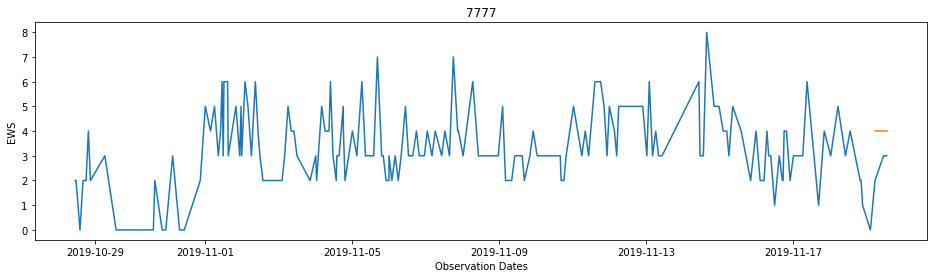

In [58]:
EWSuni(7777, ('2019-10-28', '2019-11-19'), 3)

Lineair regression on EWS value only does not show very accurate predictions (red line) vs. acutal values (blue line).

#### On all Vital parameters

Here we predict all the vital parameters base data : 'SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP'.

On the predicted vital signs we calculate the scores and the EWS.

In [11]:
def Scores(Values):
    # Convert Vital parameters into scores
    # Order of Values has to be 'SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP'
    #
    # Values : 1 dim array (one set of measurements)
    # See [3], [6], [5], [4]
    #
    #  EWS_Total: Total EWS score
    #  SBP: Systolic Blood Pressure
    #  SBP_Score: Contribution of SBP parameter to total EWS score
    #  LOC: Level Of Consciousness
    #  LOC_Score: Contribution of LOC parameter to total EWS score
    #  SpO2: Peripheral capillary oxygen saturation (the amount of oxygen in the blood)
    #  SpO2_Score: Contribution of SpO2 parameter to total EWS score
    #  Add_O2: Is the patient receiving additional oxygen or not
    #  Add_O2_Score: Contribution of Add_O2 parameter to total EWS score
    #  HR: Heartrate
    #  HR_Score: Contribution of HR parameter to total EWS score
    #  RR: Respiratory Rate
    #  RR_Score: Contribution of RR parameter to total EWS score
    #  TEMP: Patient body temperature
    #  TEMP_Score: Contribution of TEMP parameter to total EWS score
    
    # In the data cleanup the LOC/AVPU value has been mapped as follows:
    # df['LOC'].replace(to_replace= \
    # ['ALERT', 'NEW_CONFUSION', 'UNRESPONSIVE', 'VOICE', 'PAIN'], value=[1, 2, 3, 4, 5], inplace=True)
    # and the Add_O2:
    # df['Add_O2'].replace(to_replace=[False, True], value=[0, 1], inplace=True)
    
    #Column numbers :
    SBP_Score = 0
    LOC_Score = 1
    SpO2_Score = 2
    Add_O2_Score = 3
    HR_Score = 4
    RR_Score = 5
    TEMP_Score = 6
    EWS_Total = 7
    
    # Vital Parameters :
    SBP = Values[SBP_Score]
    LOC = Values[LOC_Score]   # = AVPU value, actually ACVPU
    SpO2 = Values[SpO2_Score]
    Add_O2 = Values[Add_O2_Score]
    HR = Values[HR_Score]
    RR = Values[RR_Score]
    TEMP = Values[TEMP_Score]
    
    #print(SBP, LOC, SpO2, Add_O2, HR, RR, TEMP)
    
    AllScores = np.zeros([len(Values) +1, 1], dtype=int)
    
    if SBP<=90:
        AllScores[SBP_Score] = 3
    elif 91<=SBP<=100:
        AllScores[SBP_Score] = 2
    elif 101<=SBP<=110:
        AllScores[SBP_Score] = 1
    elif 111<=SBP<=219:
        AllScores[SBP_Score] = 0
    elif SBP>220:
        AllScores[SBP_Score] = 3
    
    if LOC == 1:
        AllScores[LOC_Score] = 0
    elif LOC == 2:
        AllScores[LOC_Score] = 3   # ACVPU seems to work differently than AVPU
    elif LOC == 3:
        AllScores[LOC_Score] = 3
    elif LOC == 4:
        AllScores[LOC_Score] = 3        
    elif LOC == 5:
        AllScores[LOC_Score] = 3

    if SpO2 <83:
        AllScores[SpO2_Score] = 3
    elif 84<=SpO2<=85:
        AllScores[SpO2_Score] = 2
    elif 86<=SpO2<=87:
        AllScores[SpO2_Score] = 1
    elif 88<=SpO2<=92:
        AllScores[SpO2_Score] = 0
    elif 93<=SpO2<=94:
        AllScores[SpO2_Score] = 1
    elif 95<=SpO2<=96:
        AllScores[SpO2_Score] = 2        
    elif SpO2>97:
        AllScores[SpO2_Score] = 3
    
    if Add_O2 == 1:
        AllScores[Add_O2_Score] = 2
    else:
        AllScores[Add_O2_Score] = 0
        
    if HR<=40:
        AllScores[HR_Score] = 3
    elif 41<=HR<=50:
        AllScores[HR_Score] = 1
    elif 51<=HR<=90:
        AllScores[HR_Score] = 0
    elif 91<=HR<=110:
        AllScores[HR_Score] = 1
    elif 111<=HR<=130:
        AllScores[HR_Score] = 2  
    elif HR>=131:
        AllScores[HR_Score] = 3  
    
    if RR<=8:
        AllScores[RR_Score] = 3
    elif 9<=RR<=11:
        AllScores[RR_Score] = 1
    elif 12<=RR<=20:
        AllScores[RR_Score] = 0
    elif 21<=RR<=24:
        AllScores[RR_Score] = 2  
    elif RR>=25:
        AllScores[RR_Score] = 3  
    
    if TEMP<=35.0:
        AllScores[TEMP_Score] = 3
    elif 35.1<=TEMP<=36.0:
        AllScores[TEMP_Score] = 1
    elif 36.1<=TEMP<=38.0:
        AllScores[TEMP_Score] = 0
    elif 38.1<=TEMP<=39.0:
        AllScores[TEMP_Score] = 1  
    elif TEMP>=39.1:
        AllScores[TEMP_Score] = 2
        
    EWS = np.sum(AllScores)    
    AllScores[EWS_Total] = EWS    
    #print(AllScores)
        
    return(AllScores)
  

In [60]:
import datetime as dt
from datetime import timedelta
from dateutil.parser import parse

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline


def PredictValue(Dates, Target, NbrPredictions):
    # Make a linear regression on the given Target
    
    Dates = Dates.to_numpy()
    Target = Target.to_numpy()
    Dates = Dates.reshape(len(Dates),1)
    Target = Target.reshape(len(Target),1)
    
    # Split the data. Keep last NbrPredictions as test values
    X_Train = Dates[:-NbrPredictions]
    X_Test = Dates[-NbrPredictions:]
    y_Train = Target[:-NbrPredictions]
    y_Test = Target[-NbrPredictions:]
        
    #print(X_Train, X_Test, y_Train, y_Test)
    #print(Dates.shape, Target.shape, X_Train.shape, X_Test.shape, y_Train.shape, y_Test.shape)
    #print(type(X_Train), X_Train[0], type(X_Train[0]), X_Train.shape, type(X_Train[0][0]))
    #print(type(X_Test), X_Test[0], type(X_Test[0]), X_Test.shape, type(X_Test[0][0]))
    
    # Lineair regression. No normalization or standardization as only 1 dim 
    
    RegTrain = LinearRegression().fit(X_Train, y_Train)
    Prediction = RegTrain.predict(X_Test)
    
    #print(Prediction, Prediction.shape)
    
    return(Prediction) 


def EWSmulti(patient, DateRange, NbrPredictions):
    # Predict NbrPredictions future values of EWS based on a timeseries of previous EWS values for one patient
    # on a specific date range

    #print(type(DateRange), type(DateRange[0]), type(parse(DateRange[0])))
    
    OnePatient = df[ (df['PatientId'] == patient) & \
                     (df['ObservationDate'] >= parse(DateRange[0])) &  \
                     (df['ObservationDate'] <= parse(DateRange[1]) + timedelta(days=1) ) \
                   ]
    #display(OnePatient)
    Dims = OnePatient[['ObservationDate', 'SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP']].set_index('ObservationDate').sort_index()
    # keep last NbrPredictions dates in datetime form:
    y_Pred_dt = Dims.tail(NbrPredictions)
    #print("y_Pred_dt = ", y_Pred_dt, y_Pred_dt.shape)
    Dates = OnePatient.ObservationDate.map(dt.datetime.toordinal)
    Targets = OnePatient[['SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP']]

    # Linear regression for each of the vital parameters seperatly:
    Predictions = np.empty([NbrPredictions, Targets.shape[1]])
    #print(Predictions.shape)
    for i in range(Targets.shape[1]):
        #print(i, Targets.iloc[:, [i]])
        Predictions[:,i] = PredictValue(Dates, Targets.iloc[:, [i]], NbrPredictions).ravel()
    #print(Predictions, Predictions.shape)
    
    scores = np.zeros([Predictions.shape[0], Predictions.shape[1]+1], dtype=int)
    #print(scores.shape)
    for j in range(len(Predictions)):
        #hlp = Scores(Predictions[j])
        #print(hlp.T, hlp.T.shape, scores[j].shape)
        #hlp.reshape(len(hlp),1)
        scores[j] = Scores(Predictions[j]).T
    #print(scores)
        
    
    #print(np.round(Prediction))
    #print(y_Test)
    #display(y_Pred_dt)
    y_Pred_dt[['SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP']] = Predictions
    y_Pred_dt[['SBP_Score', 'LOC_Score', 'SpO2_Score', 'Add_O2_Score', 'HR_Score', 'RR_Score', 'TEMP_Score', 'EWS_Total']] = scores
    #display(y_Pred_dt)
    
    # Plot original and predicted data scores
    
    OrigScores = OnePatient[['ObservationDate', 'SBP_Score', 'LOC_Score', 'SpO2_Score', 'Add_O2_Score', 'HR_Score', 'RR_Score', 'TEMP_Score', 'EWS_Total']].set_index('ObservationDate')
    PredScores = y_Pred_dt[['SBP_Score', 'LOC_Score', 'SpO2_Score', 'Add_O2_Score', 'HR_Score', 'RR_Score', 'TEMP_Score', 'EWS_Total']]
    
    figure = plt.figure(1, figsize = (16, 8))
    plt.plot(OrigScores, linestyle='dashed')   # original data
    plt.plot(PredScores) # Predictions
    plt.xlabel('Observation Dates')
    plt.ylabel('Scores')
    plt.title(patient)
    ax = plt.gca()
    ax.legend(loc='upper center', fontsize='x-large')
        
    plt.show()
    
    #print(OnePatient.EWS_Total.max())

    return(None)    

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/lib64/python3.6/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/lib64/python3.6/site-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

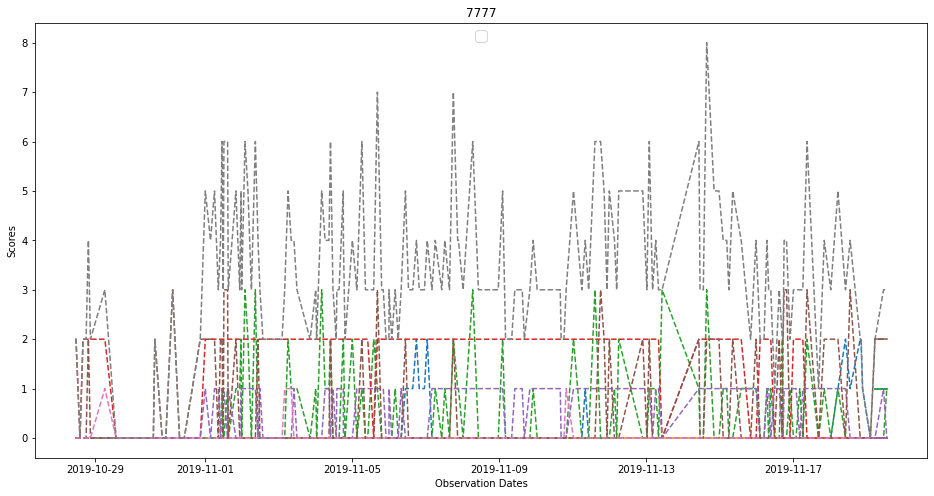

In [61]:
EWSmulti(7777, ('2019-10-28', '2019-11-19'), 3)

The prediction of each furure value is always the same value for each vital parameter.
Prediction is not very accurate

### Modelling time series

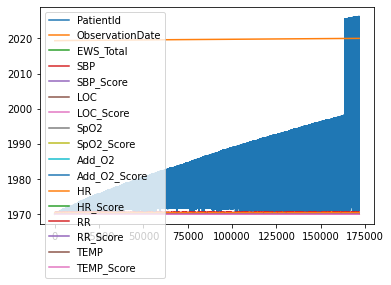

In [62]:
import matplotlib.pyplot as plt

df.plot()
plt.show()

ObservationDate  EWS_Total
0      2019-05-01 13:27:50          0
2      2019-05-01 15:54:27          1
4      2019-05-01 17:03:16          0
8      2019-05-01 21:08:05          0
10     2019-05-01 21:13:21          1
...                    ...        ...
171731 2020-01-02 08:57:05          3
171732 2020-01-02 08:58:46          3
171733 2020-01-02 09:03:14          0
171734 2020-01-02 09:03:20          0
171735 2020-01-02 09:03:56          1

[160938 rows x 2 columns]

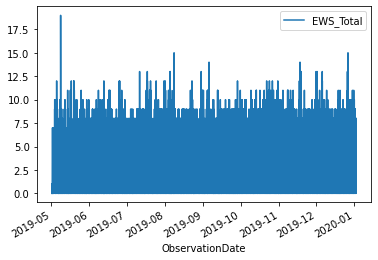

In [19]:
TimeSeries = df[['ObservationDate', 'EWS_Total']]
display(TimeSeries)
TimeSeries = TimeSeries.set_index('ObservationDate')
TimeSeries.plot()
plt.show()

<AxesSubplot:title={'center':'EWS'}, xlabel='ObservationDate'>

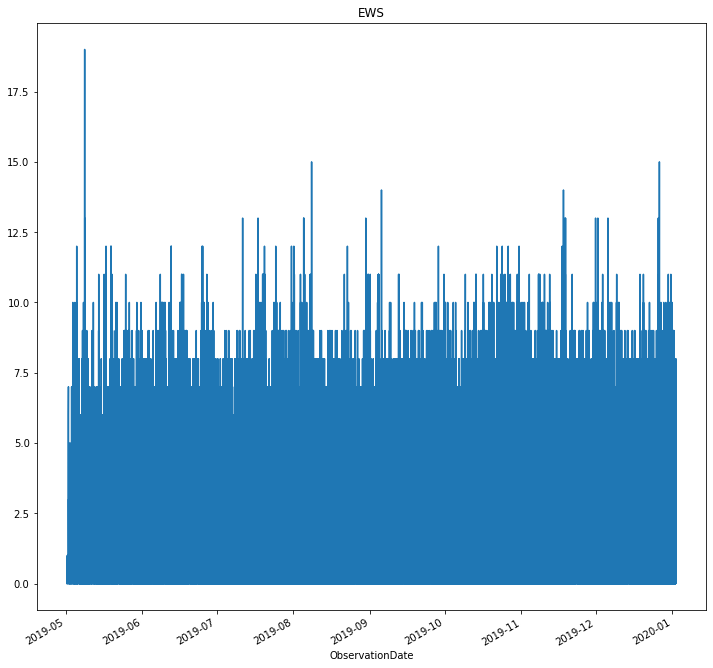

In [64]:
TimeSeries['EWS_Total'].plot(title = "EWS", figsize=(12,12))

In [20]:
PatientData = df[['PatientId', 'ObservationDate', 'SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP']]

EWS = df[['EWS_Total']]

In [23]:
print(PatientsNbrRows[PatientsNbrRows > 100].count())
print(PatientsNbrRows[PatientsNbrRows > 200].count())
print(PatientsNbrRows[PatientsNbrRows > 300].count())
print(PatientsNbrRows[PatientsNbrRows > 400].count())

193
27
5
3


##### Plot timeseries of individual patients in one plot

In [24]:
PatientTimeSeries = PatientsNbrRows[PatientsNbrRows > 200]
display(PatientTimeSeries)

PatientId
1743    616
1261    431
5797    423
1841    324
630     315
1199    297
3080    292
6995    276
1092    272
1285    267
523     261
1068    256
1257    254
362     247
1753    245
4672    244
5447    239
1835    232
3553    229
2193    218
6764    216
4764    214
5678    213
1664    207
3433    205
6755    204
4614    202
Name: PatientId, dtype: int64

PatientId     ObservationDate  EWS_Total    SBP  SBP_Score  LOC  \
45337        3540 2019-07-19 13:43:32          0  146.0        0.0    1   
45406        3540 2019-07-19 15:27:33          1  143.0        0.0    1   
45466        3540 2019-07-19 17:14:41          1  142.0        0.0    1   
45622        3540 2019-07-19 20:32:11          0  144.0        0.0    1   
45716        3540 2019-07-20 00:32:43          0  118.0        0.0    1   
...           ...                 ...        ...    ...        ...  ...   
114822       3540 2019-10-22 19:22:50          0  119.0        0.0    1   
115061       3540 2019-10-23 05:10:47          0  122.0        0.0    1   
115452       3540 2019-10-23 14:50:15          0  126.0        0.0    1   
115861       3540 2019-10-24 05:03:05          0  131.0        0.0    1   
116097       3540 2019-10-24 10:30:52          0  135.0        0.0    1   

        LOC_Score   SpO2  SpO2_Score  Add_O2  Add_O2_Score  HR  HR_Score  RR  \
45337           0   98.0         0.0       0           0.0  83         0  20   
45406           0   97.0         0.0       0           0.0  83         0  10   
45466           0   97.0         0.0       0           0.0  88         0  11   
45622           0   98.0         0.0       0           0.0  89         0  16   
45716           0   96.0         0.0       0           0.0  81         0  16   
...           ...    ...         ...     ...           ...  ..       ...  ..   
114822          0   96.0         0.0       0           0.0  79         0  16   
115061          0   96.0         0.0       0           0.0  81         0  15   
115452          0  100.0         0.0       0           0.0  80         0  16   
115861          0   96.0         0.0       0           0.0  82         0  15   
116097          0   97.0         0.0       0           0.0  86         0  16   

        RR_Score  TEMP  TEMP_Score  
45337          0  36.2           0  
45406          1  36.4           0  
45466          1  36.5           0  
45622          0  36.6           0  
45716          0  36.7           0  
...          ...   ...         ...  
114822         0  36.5           0  
115061         0  36.2           0  
115452         0  36.6           0  
115861         0  36.4           0  
116097         0  37.3           0  

[194 rows x 17 columns]

ObservationDate  EWS_Total
45337  2019-07-19 13:43:32          0
45406  2019-07-19 15:27:33          1
45466  2019-07-19 17:14:41          1
45622  2019-07-19 20:32:11          0
45716  2019-07-20 00:32:43          0
...                    ...        ...
114822 2019-10-22 19:22:50          0
115061 2019-10-23 05:10:47          0
115452 2019-10-23 14:50:15          0
115861 2019-10-24 05:03:05          0
116097 2019-10-24 10:30:52          0

[194 rows x 2 columns]

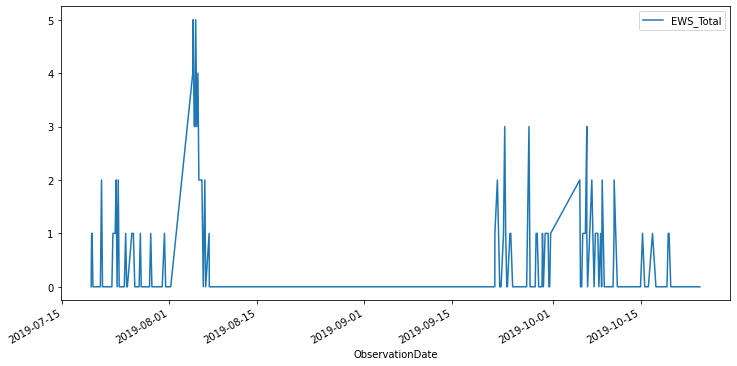

In [68]:
OnePatient = df[df.PatientId == 3540]
display(OnePatient)
OnePatient = OnePatient[['ObservationDate', 'EWS_Total']]
display(OnePatient)
OnePatient = OnePatient.set_index('ObservationDate')
OnePatient.plot(figsize=(12,6))
plt.show()

##### Select subset of patients with sufficient date-time features

[362, 523, 630, 1068, 1092, 1199, 1257, 1261, 1285, 1664, 1743, 1753, 1835, 1841, 2193, 3080, 3433, 3553, 4614, 4672, 4764, 5447, 5678, 5797, 6755, 6764, 6995]


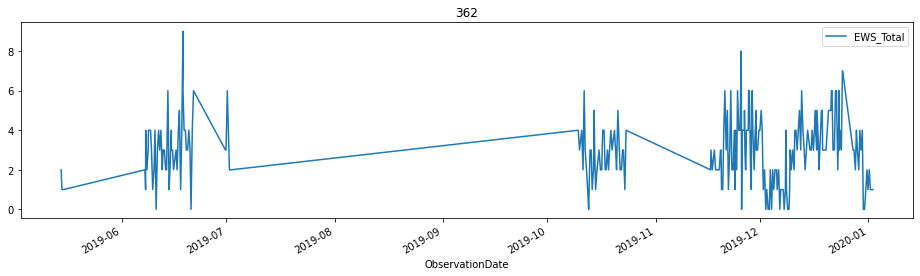

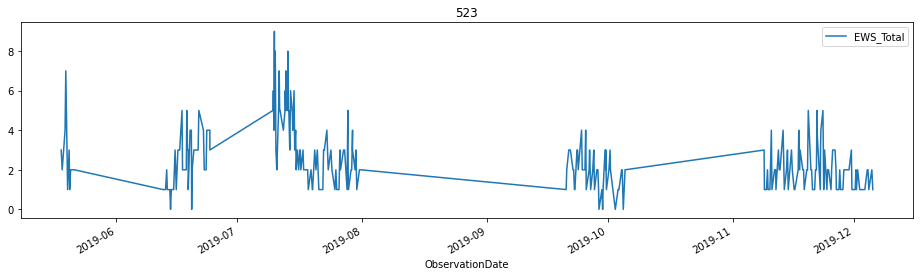

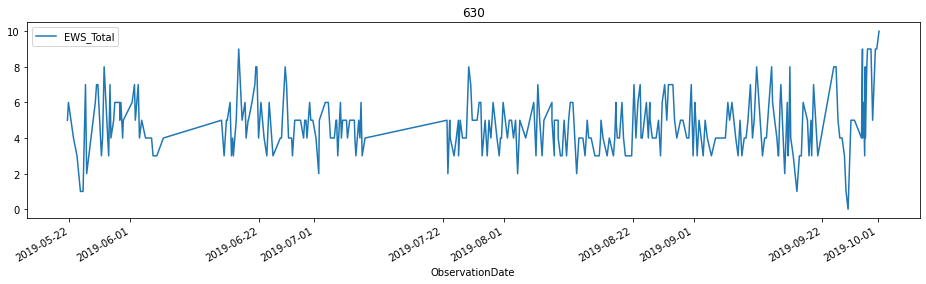

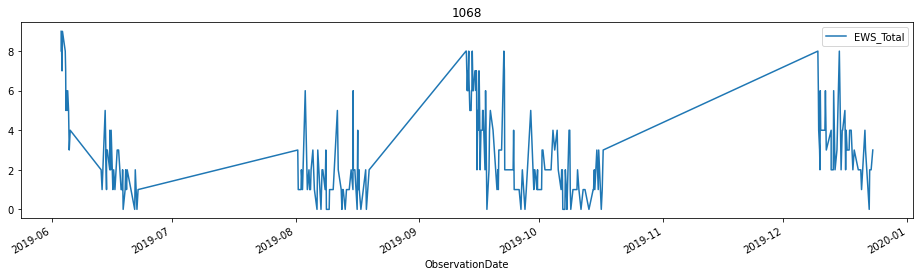

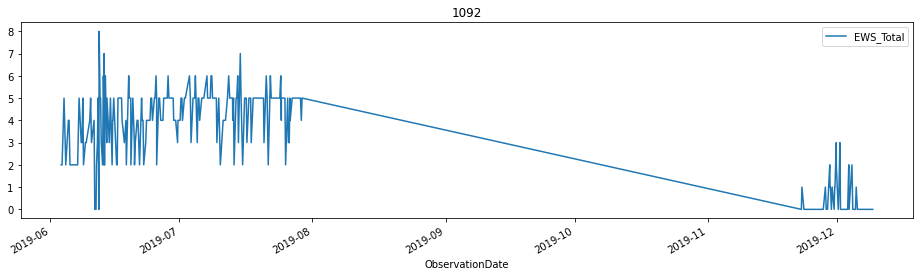

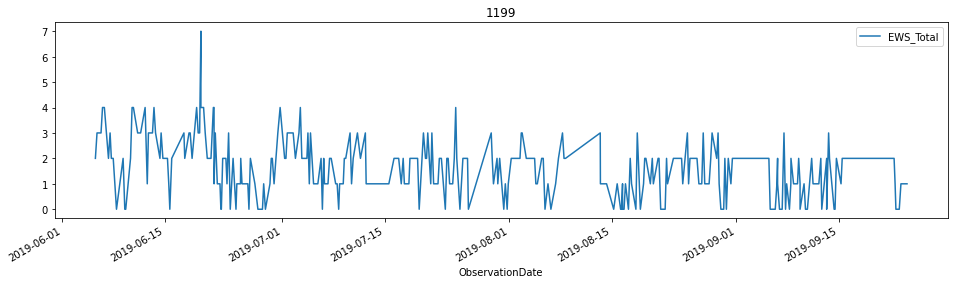

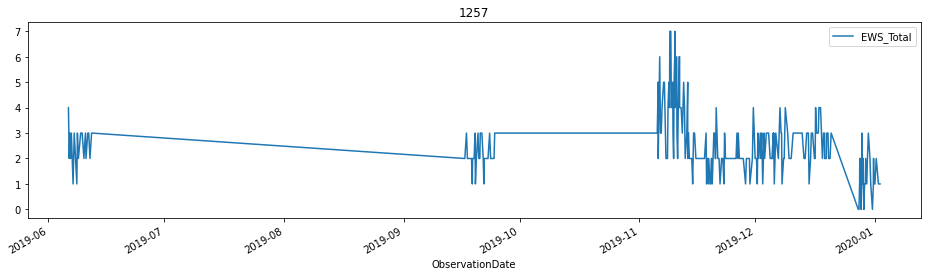

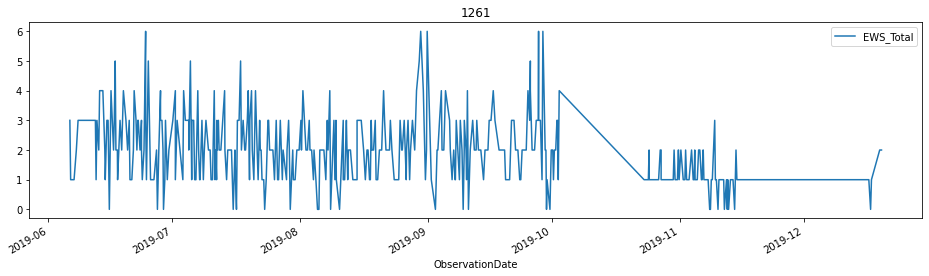

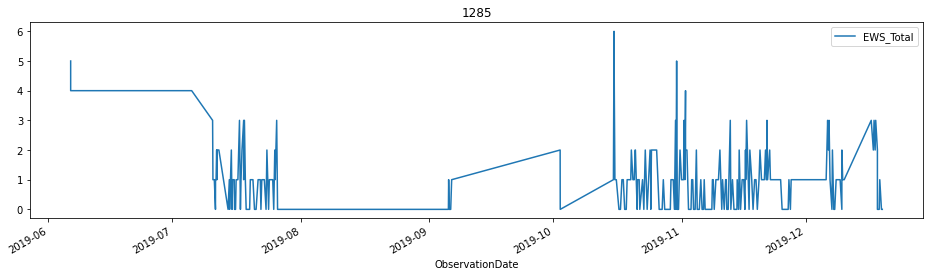

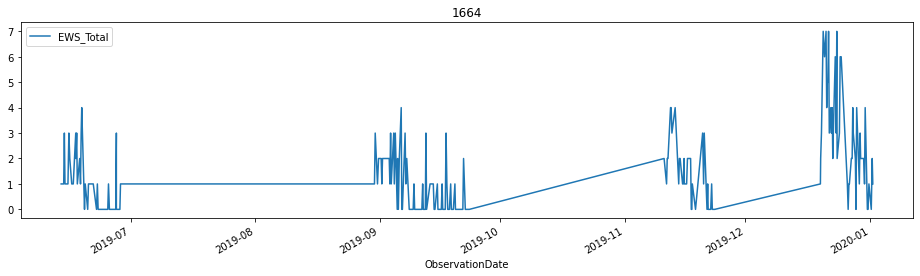

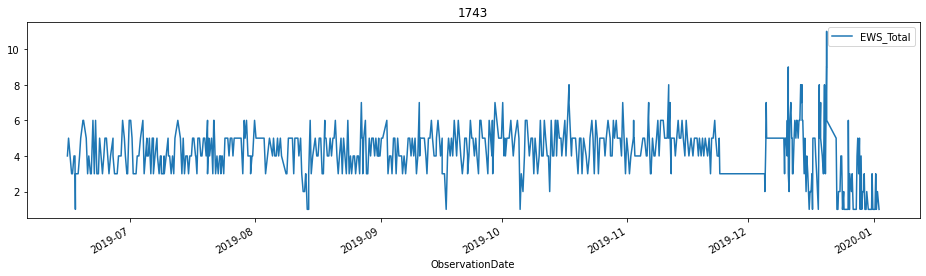

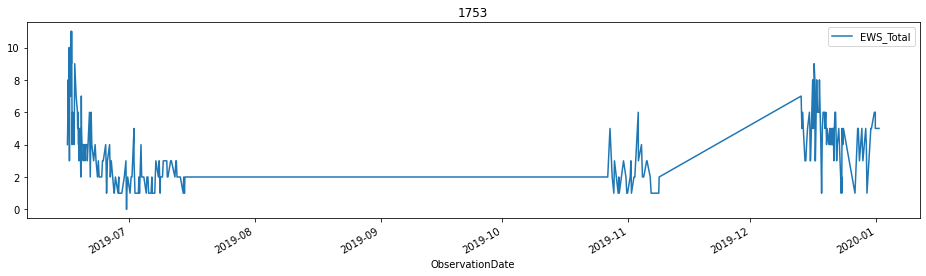

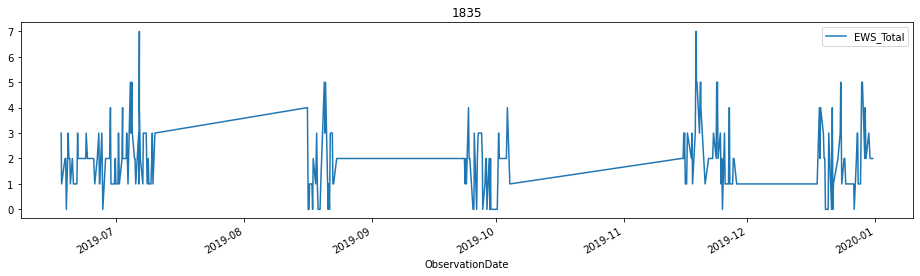

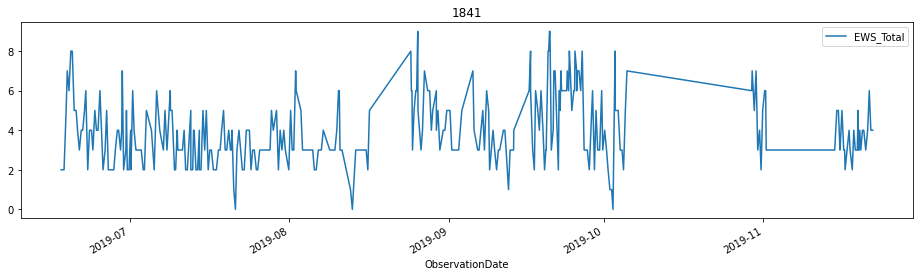

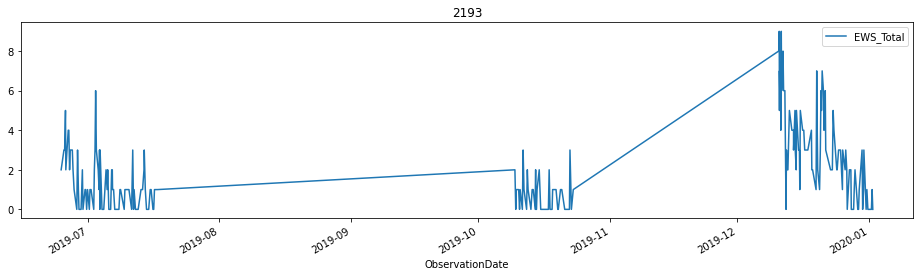

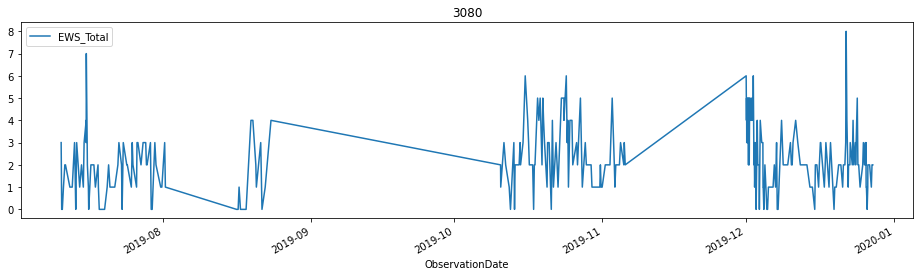

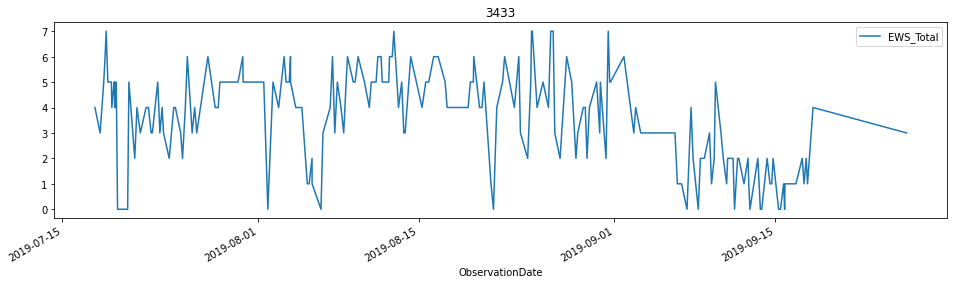

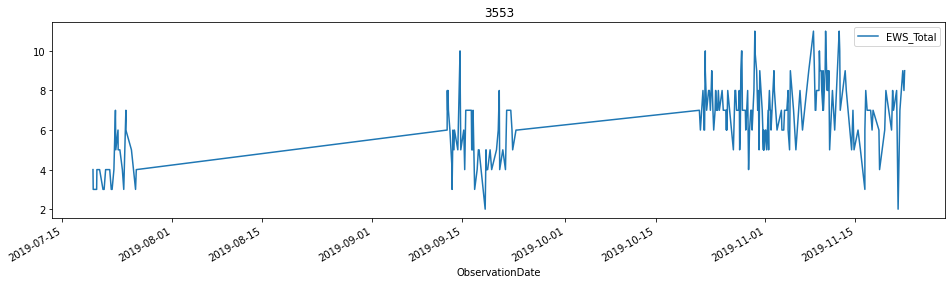

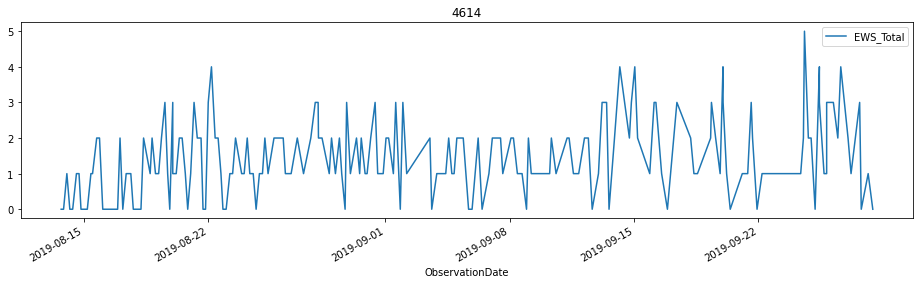

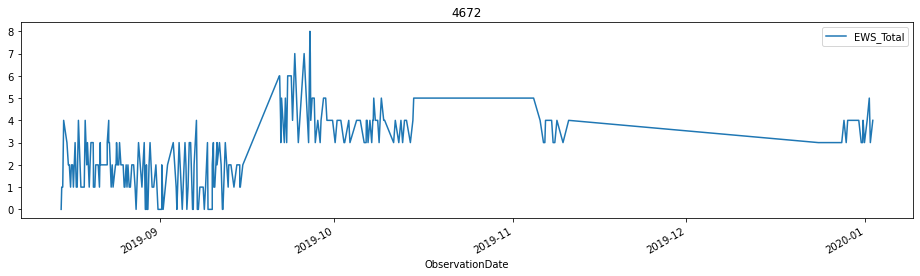

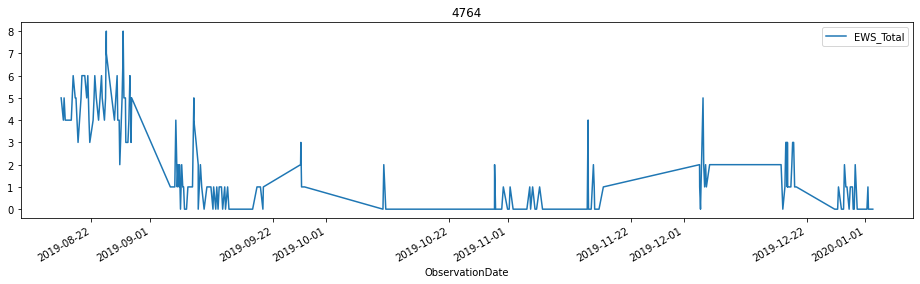

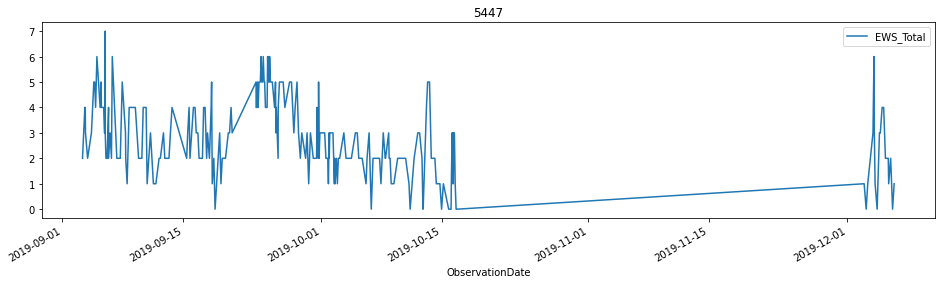

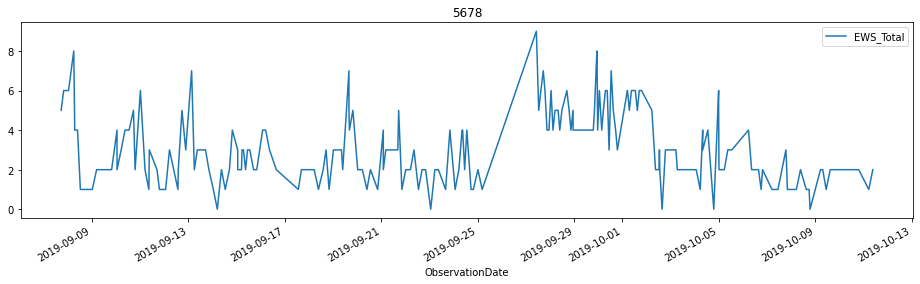

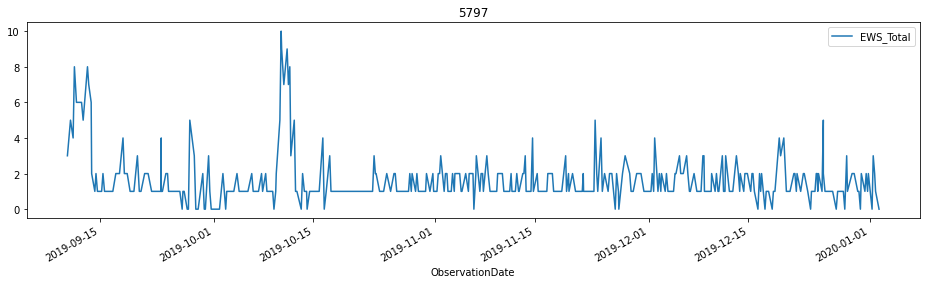

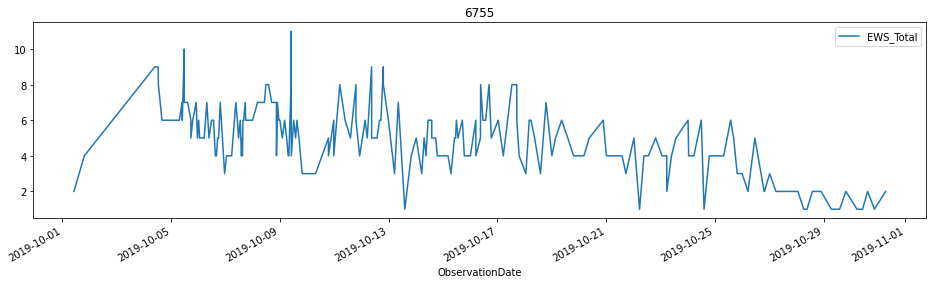

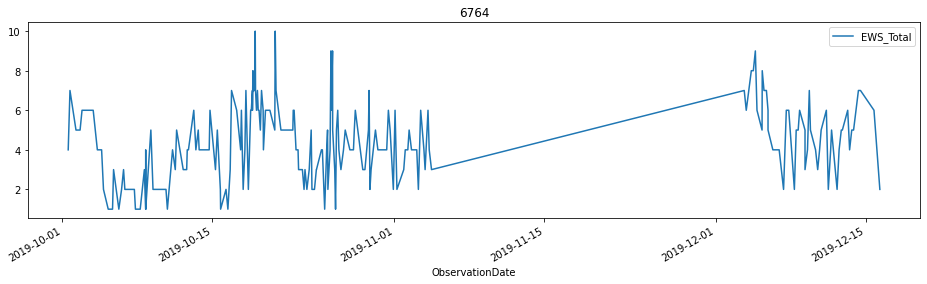

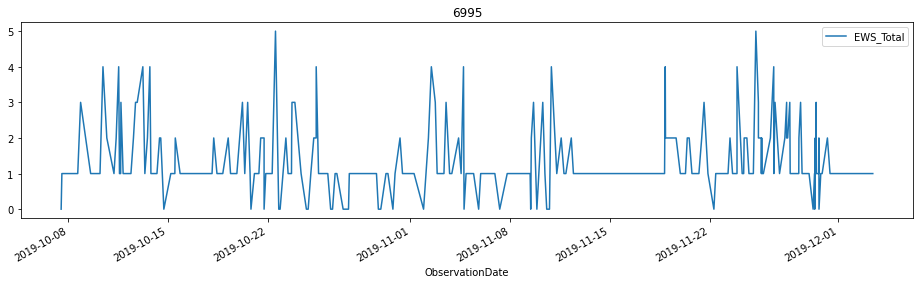

In [25]:
PatientSubset = PatientsNbrRows[PatientsNbrRows > 200]
PatientSubsetList = PatientSubset.index.tolist()
#print(PatientSubsetList)
#print(type(PatientSubsetList), type(PatientSubsetList[0]) )
PatientSubsetList.sort()
print(PatientSubsetList)

for patient in PatientSubsetList:
    OnePatient = df[df.PatientId == patient]
    #display(OnePatient)
    OnePatient = OnePatient[['ObservationDate', 'EWS_Total']]
    #display(OnePatient)
    OnePatient = OnePatient.set_index('ObservationDate')
    OnePatient.plot(title = patient, figsize=(16,4))
    

###### Observation
Measurements were made at different intervals: some are days, weeks or months apart 

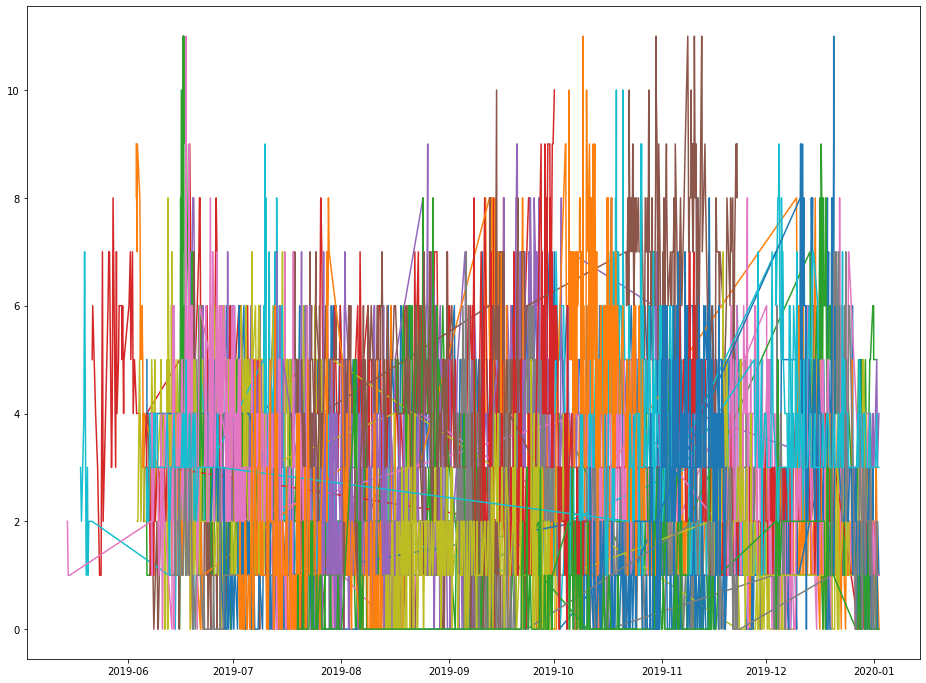

In [74]:
import matplotlib.pyplot as plt

PatientSubset = PatientsNbrRows[PatientsNbrRows > 200]
PatientSubsetList = PatientSubset.index.tolist()

figure = plt.figure(1, figsize = (16, 12))

for patient in PatientSubsetList:
    OnePatient = df[df.PatientId == patient]
    #display(OnePatient)
    OnePatient = OnePatient[['ObservationDate', 'EWS_Total']]
    #display(OnePatient)
    OnePatient = OnePatient.set_index('ObservationDate')
    plt.plot(OnePatient)    

All the patients shown togheter: there is no coherence.

###### Measurement frequency per patient

In [96]:
for patient in PatientSubsetList:
    OnePatient = df[df.PatientId == patient][['ObservationDate', 'EWS_Total']]
    NbrDaily = OnePatient.resample('D', on='ObservationDate').count()
    
    OnePatient = OnePatient.set_index('ObservationDate')    
    #print("PatientId = ", patient, "   (Index unique? ", OnePatient.index.is_unique, ") :")
    res = (pd.Series(OnePatient.index[1:]) - pd.Series(OnePatient.index[:-1])).value_counts()
    #display(res)
    #print("Number of measurements = ", OnePatient.count() )
    #print("Average duration between measurements = ", res.mean(), "\n" )
    #print("number of measurements per day = ")
    #display(NbrDaily)
    # average of only days with measurements (actual - non-zero - measurements)
    #print("average number of measurements per day = ", NbrDaily.replace(0, np.NaN).mean(), "\n\n" )


##### Subset of patients with > 200 records, min 3 measurments/day, 20 days consecutive

###### Dateranges of consecutive days per patient

In [29]:
PatientSubsetList = PatientSubset.index.tolist()
#print(PatientSubsetList)
#print(type(PatientSubsetList), type(PatientSubsetList[0]) )
PatientSubsetList.sort()
print(PatientSubsetList)

[362, 523, 630, 1068, 1092, 1199, 1257, 1261, 1285, 1664, 1743, 1753, 1835, 1841, 2193, 3080, 3433, 3553, 4614, 4672, 4764, 5447, 5678, 5797, 6755, 6764, 6995]


In [97]:
def SplitList(IntList):
    # split a list of integers in lists of consecutive integers.
    # Return tuples of ranges, first and last index of each range
    
    #print(IntList)
    m = ( (x+1) for x,y in zip(IntList, IntList[1:]) if y-x != 1 )
    #print(m, type(m))
    NewList = list()
    prev = 0
    for index in m:
        help = [ x for x in IntList[prev:] if x < index]
        NewList.append(help)
        prev += len(help)
    NewList.append([ x for x in IntList[prev:]])
    #print(NewList)
    #print(len(NewList), range(len(NewList)))    
    
    # reduce to list of tuples with only first and last index
    Output = list()
    for i in range (len(NewList)):
        Output.append( (NewList[i][0], NewList[i][-1]) )

    return(Output)

# Create a dictionary of patients with dateranges of consecutive days:
PatientConsecutiveDateRanges = {}

for patient in PatientSubsetList:
    #print("PatientId = ", patient)
    OnePatient = df[df.PatientId == patient][['ObservationDate', 'EWS_Total']]
    NbrDaily = OnePatient.resample('D', on='ObservationDate').count()
    #display(NbrDaily)
    #Dateslist = NbrDaily.index.tolist()
    #print(Dateslist)
    #print(NbrDaily['EWS_Total'].to_numpy() )
    # create of dataframe range index tuples for a patient:
    ConsecutiveIndexes = SplitList( NbrDaily['EWS_Total'].to_numpy().nonzero()[0].tolist() )
    #print(ConsecutiveIndexes)
    
    # convert to a list of datetimerange tuples for a patient:
    
    #print( ConsecutiveIndexes[0][0], ConsecutiveIndexes[0][1] )
    #print(NbrDaily.columns)
    #print( NbrDaily.iloc[ ConsecutiveIndexes[0][1] ] )
    #print( NbrDaily.iloc[ ConsecutiveIndexes[0][1] ].name )
    ConsecutiveDatetimes = list()
    for i in range (len(ConsecutiveIndexes)):
        #ConsecutiveDatetimes.append( (NbrDaily.iloc[ConsecutiveIndexes[i][0]].name.date().strftime("%Y-%m-%d"), \
        #                              NbrDaily.iloc[ConsecutiveIndexes[i][1]].name.date().strftime("%Y-%m-%d")) )
        ConsecutiveDatetimes.append( (NbrDaily.iloc[ConsecutiveIndexes[i][0]].name, \
                                      NbrDaily.iloc[ConsecutiveIndexes[i][1]].name) )
    #print(ConsecutiveDatetimes)
    
    #help = pd.DataFrame(ConsecutiveDatetimes, columns = ['DataRangeList'])
    #help = pd.DataFrame(patient, ConsecutiveDatetimes, columns = ['PatientId', 'DataRangeList'])
    PatientConsecutiveDateRanges[patient] = ConsecutiveDatetimes
    
#display(PatientConsecutiveDateRanges)

###### Determine lenght of date ranges
pick the ones longer than 20 days with min 3 measurements per day

In [114]:
from datetime import timedelta

# For each patient determine:
#   - all closed date ranges with consecutive observations (measurements every day, including first and last)
#   - number of days in each date range
#   - number of observations in each date range
#   - average number of observations in each date range

for patient in PatientConsecutiveDateRanges:
    print(patient)
    print("\t\tDateRange\t      #NbrDays\t #Observ.  Average Nbr Observations/day")
    for i in range(len(PatientConsecutiveDateRanges[patient])):
        # retrieve all records/rows in this daterange:
        DateRangeNbrMeasures = \
            df[ (df['PatientId'] == patient) & \
                (df['ObservationDate'] >= PatientConsecutiveDateRanges[patient][i][0]) & \
                (df['ObservationDate'] <= (PatientConsecutiveDateRanges[patient][i][1] + timedelta(days=1) ) ) \
              ]    
        #display(DateRangeMeasures)
        
        # Calculate lenght of dateranges:
        Diff = PatientConsecutiveDateRanges[patient][i][1] - PatientConsecutiveDateRanges[patient][i][0] + timedelta(days=1)       
        print("\t", PatientConsecutiveDateRanges[patient][i][0].date().strftime("%Y-%m-%d"), " - ", \
              PatientConsecutiveDateRanges[patient][i][0].date().strftime("%Y-%m-%d")," | ", \
              f"{Diff.days:>4}", "\t| ", DateRangeNbrMeasures.shape[0], "\t| ", DateRangeNbrMeasures.shape[0]/Diff.days )
        
# TO DO: convert the output in a patient metadata dataframe for automated selection.

362
		DateRange	      #NbrDays	 #Observ.  Average Nbr Observations/day
	 2019-05-14  -  2019-05-14  |     2 	|  3 	|  1.5
	 2019-06-07  -  2019-06-07  |    15 	|  45 	|  3.0
	 2019-06-30  -  2019-06-30  |     3 	|  5 	|  1.6666666666666667
	 2019-10-09  -  2019-10-09  |    15 	|  39 	|  2.6
	 2019-11-16  -  2019-11-16  |    39 	|  137 	|  3.5128205128205128
	 2019-12-27  -  2019-12-27  |     7 	|  18 	|  2.5714285714285716
523
		DateRange	      #NbrDays	 #Observ.  Average Nbr Observations/day
	 2019-05-18  -  2019-05-18  |     4 	|  10 	|  2.5
	 2019-06-12  -  2019-06-12  |    13 	|  37 	|  2.8461538461538463
	 2019-07-09  -  2019-07-09  |    23 	|  87 	|  3.782608695652174
	 2019-09-20  -  2019-09-20  |    16 	|  43 	|  2.6875
	 2019-11-08  -  2019-11-08  |    28 	|  84 	|  3.0
630
		DateRange	      #NbrDays	 #Observ.  Average Nbr Observations/day
	 2019-05-21  -  2019-05-21  |     4 	|  10 	|  2.5
	 2019-05-26  -  2019-05-26  |     5 	|  17 	|  3.4
	 2019-06-01  -  2019-06-01  |     

	 2019-09-15  -  2019-09-15  |     6 	|  29 	|  4.833333333333333
	 2019-09-23  -  2019-09-23  |    24 	|  141 	|  5.875
	 2019-12-02  -  2019-12-02  |     5 	|  18 	|  3.6
5678
		DateRange	      #NbrDays	 #Observ.  Average Nbr Observations/day
	 2019-09-07  -  2019-09-07  |    19 	|  111 	|  5.842105263157895
	 2019-09-27  -  2019-09-27  |    15 	|  102 	|  6.8
5797
		DateRange	      #NbrDays	 #Observ.  Average Nbr Observations/day
	 2019-09-10  -  2019-09-10  |   115 	|  423 	|  3.6782608695652175
6755
		DateRange	      #NbrDays	 #Observ.  Average Nbr Observations/day
	 2019-10-01  -  2019-10-01  |     1 	|  2 	|  2.0
	 2019-10-04  -  2019-10-04  |    28 	|  202 	|  7.214285714285714
6764
		DateRange	      #NbrDays	 #Observ.  Average Nbr Observations/day
	 2019-10-01  -  2019-10-01  |    35 	|  167 	|  4.771428571428571
	 2019-12-03  -  2019-12-03  |    14 	|  49 	|  3.5
6995
		DateRange	      #NbrDays	 #Observ.  Average Nbr Observations/day
	 2019-10-07  -  2019-10-07  |    38 	|  1

#### Lag scatter plots

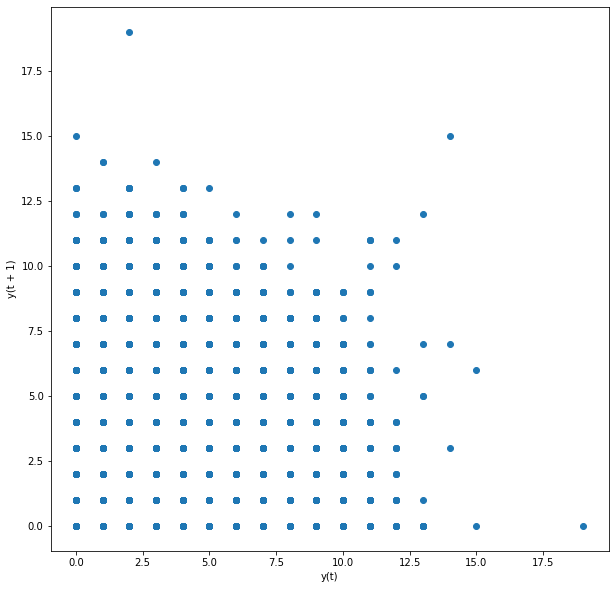

In [80]:
from pandas.plotting import lag_plot
figure = plt.figure(1, figsize = (10, 10))
lag_plot(TimeSeries)
plt.show()

Considering the entire dataset as a timeseries doesn't make much sense

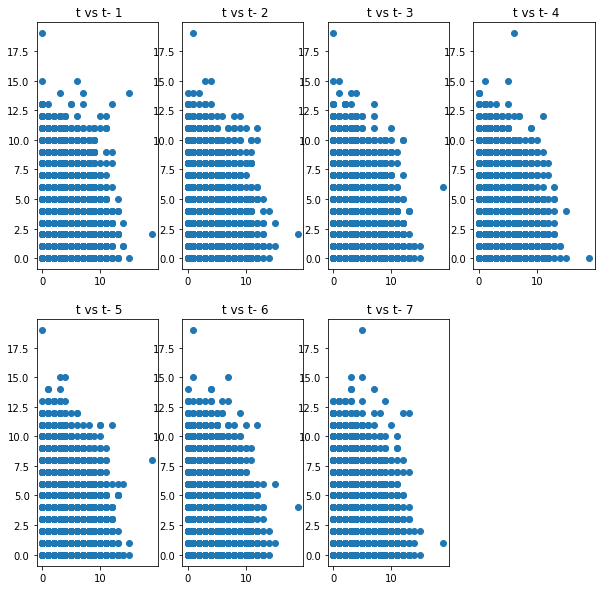

In [81]:
# See [1], §6.7, p.49

# create multiple scatter plots

values = pd.DataFrame(TimeSeries.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = [ ' t ' ]
for i in range(1,(lags + 1)):
    columns.append( ' t- ' + str(i))
dataframe.columns = columns

plt.figure(1, figsize = (10, 10))

for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title( ' t vs t- ' + str(i))
    plt.scatter(x=dataframe[ ' t ' ].values, y=dataframe[ ' t- ' +str(i)].values)

plt.show()

##### Lag plot of 1 patient

Use patient 7777 with daterange ('2019-10-28', '2019-11-19')

PatientId     ObservationDate  EWS_Total    SBP  SBP_Score  LOC  \
119202       7777 2019-10-28 11:03:41          2  166.0        0.0    1   
119225       7777 2019-10-28 11:37:30          2  143.0        0.0    1   
119322       7777 2019-10-28 14:12:20          0  154.0        0.0    1   
119416       7777 2019-10-28 16:12:16          2  157.0        0.0    1   
119494       7777 2019-10-28 18:11:41          2  146.0        0.0    1   
...           ...                 ...        ...    ...        ...  ...   
137503       7777 2019-11-18 21:17:41          1  106.0        1.0    1   
137622       7777 2019-11-19 02:24:17          0  114.0        0.0    1   
137680       7777 2019-11-19 05:24:47          2  149.0        0.0    1   
137954       7777 2019-11-19 11:00:26          3  124.0        0.0    1   
138044       7777 2019-11-19 13:06:43          3  145.0        0.0    1   

        LOC_Score  SpO2  SpO2_Score  Add_O2  Add_O2_Score  HR  HR_Score  RR  \
119202          0  98.0         0.0       1           2.0  86         0  18   
119225          0  98.0         0.0       1           2.0  88         0  16   
119322          0  98.0         0.0       0           0.0  86         0  18   
119416          0  97.0         0.0       1           2.0  88         0  18   
119494          0  98.0         0.0       1           2.0  81         0  17   
...           ...   ...         ...     ...           ...  ..       ...  ..   
137503          0  98.0         0.0       0           0.0  87         0  19   
137622          0  98.0         0.0       0           0.0  77         0  17   
137680          0  97.0         0.0       0           0.0  88         0  21   
137954          0  98.0         0.0       0           0.0  93         1  22   
138044          0  95.0         1.0       0           0.0  87         0  21   

        RR_Score  TEMP  TEMP_Score  
119202         0  36.5           0  
119225         0  36.6           0  
119322         0  36.3           0  
119416         0  37.0           0  
119494         0  37.1           0  
...          ...   ...         ...  
137503         0  36.8           0  
137622         0  36.8           0  
137680         2  36.8           0  
137954         2  36.8           0  
138044         2  36.9           0  

[191 rows x 17 columns]

/usr/lib64/python3.6/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


PatientId  ObservationDate  EWS_Total    SBP  SBP_Score  LOC  \
119202       7777           737360          2  166.0        0.0    1   
119225       7777           737360          2  143.0        0.0    1   
119322       7777           737360          0  154.0        0.0    1   
119416       7777           737360          2  157.0        0.0    1   
119494       7777           737360          2  146.0        0.0    1   
...           ...              ...        ...    ...        ...  ...   
137503       7777           737381          1  106.0        1.0    1   
137622       7777           737382          0  114.0        0.0    1   
137680       7777           737382          2  149.0        0.0    1   
137954       7777           737382          3  124.0        0.0    1   
138044       7777           737382          3  145.0        0.0    1   

        LOC_Score  SpO2  SpO2_Score  Add_O2  Add_O2_Score  HR  HR_Score  RR  \
119202          0  98.0         0.0       1           2.0  86         0  18   
119225          0  98.0         0.0       1           2.0  88         0  16   
119322          0  98.0         0.0       0           0.0  86         0  18   
119416          0  97.0         0.0       1           2.0  88         0  18   
119494          0  98.0         0.0       1           2.0  81         0  17   
...           ...   ...         ...     ...           ...  ..       ...  ..   
137503          0  98.0         0.0       0           0.0  87         0  19   
137622          0  98.0         0.0       0           0.0  77         0  17   
137680          0  97.0         0.0       0           0.0  88         0  21   
137954          0  98.0         0.0       0           0.0  93         1  22   
138044          0  95.0         1.0       0           0.0  87         0  21   

        RR_Score  TEMP  TEMP_Score  
119202         0  36.5           0  
119225         0  36.6           0  
119322         0  36.3           0  
119416         0  37.0           0  
119494         0  37.1           0  
...          ...   ...         ...  
137503         0  36.8           0  
137622         0  36.8           0  
137680         2  36.8           0  
137954         2  36.8           0  
138044         2  36.9           0  

[191 rows x 17 columns]

EWS_Total
ObservationDate           
737360                   2
737360                   2
737360                   0
737360                   2
737360                   2
...                    ...
737381                   1
737382                   0
737382                   2
737382                   3
737382                   3

[191 rows x 1 columns]

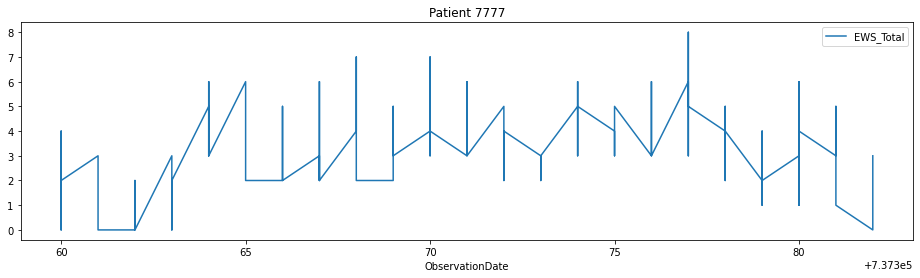

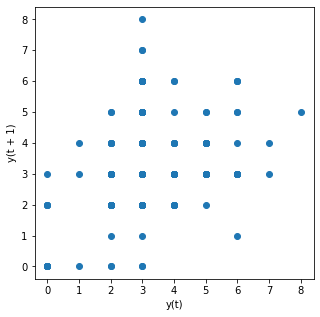

In [82]:
import datetime as dt
from datetime import timedelta
from dateutil.parser import parse
from pandas.plotting import lag_plot

OnePatient = df[ (df['PatientId'] == 7777) & \
                 (df['ObservationDate'] >= parse('2019-10-28') ) &  \
                 (df['ObservationDate'] <= parse('2019-11-19') + timedelta(days=1) ) \
               ]
display(OnePatient)
OnePatient.ObservationDate = OnePatient.ObservationDate.map(dt.datetime.toordinal)
display(OnePatient)
TimeSeries = OnePatient[['ObservationDate', 'EWS_Total']]
TimeSeries = TimeSeries.set_index('ObservationDate')
display(TimeSeries)

TimeSeries.plot(figsize = (16, 4), title = "Patient 7777")
plt.show()

figure = plt.figure(1, figsize = (5, 5))
lag_plot(TimeSeries)
plt.show()

In [83]:
from pandas import DataFrame
from pandas import concat

values = DataFrame(TimeSeries.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = [ ' t ' , ' t+1 ' ]
result = dataframe.corr()
print("Correlation on EWS values for patient 7777:\n\n", result)

Correlation on EWS values for patient 7777:

              t       t+1 
 t     1.000000  0.368303
 t+1   0.368303  1.000000


Correlation on EWS values for patient 7777 with lag=1 is rather low.

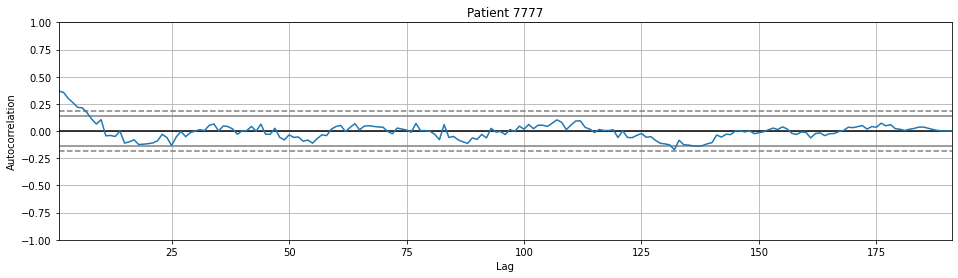

In [84]:
from pandas.plotting import autocorrelation_plot

figure = plt.figure(1, figsize = (16, 4))
autocorrelation_plot(TimeSeries)
plt.title("Patient 7777")

plt.show()

This confirms Correlation on EWS values for patient 7777 is low for lag numbers < 5 and insignificant for > 5.

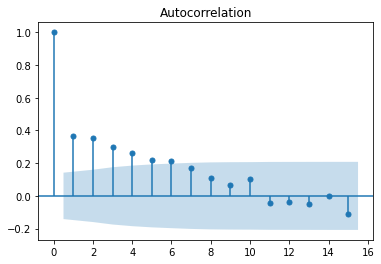

In [85]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(TimeSeries, lags=15)
plt.show()

Again confirms Correlation on EWS values for patient 7777 is low for lag numbers < 6 and insignificant or
even negative for > 6.

###### Augmented Dickey Fuller (ADF) Test 

In [86]:
# This tests the EWS value:

from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(TimeSeries.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.877523
p-value: 0.000039


p value < 0.05 (significance level) => timeseries is stationary, no differencing needed

###### ADF for each of the Vital parameters

In [138]:
Targets = OnePatient[['SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP']]
#display(Targets, Targets.columns)

print('Patient 7777:')
for i in range(Targets.shape[1]):
    result = adfuller(Targets.iloc[:, [i]].values)
    print("\t", Targets.iloc[:, [i]].columns[0], ":")
    print('\t\tADF Statistic: %f' % result[0])
    print('\t\tp-value: %f' % result[1])
        

Patient 7777:
	 SBP :
		ADF Statistic: -5.028443
		p-value: 0.000019
	 LOC :
		ADF Statistic: nan
		p-value: nan
	 SpO2 :
		ADF Statistic: -14.257486
		p-value: 0.000000
	 Add_O2 :
		ADF Statistic: -3.558769
		p-value: 0.006600
	 HR :
		ADF Statistic: -4.943096
		p-value: 0.000029
	 RR :
		ADF Statistic: -4.560104
		p-value: 0.000153
	 TEMP :
		ADF Statistic: -4.437488
		p-value: 0.000255


p value < 0.05 (significance level) for all vital parameters except LOC => timeseries is stationary, no differencing needed.

for LOC the value is nan ?????

In [144]:
Targets = OnePatient[['LOC']]
Targets.value_counts()

LOC
1      191
dtype: int64

For the LOC column there is only 1 value. That makes it pretty much stationary. We need to check for each patient seperatly if this column has more than 1 value before applying the ADF test.

#### Autocorrelation plots

Continue with patient 7777 with daterange ('2019-10-28', '2019-11-19') as first experiment.

##### AR model

###### On EWS value only

/usr/lib64/python3.6/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


 Lag: 14 

 Coefficients: [ 1.86372318  0.14812017  0.14367804  0.12938683  0.06584922  0.07225098
  0.08217466  0.02447283 -0.03881748 -0.06652674  0.07212773 -0.14584208
 -0.07558868 -0.0527076   0.0899572 ] 


 predicted=1.528498, expected=2.000000 
 predicted=2.146924, expected=3.000000 
 predicted=2.205767, expected=3.000000 

 Test RMSE: 0.726 


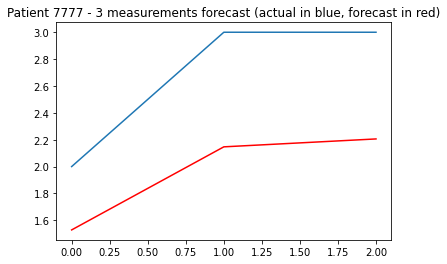

In [87]:
# See [1] p.194-195

from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt

NbrEstimates = 3

# split dataset
X = TimeSeries.values
train, test = X[1:len(X)-NbrEstimates], X[len(X)-NbrEstimates:]

# train autoregression
model = AR(train)
model_fit = model.fit()
print( ' Lag: %s ' % model_fit.k_ar)
print( '\n Coefficients: %s ' % model_fit.params)
print("\n")

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print( ' predicted=%f, expected=%f ' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print( '\n Test RMSE: %.3f ' % rmse)

# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.title("Patient 7777 - 3 measurements forecast (actual in blue, forecast in red)")
plt.show()

The model selected a lag of 14 measurements. After rounding, the first prediction would be accurate, the 2 next would be 1 EWS level off.

###### On all Vital parameters

Here we predict all the vital parameters base data : 'SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP'.

On the predicted vital signs we calculate the scores and the EWS.

In [ ]:
# To Do

##### ARIMA model

/usr/lib64/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/lib64/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/lib64/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                               SARIMAX Results                                
Dep. Variable:              EWS_Total   No. Observations:                  191
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -330.248
Date:                Wed, 13 Jan 2021   AIC                            672.497
Time:                        09:16:41   BIC                            691.979
Sample:                             0   HQIC                           680.389
                                - 191                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7198      0.076     -9.456      0.000      -0.869      -0.571
ar.L2         -0.4830      0.089     -5.407      0.000      -0.658      -0.308
ar.L3         -0.3299      0.095     -3.487      0.0

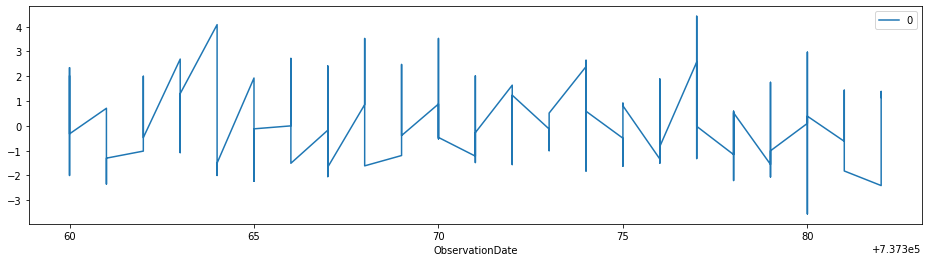

Density plot:


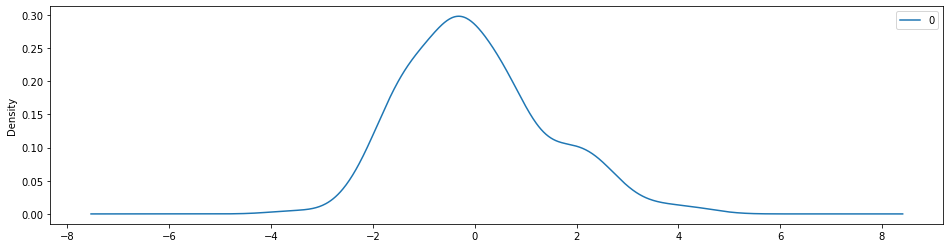

                0
count  191.000000
mean     0.016567
std      1.382397
min     -3.550897
25%     -1.011822
50%     -0.131234
75%      0.723001
max      4.421132


In [88]:
# fit an ARIMA model and plot residual errors
# See [1] §24.3, p.212

#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(TimeSeries, order=(5,1,0))
#model_fit = model.fit(disp=0)
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = DataFrame(model_fit.resid)
print("Residual errors:")
residuals.plot(figsize = (16, 4))
plt.show()

# density plot of residuals
print("Density plot:")
residuals.plot(kind='kde', figsize = (16, 4))
plt.show()

# summary stats of residuals
print(residuals.describe())

Errors are gaussian, very slight bias 

###### Rolling Forecast ARIMA Model

###### EWS only

 predicted=2.692958, expected=2.000000 
 predicted=2.406203, expected=3.000000 
 predicted=2.619016, expected=5.000000 
 predicted=3.409778, expected=3.000000 
 predicted=3.307312, expected=4.000000 
 predicted=3.304199, expected=3.000000 
 predicted=3.449192, expected=6.000000 
 predicted=4.200856, expected=6.000000 
 predicted=5.066937, expected=5.000000 
 predicted=4.835622, expected=3.000000 
 predicted=4.282421, expected=5.000000 
 predicted=4.607666, expected=4.000000 
 predicted=4.719878, expected=3.000000 
 predicted=3.838281, expected=5.000000 
 predicted=4.175210, expected=5.000000 
 predicted=4.494463, expected=3.000000 
 predicted=3.981927, expected=6.000000 
 predicted=4.508437, expected=3.000000 
 predicted=4.283335, expected=4.000000 
 predicted=4.011476, expected=3.000000 
 predicted=3.896393, expected=3.000000 
 predicted=3.390657, expected=6.000000 
 predicted=4.227259, expected=3.000000 
 predicted=3.976467, expected=3.000000 
 predicted=3.438838, expected=8.000000 


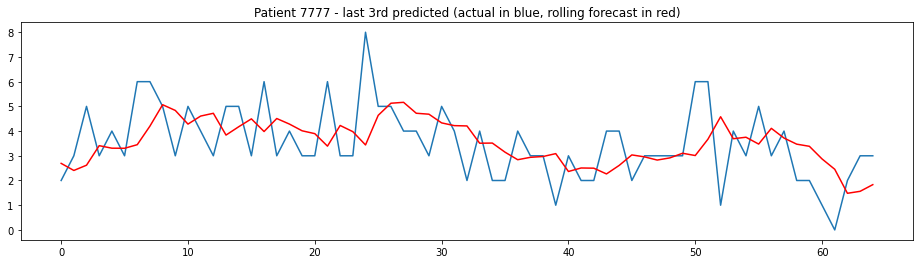

In [89]:
# See [1] §24.4 p.216

# evaluate an ARIMA model using a walk-forward validation

#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = TimeSeries.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

# walk-forward validation
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    #model_fit = model.fit(disp=0)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)                         # <= at each run history gets one more element from the test set appended
    print( ' predicted=%f, expected=%f ' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print( ' Test RMSE: %.3f ' % rmse)

# plot forecasts against actual outcomes
figure = plt.figure(1, figsize = (16, 4))
plt.plot(test)
plt.plot(predictions, color='red')
plt.title("Patient 7777 - last 3rd predicted (actual in blue, rolling forecast in red)")
plt.show()

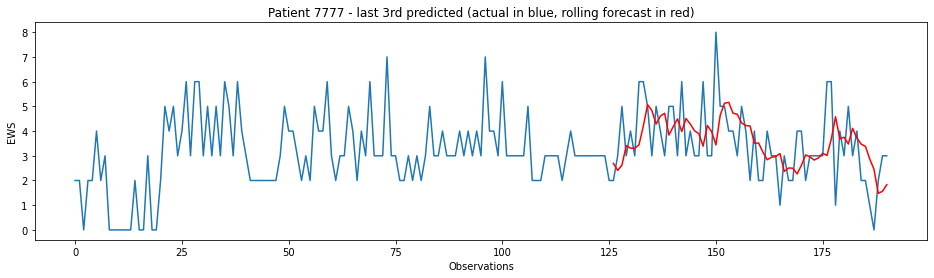

In [90]:
# Plot original and predicted data

#print(X.T, predictions)
# make sure the predictions are in the same position as the test data
Predictions = np.full(len(X), None)
Predictions[size:len(X)] = predictions
#print(Predictions)
    
figure = plt.figure(1, figsize = (16, 4))
plt.plot(X)   # original data
plt.plot(Predictions, color='red') # Predictions
plt.title("Patient 7777 - last 3rd predicted (actual in blue, rolling forecast in red)")
plt.xlabel('Observations')
plt.ylabel('EWS')
plt.show()

To compare with the linear regression, only forecast the last 3 measurements:

 predicted=1.482253, expected=2.000000 
 predicted=1.562171, expected=3.000000 
 predicted=1.831856, expected=3.000000 
 Test RMSE: 1.111 


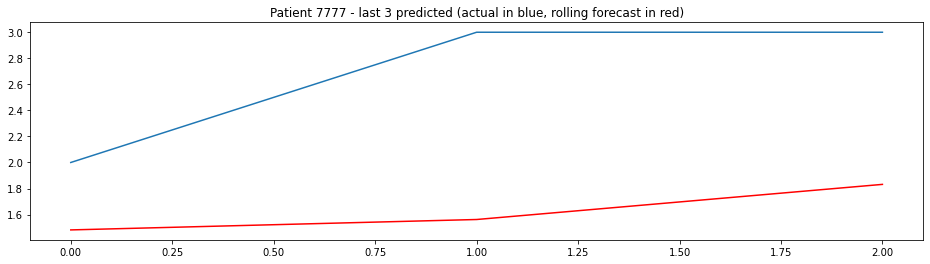

In [91]:
NbrPredictions = 3

# split into train and test sets
X = TimeSeries.values
train, test = X[0:-NbrPredictions], X[-NbrPredictions:len(X)]
#print(X.T, train.T, test.T, X.shape, train.shape, test.shape)
history = [x for x in train]

# walk-forward validation
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0)) 
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)                         # <= at each run history gets one more element from the test set appended
    print( ' predicted=%f, expected=%f ' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print( ' Test RMSE: %.3f ' % rmse)

# plot forecasts against actual outcomes
figure = plt.figure(1, figsize = (16, 4))
plt.plot(test)
plt.plot(predictions, color='red')
plt.title("Patient 7777 - last 3 predicted (actual in blue, rolling forecast in red)")
plt.show()

After rounding, all EWS predictions are 1 off. 

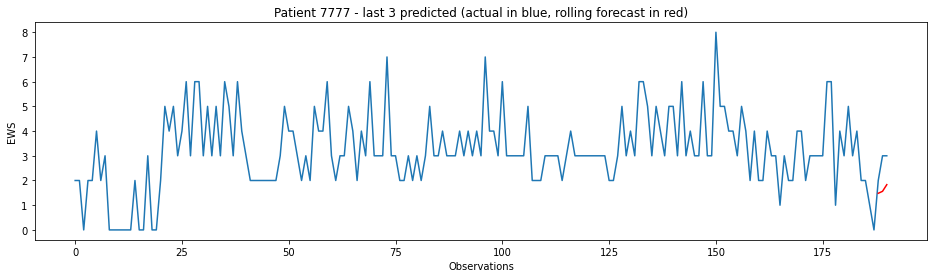

In [92]:
# Plot original and predicted data

#print(X.T, predictions)
# make sure the predictions are in the same position as the test data
Predictions = np.full(len(X), None)
Predictions[-NbrPredictions:len(X)] = predictions
#print(Predictions)
    
figure = plt.figure(1, figsize = (16, 4))
plt.plot(X)   # original data
plt.plot(Predictions, color='red') # Predictions
plt.title("Patient 7777 - last 3 predicted (actual in blue, rolling forecast in red)")
plt.xlabel('Observations')
plt.ylabel('EWS')
plt.show()

The way the original data set is split does not seem to influence the prediction.

TO DO: tweeking the p, d and q parameters for the prediction.
- p: The number of lag observations included in the model, also called the lag order.
- d: The number of times that the raw observations are differenced, also called the degree of differencing.
- q: The size of the moving average window, also called the order of moving average.

Use autocorrelation and partial autocorrelation to do so.

Rewrite the code to allow for experimenting with p,d,q

In [28]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

def RunARIMA(Train, Test, p, d, q):
    # Determine the Arima model for Train data with base parameters p,d,q.
    
    # walk-forward validation
    predictions = list()
    history = [x for x in Train]
    for t in range(len(Test)):
        model = ARIMA(history, order=(p,d,q)) # on each run the ARIMA model is retrained. history gets one more element - see below
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = Test[t]
        history.append(obs)                  # <= at each run history gets one more element from the Test set appended ????
        # print( ' predicted=%f, expected=%f ' % (yhat, obs)) # >>>>> predictions are not rounded !!!!
    
    # evaluate forecasts
    rmse = sqrt(mean_squared_error(Test, predictions))
    #print( ' Test RMSE: %.3f ' % rmse)
    
    return(model, predictions, rmse)

In [18]:
def PlotArima(X, predictions, Title):
    
    # make sure the predictions are in the same position as the test data    
    Predictions = np.full(len(X), None)
    Predictions[size:len(X)] = predictions
    #print(Predictions)
    
    figure = plt.figure(1, figsize = (16, 4))
    plt.plot(X)   # original data
    plt.plot(Predictions, color='red') # Predictions
    plt.title(Title)
    plt.xlabel('Observations')
    plt.ylabel('EWS')
    plt.show()
    
    return(None)

In [95]:
def MakeTitle(p, d, q, RMSE):
    Buffer = ' Test RMSE= %.3f ' % RMSE
    return("Patient 7777 - blue: actual, red: forecast, p=" + str(p) + ", d=" + str(d) + ", q=" + str(q) + ", " + Buffer)   

In [115]:
import warnings
warnings.filterwarnings("ignore")

def TestArima(X, train, test, p, d, q):
    ArimaModel, predictions, RMSE = RunARIMA(train, test, p, d, q)
    PlotArima(X, predictions, MakeTitle(p, d, q, RMSE) )

In [ ]:
# Same as original run, just to compare:

# split into train and test sets
X = TimeSeries.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]


TestArima(X, train, test, 5, 1, 0)

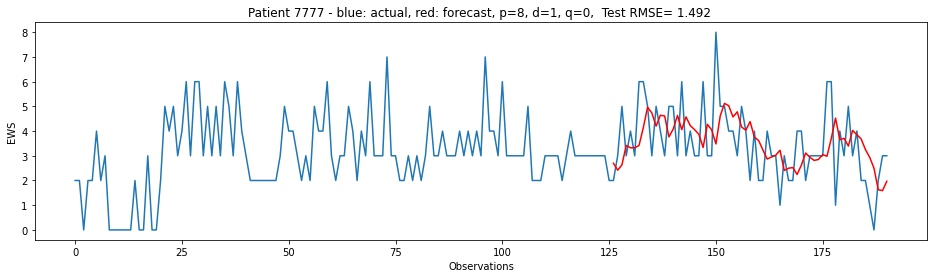

In [98]:
# Same data and test set, different p,d,q
TestArima(X, train, test, 8,1,0)

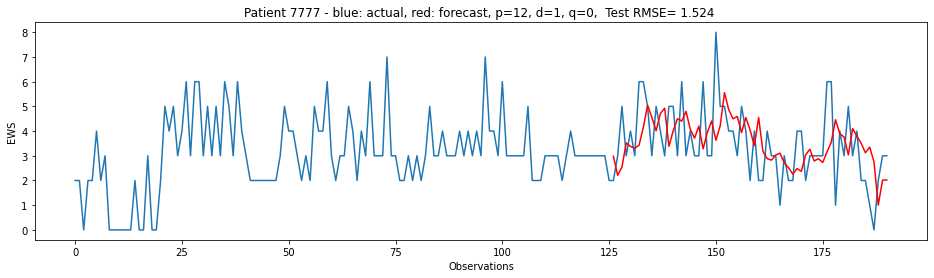

In [99]:
TestArima(X, train, test, 12,1,0)

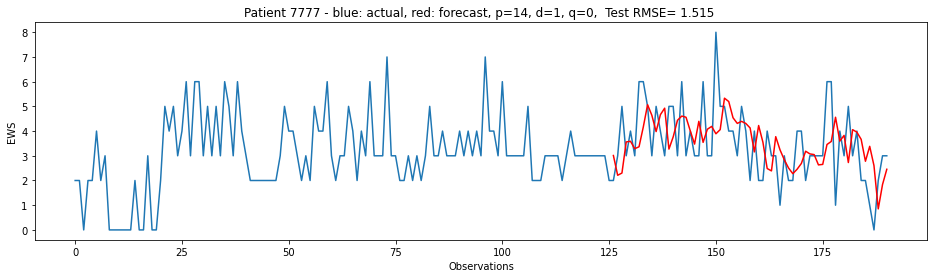

In [100]:
TestArima(X, train, test, 14,1,0)

All versions give a sort of averaged trend of the test data.
Increasing the lag (p) gives a lower RMSE, the peaks are modeled more accuratly, but with a delay in time. Execution time of the modelling increases.

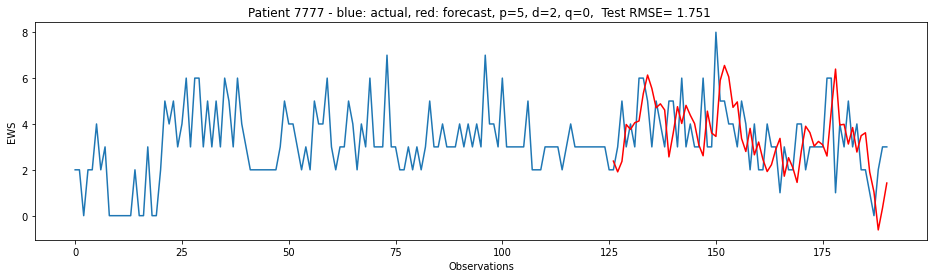

In [101]:
TestArima(X, train, test, 5, 2, 0)

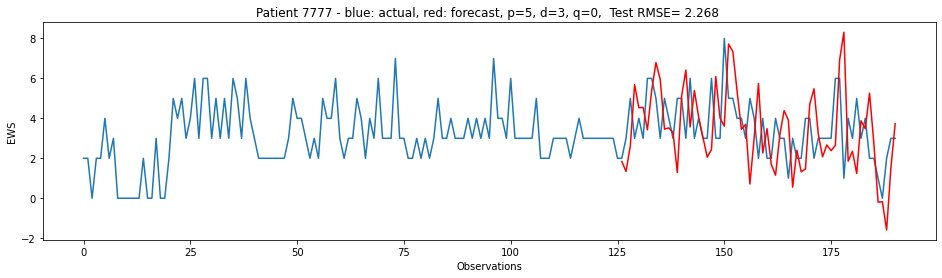

In [102]:
TestArima(X, train, test, 5, 3, 0)

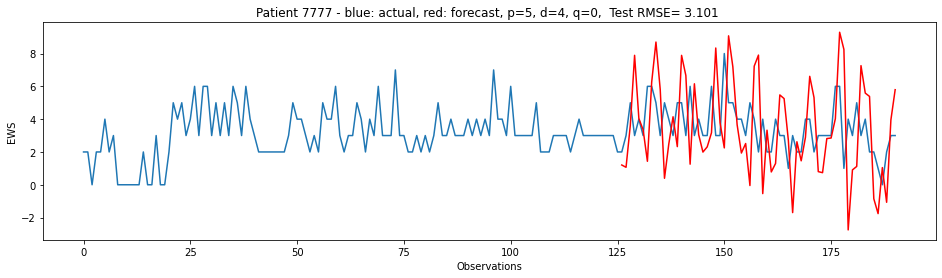

In [103]:
TestArima(X, train, test, 5, 4, 0)

Increasing the differencing (d) models the peaks better, still with a delay in time, but quickly exagerates the peaks. In all cases, the RMSE is higher.

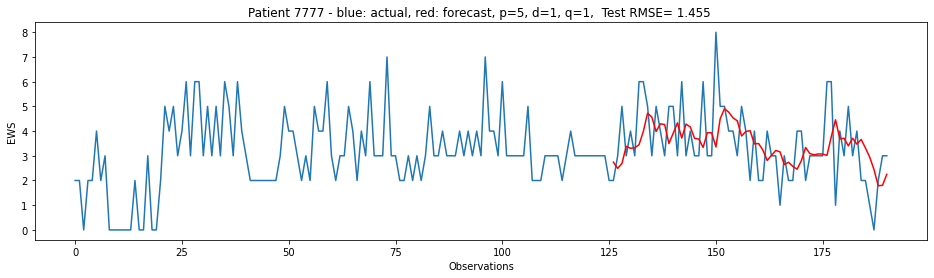

In [104]:
TestArima(X, train, test, 5, 1, 1)

In [ ]:
TestArima(X, train, test, 5, 1, 2)

/usr/lib64/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/lib64/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/lib64/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/lib64/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/lib64/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarnin

/usr/lib64/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/lib64/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/lib64/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/lib64/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/lib64/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/lib64/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optim

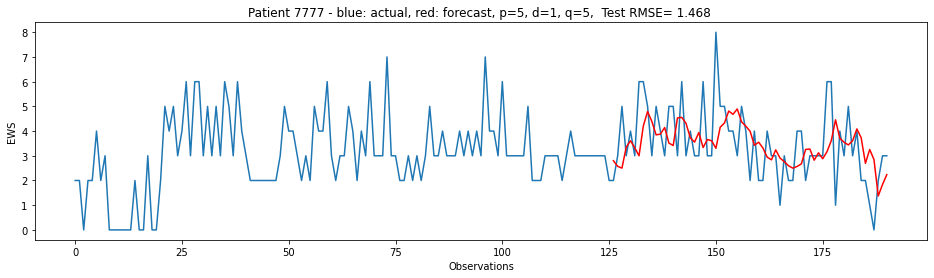

In [106]:
TestArima(X, train, test, 5, 1, 5)

Varying the moving average window/order of moving average (q): Increasing the q value has a severe impact lengthening the run time duration of the algorithm. RMSE is lower. It generates however loads of convergence warnings. q=1 results in an error.

/usr/lib64/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/lib64/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/lib64/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/lib64/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/lib64/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/lib64/python3.6/site-packages/statsmodels/base/model.py:5

/usr/lib64/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/lib64/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/lib64/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/lib64/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/lib64/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/lib64/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optim

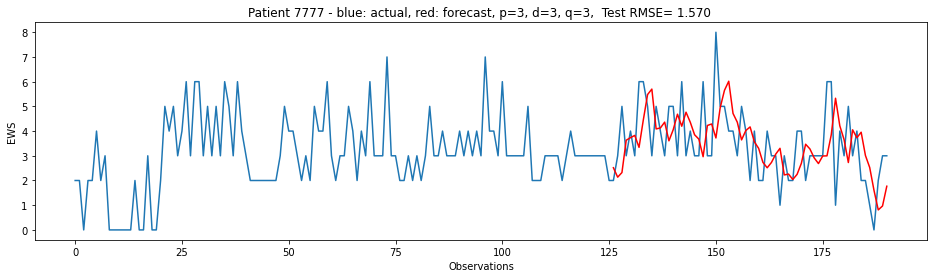

In [107]:
TestArima(X, train, test, 3, 3, 3)

RMSE is higher, peaks are modeled quit good, but with a time delay. Long runtime.

##### Autocorrelation

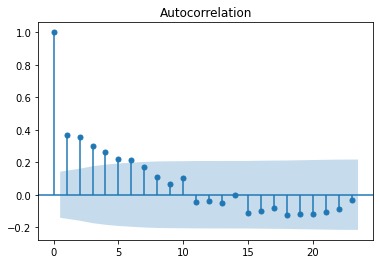

In [108]:
from statsmodels.graphics.tsaplots import plot_acf

# ACF plot of time series
plot_acf(TimeSeries)
plt.show()

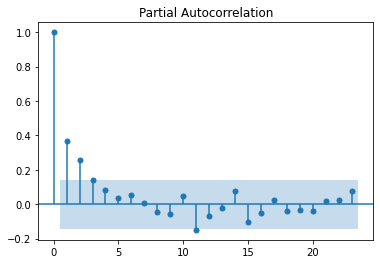

In [109]:
from statsmodels.graphics.tsaplots import plot_pacf

# PACF plot of time series
plot_pacf(TimeSeries, lags=23)
plt.show()

These plots indicate that a lag >3 has no sense.

###### Grid Search ARIMA Model Hyperparameters

In [112]:
def evaluate_arima_model(X, order):
    
    #print(order, order[0], order[1], order[2])
    
    # split into train and test sets
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]

    ArimaModel, predictions, RMSE = RunARIMA(train, test, order[0], order[1], order[2])

    return(RMSE)


In [113]:
import warnings

warnings.filterwarnings("ignore")


def evaluate_models(dataset, p_values, d_values, q_values):
    # evaluate combinations of p, d and q values for an ARIMA model
    
    dataset = dataset.astype('float32')
    #print(dataset.T)
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print( ' ARIMA%s RMSE=%.3f ' % (order,rmse))
                except:
                    print(" ARIMA%s RMSE=%.3f failed" % (order,rmse))
                    continue
    
    print( '\n Best ARIMA %s RMSE= %.3f ' % (best_cfg, best_score))
    

In [116]:
# evaluate parameters
# p_values = [0, 1, 2, 3, 4, 5, 6, 8, 10]
p_values = range(0, 4)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(TimeSeries.values, p_values, d_values, q_values)

 ARIMA(0, 0, 0) RMSE=1.519 
 ARIMA(0, 0, 1) RMSE=1.479 
 ARIMA(0, 0, 2) RMSE=1.489 
 ARIMA(0, 0, 3) RMSE=1.460 
 ARIMA(0, 1, 0) RMSE=1.827 
 ARIMA(0, 1, 1) RMSE=1.449 
 ARIMA(0, 1, 2) RMSE=1.453 
 ARIMA(0, 1, 3) RMSE=1.461 
 ARIMA(0, 2, 0) RMSE=3.140 
 ARIMA(0, 2, 1) RMSE=1.833 
 ARIMA(0, 2, 2) RMSE=1.457 
 ARIMA(0, 2, 3) RMSE=1.461 
 ARIMA(0, 3, 0) RMSE=5.689 
 ARIMA(0, 3, 1) RMSE=3.151 
 ARIMA(0, 3, 2) RMSE=1.887 
 ARIMA(0, 3, 3) RMSE=1.476 
 ARIMA(1, 0, 0) RMSE=1.475 
 ARIMA(1, 0, 1) RMSE=1.424 
 ARIMA(1, 0, 2) RMSE=1.427 
 ARIMA(1, 0, 3) RMSE=1.431 
 ARIMA(1, 1, 0) RMSE=1.613 
 ARIMA(1, 1, 1) RMSE=1.454 
 ARIMA(1, 1, 2) RMSE=1.460 
 ARIMA(1, 1, 3) RMSE=1.441 
 ARIMA(1, 2, 0) RMSE=2.422 
 ARIMA(1, 2, 1) RMSE=1.618 
 ARIMA(1, 2, 2) RMSE=1.461 
 ARIMA(1, 2, 3) RMSE=1.467 
 ARIMA(1, 3, 0) RMSE=3.953 
 ARIMA(1, 3, 1) RMSE=2.429 
 ARIMA(1, 3, 2) RMSE=1.636 
 ARIMA(1, 3, 3) RMSE=1.482 
 ARIMA(2, 0, 0) RMSE=1.460 
 ARIMA(2, 0, 1) RMSE=1.428 
 ARIMA(2, 0, 2) RMSE=1.437 
 ARIMA(2, 0, 3) RMSE

With input values:
   p_values = range(0, 4)
   d_values = range(0, 4)
   q_values = range(0, 4)
   
the output is : 
        ARIMA (3, 1, 3) RMSE = 1.389   <= Best result
        
        ARIMA (1, 0, 1) RMSE = 1.424
        
        ARIMA (1, 0, 2) RMSE = 1.427
        
        ARIMA (2, 0, 1) RMSE = 1.428
        
        ARIMA (1, 0, 3) RMSE = 1.431
        
        ARIMA (3, 0, 1) RMSE = 1.432
        
        ARIMA (2, 0, 2) RMSE = 1.437
        
        ARIMA (2, 0, 3) RMSE = 1.438
        
        ARIMA (3, 0, 0) RMSE = 1.439
        
        ARIMA (1, 1, 3) RMSE = 1.441
        
        ARIMA (3, 1, 1) RMSE = 1.444
        
        ARIMA (3, 1, 2) RMSE = 1.449
        
        ARIMA (0, 1, 1) RMSE = 1.449
        
        ARIMA (0, 1, 2) RMSE = 1.453
        
        ARIMA (2, 1, 2) RMSE = 1.453
        
        ARIMA (1, 1, 1) RMSE = 1.454
        
        ARIMA (3, 0, 2) RMSE = 1.456
        
        ARIMA (0, 2, 2) RMSE = 1.457
        
        ARIMA (3, 0, 3) RMSE = 1.458
        

In general the ones with 0 differencing give the lowest RMSE, which was expected from the Dickey Fuller criterium. Coincidently the very best result has 1 level of difference. It be because EWS is a combined value and some underlying vital parameter may not be stationary. But upon checking the ADF test for each vital parameter, all are stationary.

So, pdq values should be determined on each vital parameter separatly.

These findings are based on 1 patient and need to be verfied on the other patients. Ideally the whole grid search should be done on all patients, but this is computationally very intensive. So, we check only the best values on a selection of patients, for each of the vital signs.

In [ ]:
#warnings.filterwarnings("ignore")
#evaluate_models(TimeSeries.values, [5], [1], [5])

In [ ]:
#warnings.filterwarnings("ignore")
#evaluate_models(TimeSeries.values, [14], [1], [0])

##### PDQ for each vital parameter

In [145]:
import datetime as dt
from datetime import timedelta
from dateutil.parser import parse
from pandas.plotting import lag_plot

OnePatient = df[ (df['PatientId'] == 7777) & \
                 (df['ObservationDate'] >= parse('2019-10-28') ) &  \
                 (df['ObservationDate'] <= parse('2019-11-19') + timedelta(days=1) ) \
               ]
#display(OnePatient)
OnePatient.ObservationDate = OnePatient.ObservationDate.map(dt.datetime.toordinal)
#display(OnePatient)
Targets = OnePatient[['SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP']]


In [146]:
# This may require a very long execution time:

import warnings
warnings.filterwarnings("ignore")

p_values = range(0, 4)
d_values = [0, 1]
q_values = range(0, 4)

print('Patient 7777:')
#for i in range(Targets.shape[1]):
#    print("\t", Targets.iloc[:, [i]].columns[0], ":")
#    evaluate_models(Targets.iloc[:, [i]].values, p_values, d_values, q_values)


Patient 7777:


In [147]:
p_values = range(0, 4)
d_values = [0, 1]
q_values = range(0, 4)
warnings.filterwarnings("ignore")

#evaluate_models(Targets['SBP'].values, p_values, d_values, q_values)

 ARIMA(0, 0, 0) RMSE=15.127 
 ARIMA(0, 0, 1) RMSE=13.396 
 ARIMA(0, 0, 2) RMSE=12.160 
 ARIMA(0, 0, 3) RMSE=11.603 
 ARIMA(0, 1, 0) RMSE=13.187 
 ARIMA(0, 1, 1) RMSE=12.055 
 ARIMA(0, 1, 2) RMSE=12.173 
 ARIMA(0, 1, 3) RMSE=11.887 
 ARIMA(1, 0, 0) RMSE=12.056 
 ARIMA(1, 0, 1) RMSE=11.580 
 ARIMA(1, 0, 2) RMSE=11.450 
 ARIMA(1, 0, 3) RMSE=11.462 
 ARIMA(1, 1, 0) RMSE=11.507 
 ARIMA(1, 1, 1) RMSE=12.235 
 ARIMA(1, 1, 2) RMSE=12.076 
 ARIMA(1, 1, 3) RMSE=11.690 
 ARIMA(2, 0, 0) RMSE=11.261 
 ARIMA(2, 0, 1) RMSE=11.456 
 ARIMA(2, 0, 2) RMSE=11.529 
 ARIMA(2, 0, 3) RMSE=11.544 
 ARIMA(2, 1, 0) RMSE=11.678 
 ARIMA(2, 1, 1) RMSE=11.173 
 ARIMA(2, 1, 2) RMSE=11.548 
 ARIMA(2, 1, 3) RMSE=11.604 
 ARIMA(3, 0, 0) RMSE=11.338 
 ARIMA(3, 0, 1) RMSE=11.462 
 ARIMA(3, 0, 2) RMSE=11.550 
 ARIMA(3, 0, 3) RMSE=11.615 
 ARIMA(3, 1, 0) RMSE=12.162 
 ARIMA(3, 1, 1) RMSE=11.274 
 ARIMA(3, 1, 2) RMSE=11.353 
 ARIMA(3, 1, 3) RMSE=11.554 

 Best ARIMA (2, 1, 1) RMSE= 11.173 


In [ ]:
p_values = range(0, 4)
d_values = [0, 1]
q_values = range(0, 4)
warnings.filterwarnings("ignore")

#evaluate_models(Targets['LOC'].values, p_values, d_values, q_values)

In [ ]:
p_values = range(0, 4)
d_values = [0, 1]
q_values = range(0, 4)
warnings.filterwarnings("ignore")

#evaluate_models(Targets['SpO2'].values, p_values, d_values, q_values)

In [ ]:
p_values = range(0, 4)
d_values = [0, 1]
q_values = range(0, 4)
warnings.filterwarnings("ignore")

#evaluate_models(Targets['Add_O2'].values, p_values, d_values, q_values)

In [ ]:
p_values = range(0, 4)
d_values = [0, 1]
q_values = range(0, 4)
warnings.filterwarnings("ignore")

#evaluate_models(Targets['HR'].values, p_values, d_values, q_values)

In [ ]:
p_values = range(0, 4)
d_values = [0, 1]
q_values = range(0, 4)
warnings.filterwarnings("ignore")

#evaluate_models(Targets['RR'].values, p_values, d_values, q_values)

In [ ]:
p_values = range(0, 4)
d_values = [0, 1]
q_values = range(0, 4)
warnings.filterwarnings("ignore")

#evaluate_models(Targets['TEMP'].values, p_values, d_values, q_values)

PDQ values with RMSE based on patient 7777:

           Vital      PDQ    RMSE
           Param.
          ------------------------
Jens :     SP02 :   (0,0,0) 15.211

           RR:      (1,1,3)  2.895
           
Idrees :   Add_O2 : (1,1,1)  0.317

           HR :     (3,0,1)  6.695
           
           TEMP :   (1,1,1)  0.258
           
Maryame:   SBP :    (2,1,1) 11.173

           LOC :    (0,1,0)  0.000
           
Surprisingly 5 have a d value of 1, whereas ADF indicated 0 for all vital parameters

In the defined order of usage:

'SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP' = [(2,1,1), (0,1,0), (0,0,0), (1,1,1), (3,0,1), (1,1,3), (1,1,1)]

Now, need to check these pdq values on other patients

#### Forecast Confidence Interval

In [ ]:
###### EWS only

In [201]:
# split into train and test sets
#X = TimeSeries.values
X = X.astype('float32')
size = len(X) - 1
train, test = X[0:size], X[size:]

# fit an ARIMA model
model = ARIMA(train, order=(3,1,3))
#model_fit = model.fit(disp=False)
model_fit = model.fit()
# forecast
# forecast, stderr, conf = model_fit.forecast()
forecast = model_fit.forecast()
confid = model_fit.get_forecast(steps=1).summary_frame()
display(confid)

# summarize forecast and confidence intervals
print( ' Expected: %.3f ' % test[0])
print( ' Forecast: %.3f ' % forecast)
print( ' Standard Error: %.3f ' % confid.mean_se)
# print( ' 95%% Confidence Interval: %.3f to %.3f ' % (conf[0][0], conf[0][1]))
print( ' 95%% Confidence Interval: %.3f to %.3f ' % (confid.mean_ci_lower.values[0], confid.mean_ci_upper.values[0]))

print('\n')

result = model_fit.get_forecast()
# summarize forecast and confidence intervals
print( ' Expected: %.3f ' % test[0] )
print( ' Forecast: %.3f ' % result.predicted_mean)
print( ' Standard Error: %.3f ' % result.se_mean)
conf = result.conf_int(0.05)
print( ' 95%% Confidence Interval: %.3f to %.3f ' % (conf[0][0], conf[0][1]))

y      mean   mean_se  mean_ci_lower  mean_ci_upper
0  2.302502  1.343713      -0.331126       4.936131

 Expected: 3.000 
 Forecast: 2.303 
 Standard Error: 1.344 
 95% Confidence Interval: -0.331 to 4.936 


 Expected: 3.000 
 Forecast: 2.303 
 Standard Error: 1.344 
 95% Confidence Interval: -0.331 to 4.936 


###### Arima full Vital Parameter EWS forecast

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

def RunARIMA(Train, Test, p, d, q):
    # Determine the Arima model for Train data with base parameters p,d,q.
    
    # walk-forward validation
    predictions = list()
    history = [x for x in Train]
    for t in range(len(Test)):
        model = ARIMA(history, order=(p,d,q)) # on each run the ARIMA model is retrained. history gets one more element - see below
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = Test[t]
        history.append(obs)                  # <= at each run history gets one more element from the Test set appended ????
        # print( ' predicted=%f, expected=%f ' % (yhat, obs)) # >>>>> predictions are not rounded !!!!
    
    # evaluate forecasts
    rmse = sqrt(mean_squared_error(Test, predictions))
    #print( ' Test RMSE: %.3f ' % rmse)
    
    return(model, predictions, rmse)

In [15]:
def PlotArimaUni(Actual, predictions, NbrPredictions, Title):
    
    # make sure the predictions are in the same position as the test data    
    Predictions = np.full(len(Actual), None)
    #size = int(len(X) * 0.66)
    #Predictions[size:len(X)] = predictions
    Predictions[-NbrPredictions:] = predictions
    Predictions = Predictions.reshape(len(Predictions),1) 
    #print(Predictions)
    #display(Actual)
    DF = Actual
    DF = DF.add_prefix('Actual ')
    DF['Prediction'] =  Predictions
    #display(DF)
        
    figure = plt.figure(1, figsize = (16, 4))
    #plt.plot(Actual)   # original data
    #plt.plot(Pred, color='red') # Predictions
    ax = DF.plot(figsize = (16, 4))
    #Pred.plot(ax=ax)
    plt.title(Title)
    # plt.xlabel('Date')
    # plt.ylabel('EWS')
    plt.show()
    
    return(None)

In [16]:
def MatchScore(Predictions, Actual):
    # List number of accurate, 1 off, 2 off, etc predicted EWS values
    
    Original = Actual[-(Predictions.shape[0]):]
    Difference = np.abs(Predictions - Original.T)
    #print(Original.T, "\n\n", Predictions, "\n\n", Difference)    
    Unique, Counts = np.unique(Difference, return_counts=True)
    
    d = dict(zip(Unique, Counts))
    # Complete dictionary:
    for i in range(3):
        if not (i in d.keys() ):
            d[i] = 0   
    #print(d)
    
    return(d)

In [17]:
import datetime as dt
from datetime import timedelta
from dateutil.parser import parse
import numpy as np

import warnings

warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt
%matplotlib inline


def PredictValueARIMA(Target, NbrPredictions, PDQset):
    # Make a linear regression on the given Target
    
    Target = Target.to_numpy()
    Target = Target.reshape(len(Target),1)
    
    # Split the data. Keep last NbrPredictions as test values
    y_Train = Target[:-NbrPredictions]
    y_Test = Target[-NbrPredictions:]
        
    #print("X_Train: ", X_Train.T, "\nX_Test: ", X_Test.T, "\ny_Train: ", y_Train.T, "\ny_Test: ", y_Test.T)
    #print(Dates.shape, Target.shape, X_Train.shape, X_Test.shape, y_Train.shape, y_Test.shape)
    #print(Target.shape, y_Train.shape, y_Test.shape)
    #print(type(X_Train), X_Train[0], type(X_Train[0]), X_Train.shape, type(X_Train[0][0]))
    #print(type(X_Test), X_Test[0], type(X_Test[0]), X_Test.shape, type(X_Test[0][0]))
    
    ArimaModel, Prediction, RMSE = RunARIMA(y_Train, y_Test, PDQset[0], PDQset[1], PDQset[2])
    
    #print("Prediction: ", Prediction, len(Prediction))
    
    return(ArimaModel, Prediction, RMSE) 


def EWSmultiARIMA(patient, DateRange, NbrPredictions, PDQlist):
    # Predict NbrPredictions future values of EWS based on a timeseries of previous Vital Parameter values for 
    # one patient on a specific date range.
    # Each Vital Parameter prediction is plotted seperatly followed by a plot of all EWS scores.
    #
    # This function is intended to compare predictions to actual values. It does not make predictions in the future.
    #

    #print(type(DateRange), type(DateRange[0]), type(parse(DateRange[0])))
    
    OnePatient = df[ (df['PatientId'] == patient) & \
                     (df['ObservationDate'] >= parse(DateRange[0])) &  \
                     (df['ObservationDate'] <= parse(DateRange[1]) + timedelta(days=1) ) \
                   ]
    #display(OnePatient)
    
    print("\nPatientID = ", patient, ",  Nbr of Observations = ", OnePatient.shape[0] , "\n")
    Dims = OnePatient[['ObservationDate', 'SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP']].set_index('ObservationDate').sort_index()
    # keep last NbrPredictions dates in datetime form:
    y_Pred_dt = Dims.tail(NbrPredictions)
    #print("y_Pred_dt = ", y_Pred_dt, y_Pred_dt.shape)
    Dates = OnePatient.ObservationDate.map(dt.datetime.toordinal)
    Targets = OnePatient[['SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP']]
    
    #display(OrigScores)

    # Linear regression for each of the vital parameters seperatly:
    Predictions = np.empty([NbrPredictions, Targets.shape[1]])
    #print(Predictions.shape)
    for i in range(Targets.shape[1]):
        #print(i, Targets.iloc[:, [i]], Targets.iloc[:, [i]].shape)
        ArimaModel, Predictions[:,i], RMSE = \
                         PredictValueARIMA(Targets.iloc[:, [i]], NbrPredictions, PDQlist[i])
        Predictions[:,i] = Predictions[:,i].ravel()
        Name = list(Targets.iloc[:, [i]].columns)[0]
        #print(Name)
        Title = "PatientID = " + str(patient) + " - " + Name + " - RMSE = " + str(RMSE)
        PlotArimaUni(Dims[[Name]], Predictions[:,i], NbrPredictions, Title)
    #print(Predictions, Predictions.shape)
    
    scores = np.zeros([Predictions.shape[0], Predictions.shape[1]+1], dtype=int)
    #print(scores.shape)
    for j in range(len(Predictions)):
        #hlp = Scores(Predictions[j])
        #print(hlp.T, hlp.T.shape, scores[j].shape)
        #hlp.reshape(len(hlp),1)
        scores[j] = Scores(Predictions[j]).T
    #print(scores)

    #OrigScores = OnePatient[['ObservationDate', \
    #                       'SBP_Score', 'LOC_Score', 'SpO2_Score', 'Add_O2_Score', 'HR_Score', 'RR_Score', 'TEMP_Score',\
    #                       'EWS_Total']].set_index('ObservationDate')
    OrigEWSScores = OnePatient[['ObservationDate', 'EWS_Total']].set_index('ObservationDate')
    #print(np.round(Prediction))
    #print(y_Test)
    #display(y_Pred_dt)
    #y_Pred_dt[['SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP']] = Predictions
    #y_Pred_dt[['SBP_Score', 'LOC_Score', 'SpO2_Score', 'Add_O2_Score', 'HR_Score', \
    #           'RR_Score', 'TEMP_Score', 'EWS_Total']] = scores
    #display(y_Pred_dt)
    
    # Plot original and predicted data scores
    

    #PredScores = \
    #   y_Pred_dt[['SBP_Score', 'LOC_Score', 'SpO2_Score', 'Add_O2_Score', 'HR_Score', 'RR_Score', 'TEMP_Score', 'EWS_Total']]
    
    figure = plt.figure(1, figsize = (16, 8))
    #plt.plot(OrigScores, linestyle='dashed')   # original data
    #plt.plot(PredScores) # Predictions
    #plt.plot(scores)
    Title = "PatientID = " + str(patient) + " - EWS"
    PlotArimaUni(OrigEWSScores, scores[:,-1], NbrPredictions, Title)
    #plt.xlabel('Observation Dates')
    #plt.ylabel('EWS Scores')
    #plt.title(patient)
    #ax = plt.gca()
    #ax.legend(loc='upper center', fontsize='x-large')
        
    plt.show()
    
    #print(OnePatient.EWS_Total.max())
        
    TrainScore = MatchScore(np.round(scores[:,-1]), OrigEWSScores.to_numpy())
    #print(TrainScore, type(TrainScore[0]))

    #Percentages:
    print("EWS Score prediction :\n")
    Divider = scores.shape[0]
    #print(Divider, type(Divider))
    print("Accurate = \t\t", (TrainScore[0]/Divider)*100, "%")
    print("Accurate + 1 off = \t", ((TrainScore[0] + TrainScore[1])/Divider)*100, "%")
    print("Accurate + max 2 off = \t", ((TrainScore[0] + TrainScore[1] + TrainScore[2])/Divider)*100, "%")

    return(None)


PatientID =  7777 ,  Nbr of Observations =  191 



<Figure size 1152x288 with 0 Axes>

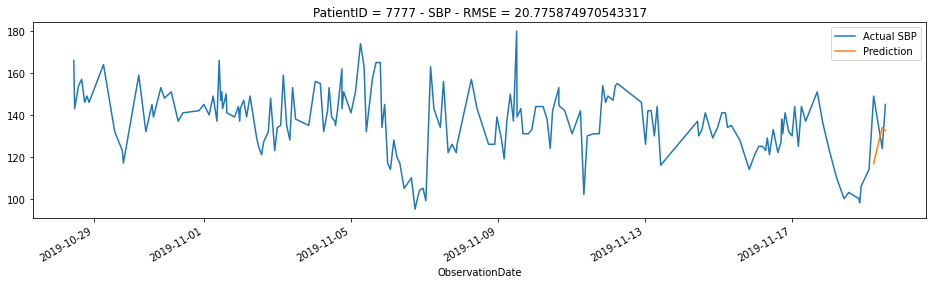

<Figure size 1152x288 with 0 Axes>

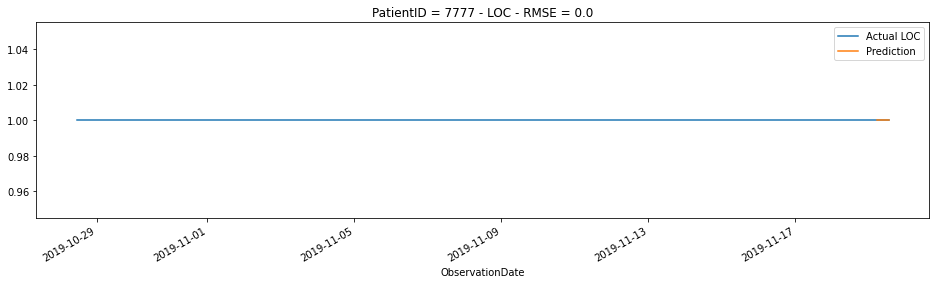

<Figure size 1152x288 with 0 Axes>

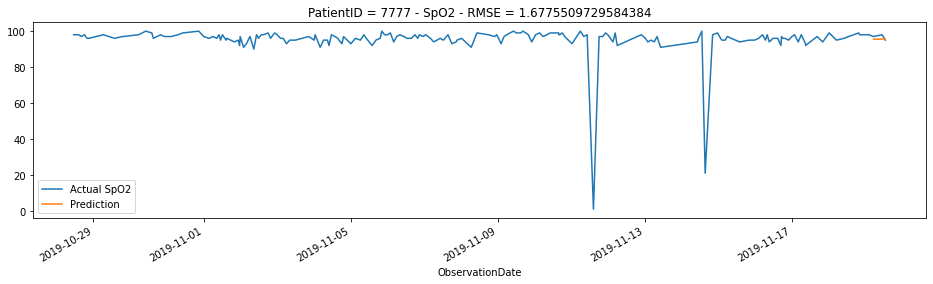

<Figure size 1152x288 with 0 Axes>

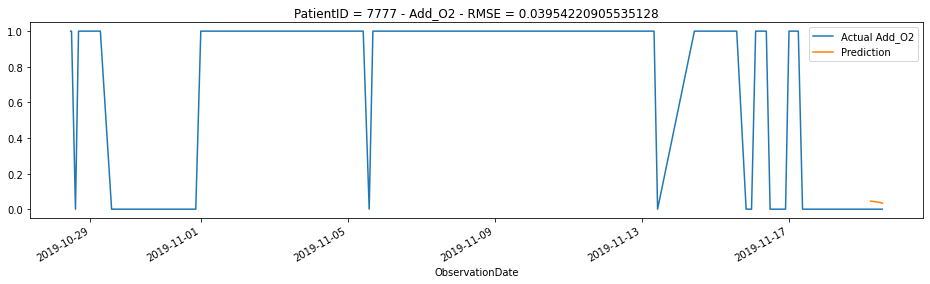

<Figure size 1152x288 with 0 Axes>

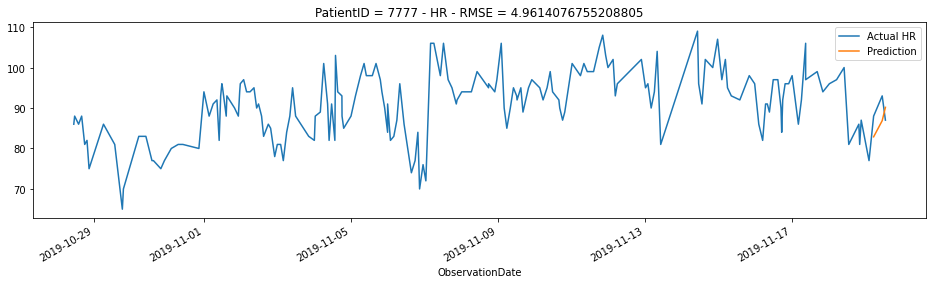

<Figure size 1152x288 with 0 Axes>

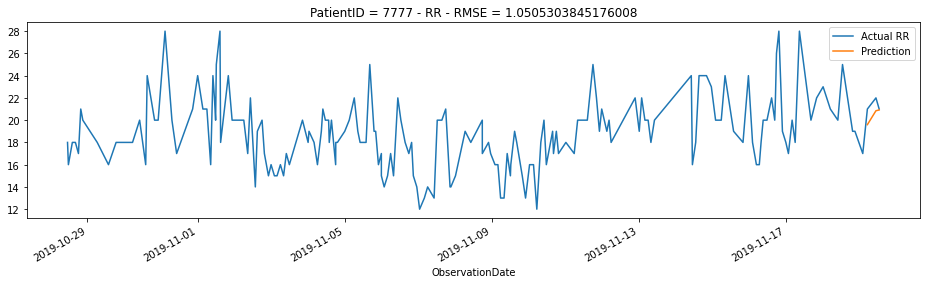

<Figure size 1152x288 with 0 Axes>

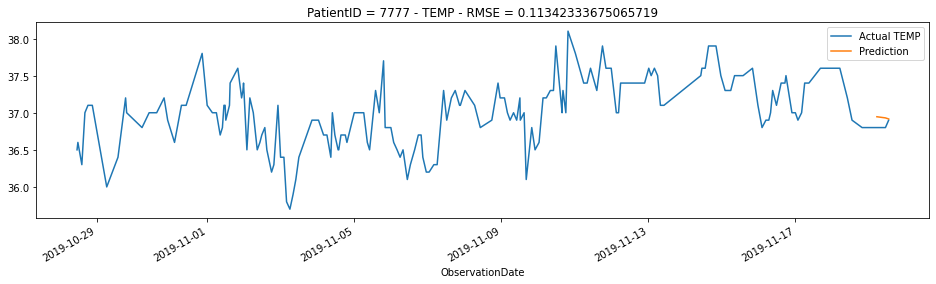

<Figure size 1152x576 with 0 Axes>

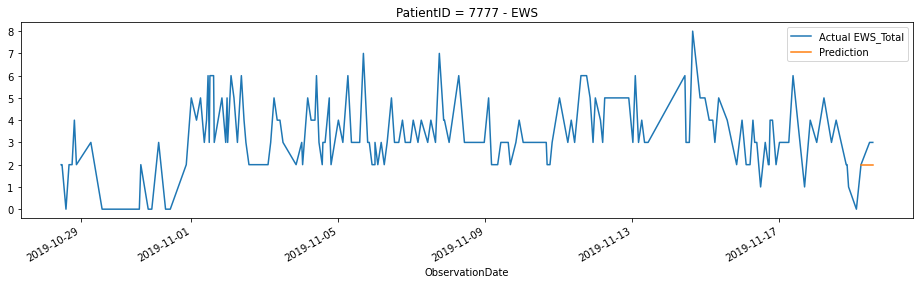

EWS Score prediction :

Accurate = 		 33.33333333333333 %
Accurate + 1 off = 	 100.0 %
Accurate + max 2 off = 	 100.0 %


In [20]:
EWSmultiARIMA(7777, ('2019-10-28', '2019-11-19'), 3, [(2,1,1), (0,1,0), (0,0,0), (1,1,1), (3,0,1), (1,1,3), (1,1,1)] )


PatientID =  1835 ,  Nbr of Observations =  232 



<Figure size 1152x288 with 0 Axes>

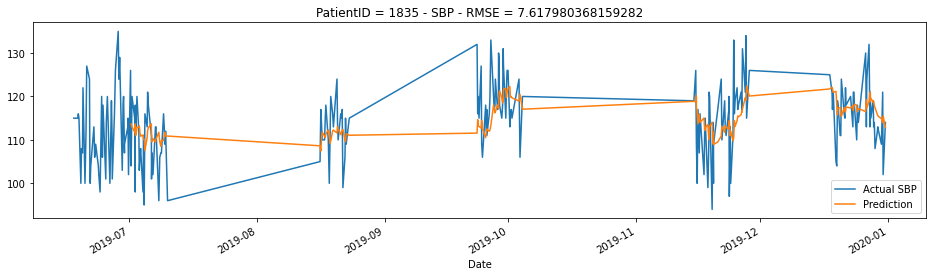

<Figure size 1152x288 with 0 Axes>

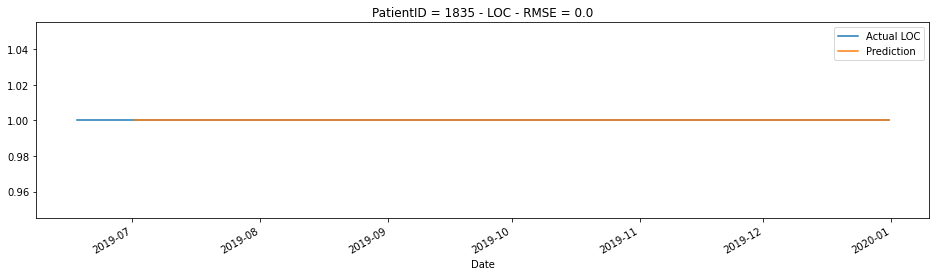

<Figure size 1152x288 with 0 Axes>

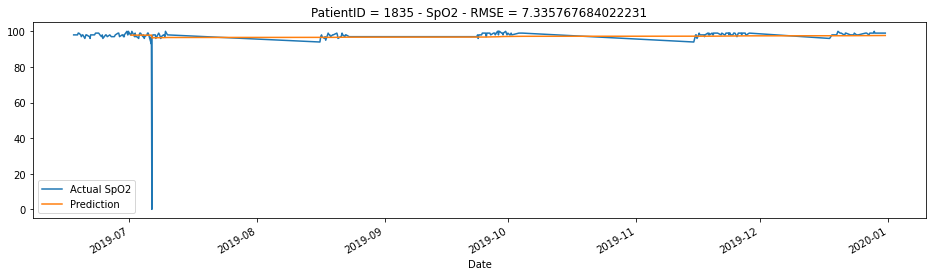

<Figure size 1152x288 with 0 Axes>

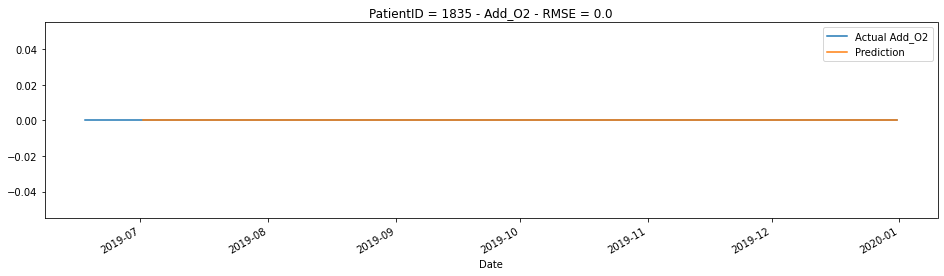

<Figure size 1152x288 with 0 Axes>

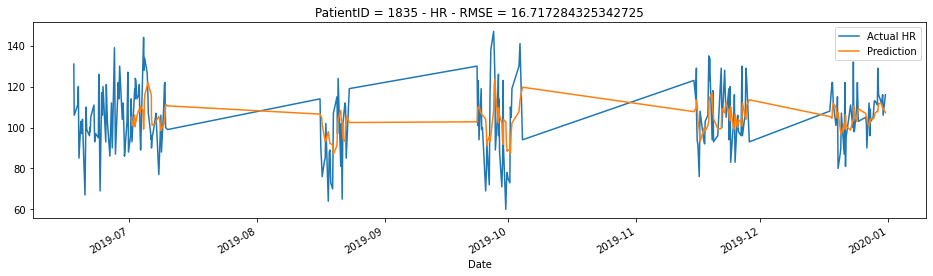

<Figure size 1152x288 with 0 Axes>

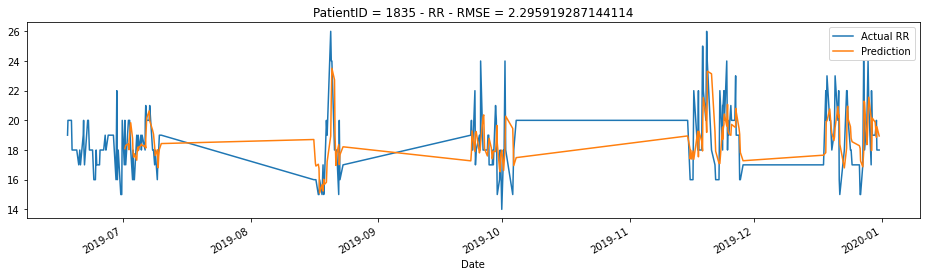

<Figure size 1152x288 with 0 Axes>

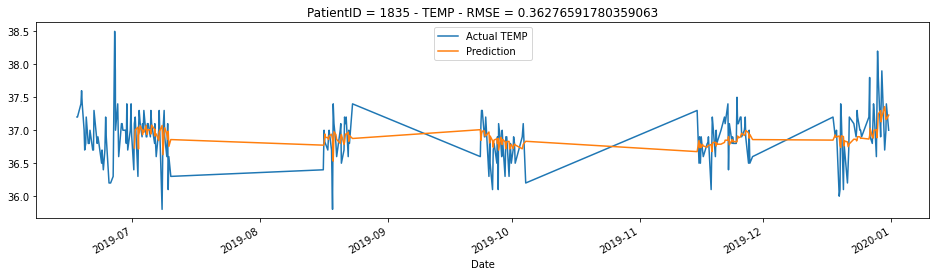

<Figure size 1152x576 with 0 Axes>

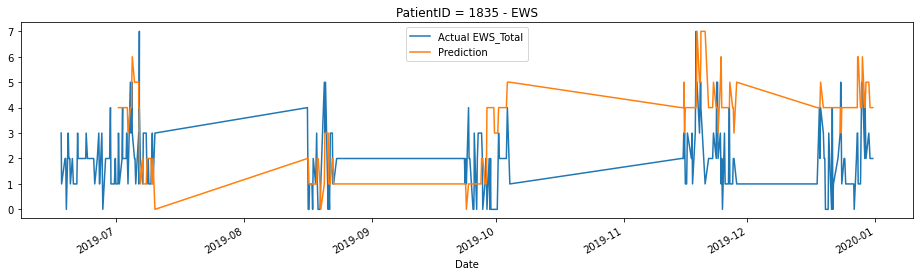

EWS Score prediction :

Accurate = 		 13.513513513513514 %
Accurate + 1 off = 	 43.24324324324324 %
Accurate + max 2 off = 	 71.89189189189189 %


In [173]:
EWSmultiARIMA(1835, ('2019-06-15', '2020-01-01'), 185, [(2,1,1), (0,1,0), (0,0,0), (1,1,1), (3,0,1), (1,1,3), (1,1,1)] )


PatientID =  5797 ,  Nbr of Observations =  422 



<Figure size 1152x288 with 0 Axes>

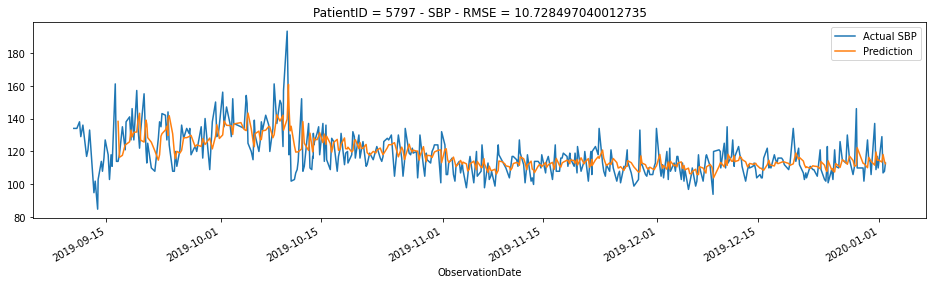

<Figure size 1152x288 with 0 Axes>

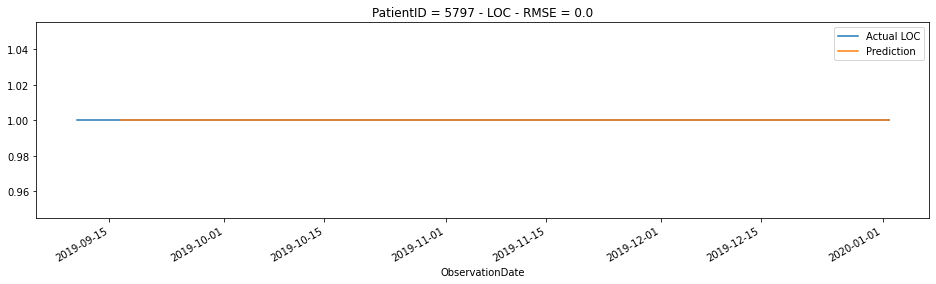

<Figure size 1152x288 with 0 Axes>

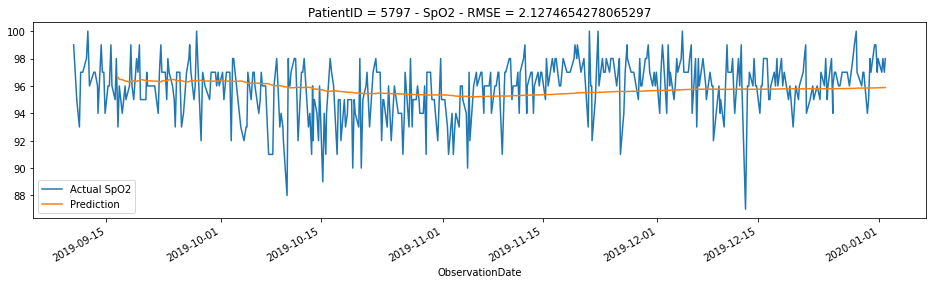

<Figure size 1152x288 with 0 Axes>

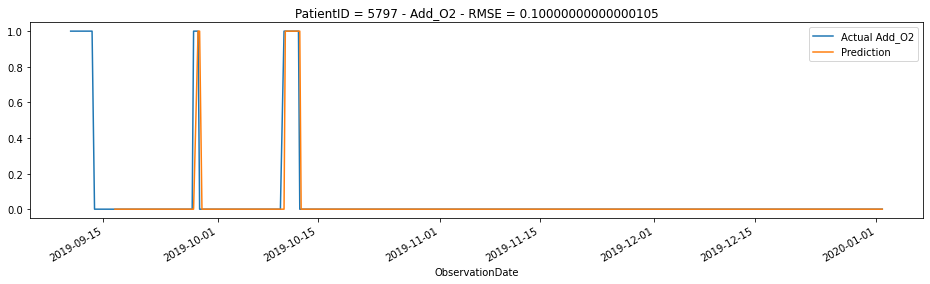

<Figure size 1152x288 with 0 Axes>

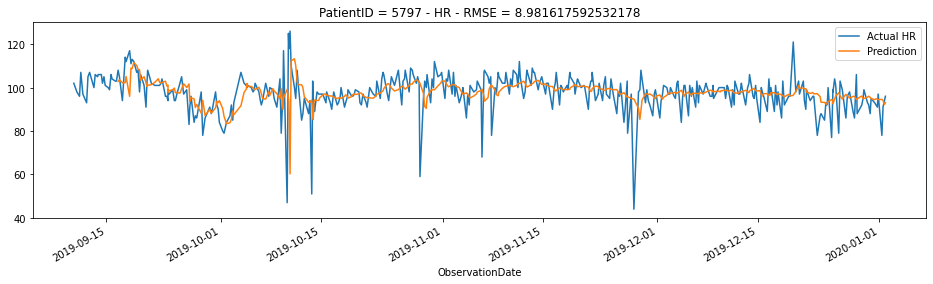

<Figure size 1152x288 with 0 Axes>

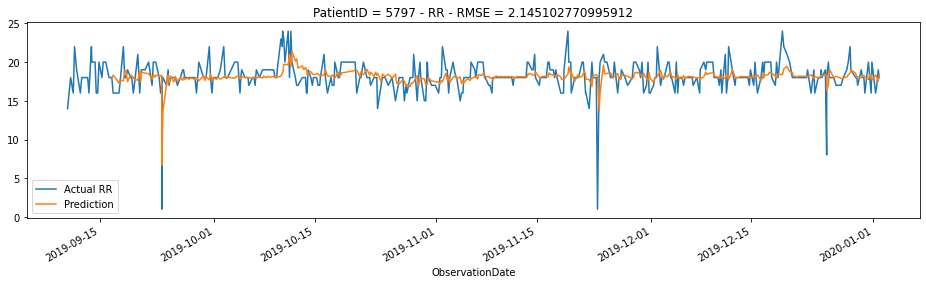

<Figure size 1152x288 with 0 Axes>

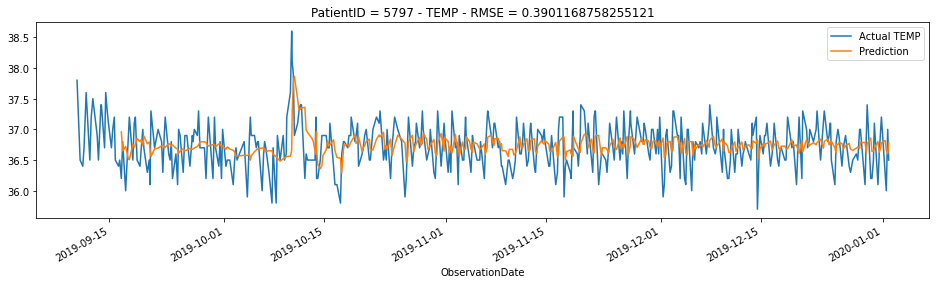

<Figure size 1152x576 with 0 Axes>

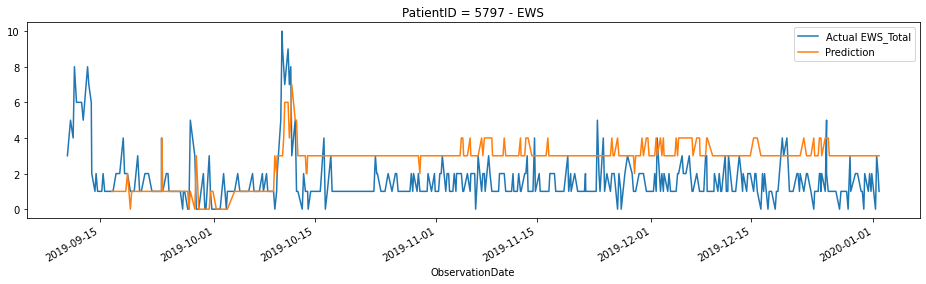

EWS Score prediction :

Accurate = 		 16.0 %
Accurate + 1 off = 	 44.0 %
Accurate + max 2 off = 	 86.75 %


In [17]:
EWSmultiARIMA(5797, ('2019-06-15', '2020-01-01'), 400, [(2,1,1), (0,1,0), (0,0,0), (1,1,1), (3,0,1), (1,1,3), (1,1,1)] )


PatientID =  4614 ,  Nbr of Observations =  202 



<Figure size 1152x288 with 0 Axes>

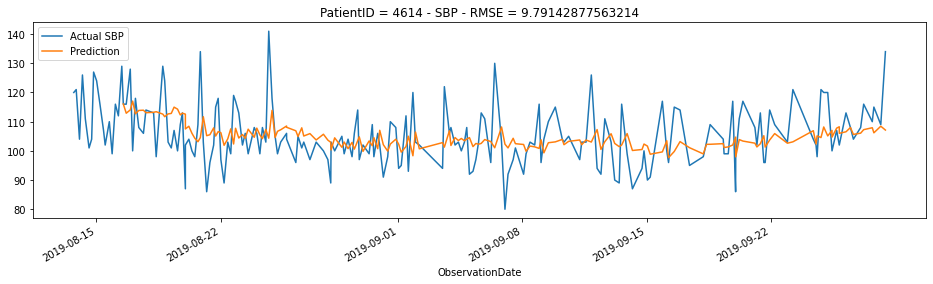

<Figure size 1152x288 with 0 Axes>

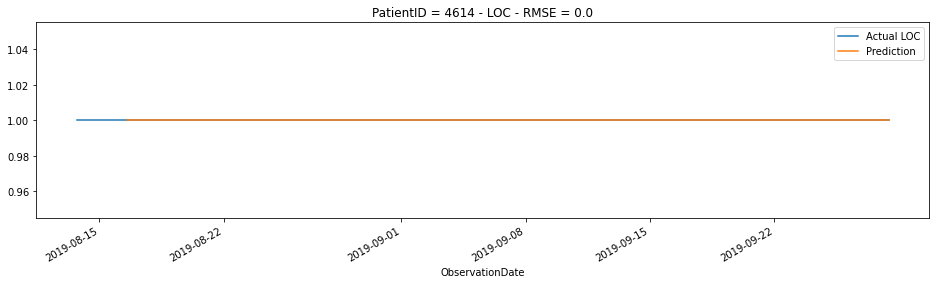

<Figure size 1152x288 with 0 Axes>

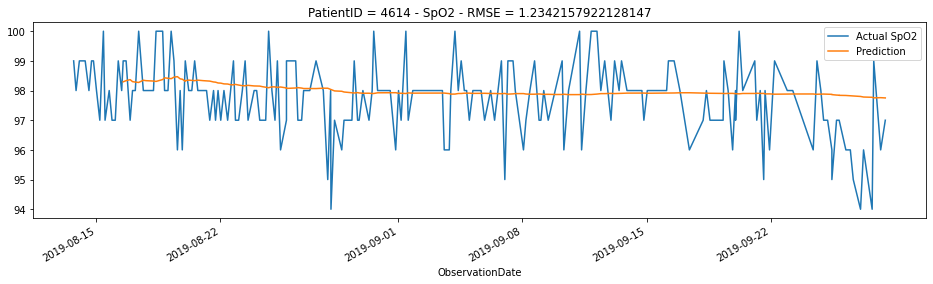

<Figure size 1152x288 with 0 Axes>

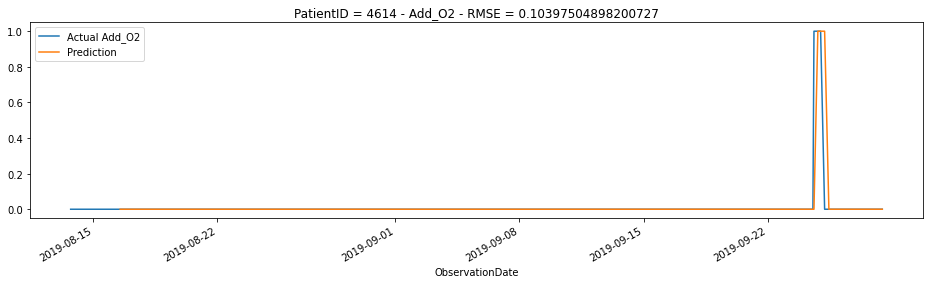

<Figure size 1152x288 with 0 Axes>

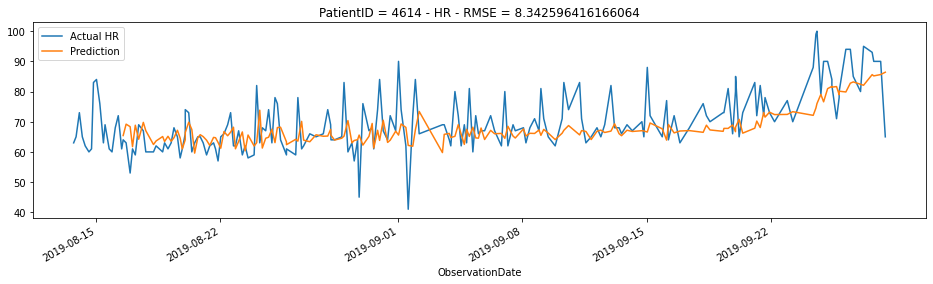

<Figure size 1152x288 with 0 Axes>

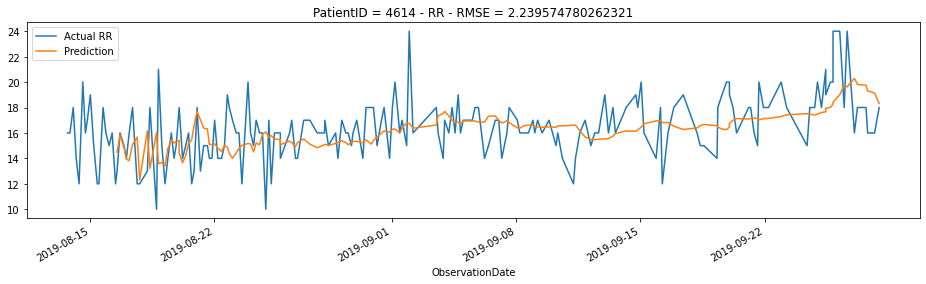

<Figure size 1152x288 with 0 Axes>

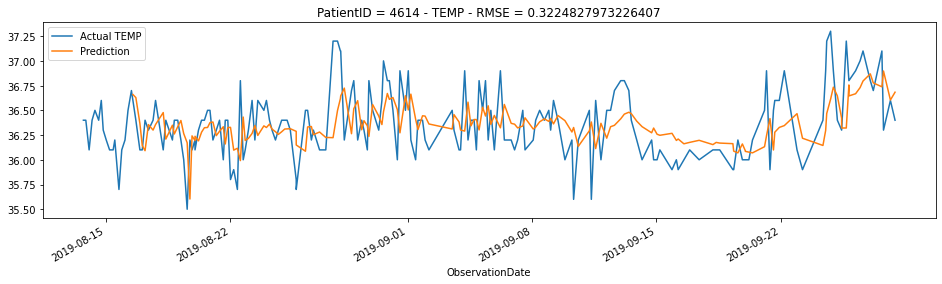

<Figure size 1152x576 with 0 Axes>

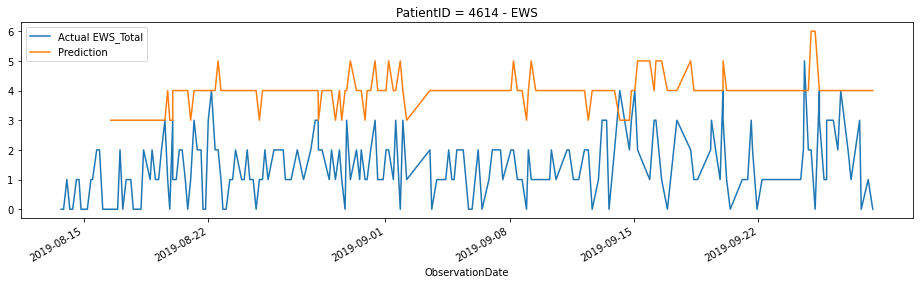

EWS Score prediction :

Accurate = 		 3.783783783783784 %
Accurate + 1 off = 	 18.37837837837838 %
Accurate + max 2 off = 	 49.18918918918919 %


In [18]:
EWSmultiARIMA(4614, ('2019-06-15', '2020-01-01'), 185, [(2,1,1), (0,1,0), (0,0,0), (1,1,1), (3,0,1), (1,1,3), (1,1,1)] )


PatientID =  1743 ,  Nbr of Observations =  615 



<Figure size 1152x288 with 0 Axes>

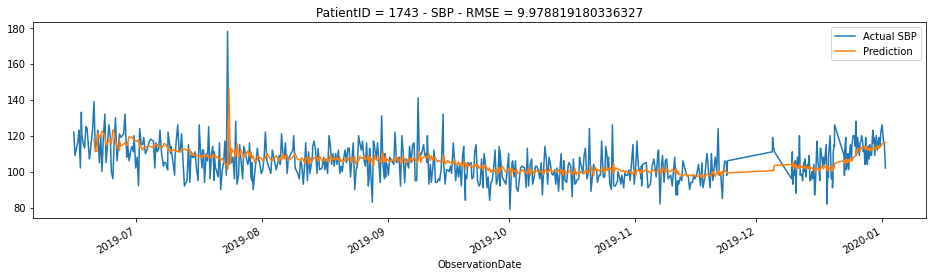

<Figure size 1152x288 with 0 Axes>

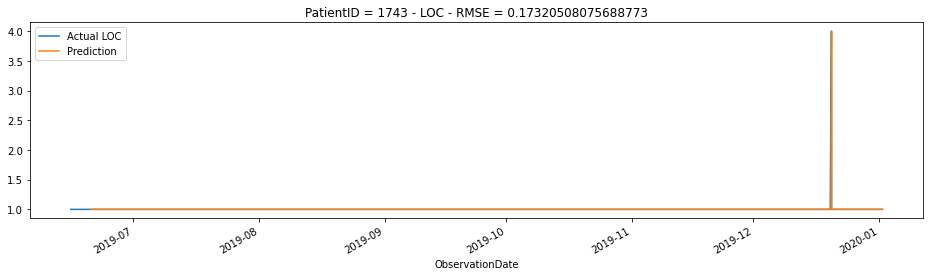

<Figure size 1152x288 with 0 Axes>

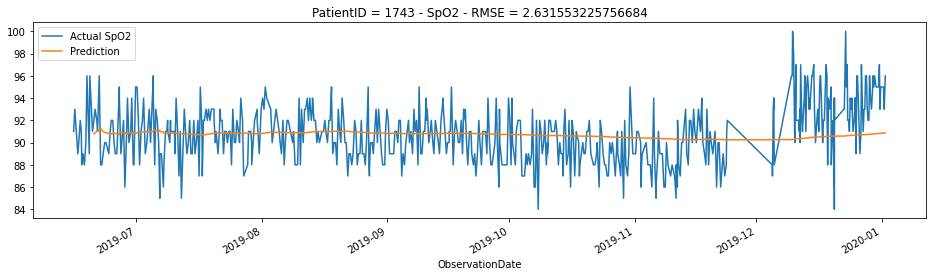

<Figure size 1152x288 with 0 Axes>

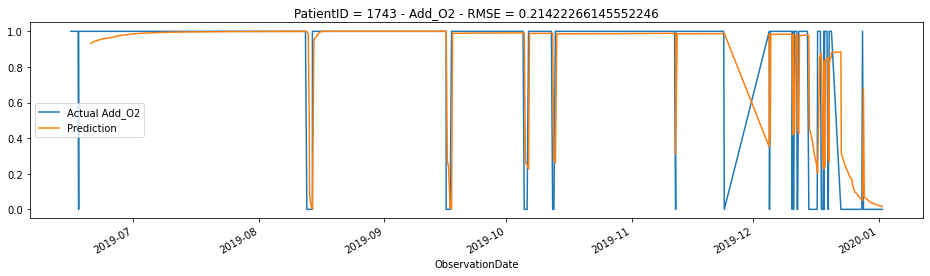

<Figure size 1152x288 with 0 Axes>

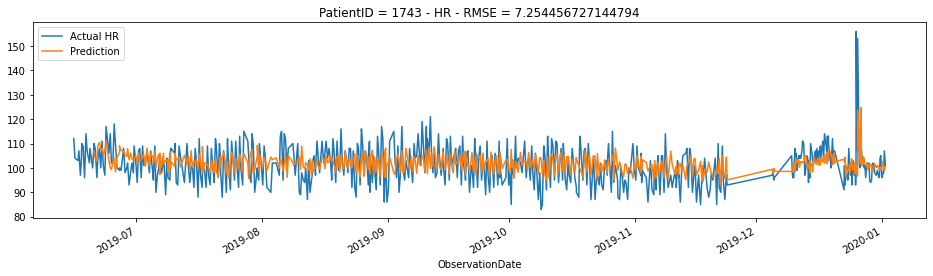

<Figure size 1152x288 with 0 Axes>

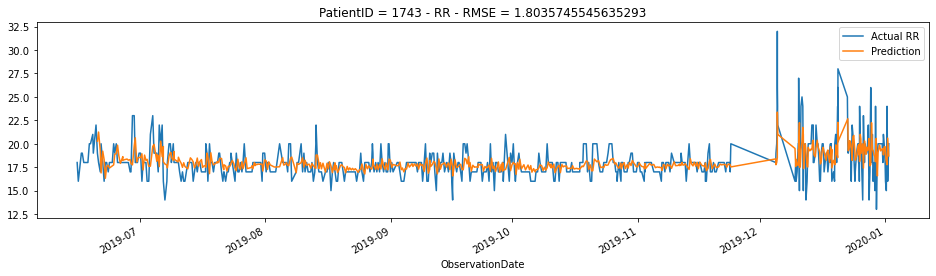

<Figure size 1152x288 with 0 Axes>

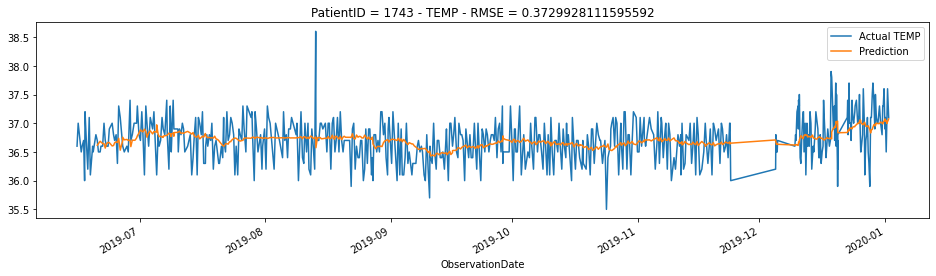

<Figure size 1152x576 with 0 Axes>

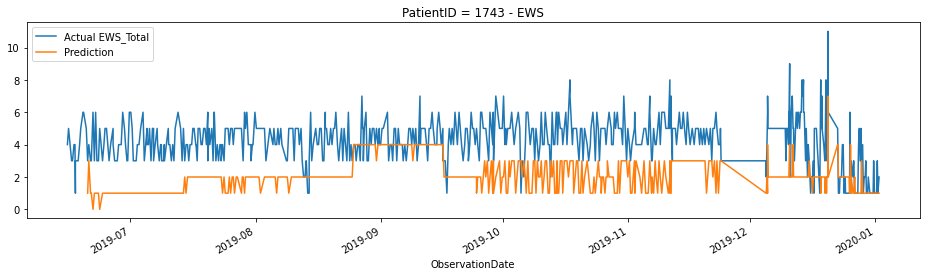

EWS Score prediction :

Accurate = 		 9.833333333333332 %
Accurate + 1 off = 	 32.666666666666664 %
Accurate + max 2 off = 	 56.99999999999999 %


In [19]:
EWSmultiARIMA(1743, ('2019-06-15', '2020-01-01'), 600, [(2,1,1), (0,1,0), (0,0,0), (1,1,1), (3,0,1), (1,1,3), (1,1,1)] )

In [ ]:
# TO DO EWSmultiARIMA(6995, ('2019-10-28', '2019-11-19'), 260, [(2,1,1), (0,1,0), (0,0,0), (1,1,1), (3,0,1), (1,1,3), (1,1,1)] )

In [ ]:
# TO DO EWSmultiARIMA(6775, ('2019-10-28', '2019-11-19'), 260, [(2,1,1), (0,1,0), (0,0,0), (1,1,1), (3,0,1), (1,1,3), (1,1,1)] )

In [ ]:
# TO DO EWSmultiARIMA(5678, ('2019-10-28', '2019-11-19'), 260, [(2,1,1), (0,1,0), (0,0,0), (1,1,1), (3,0,1), (1,1,3), (1,1,1)] )


PatientID =  7777 ,  Nbr of Observations =  191 



<Figure size 1152x288 with 0 Axes>

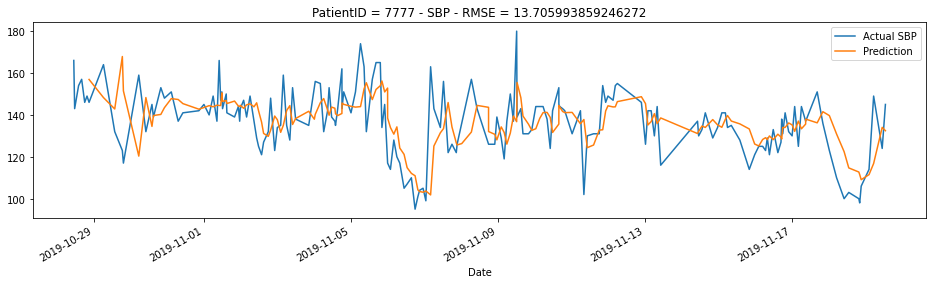

<Figure size 1152x288 with 0 Axes>

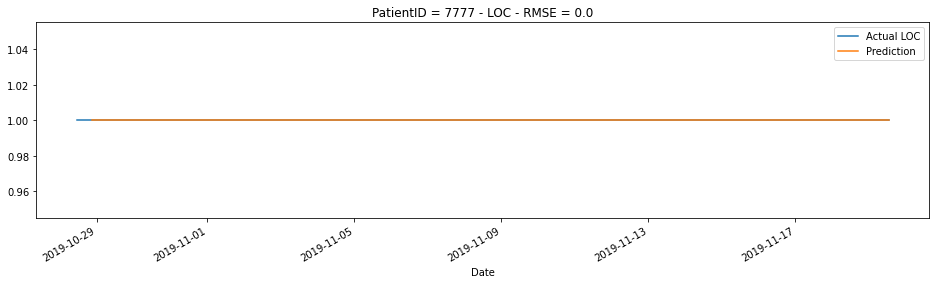

<Figure size 1152x288 with 0 Axes>

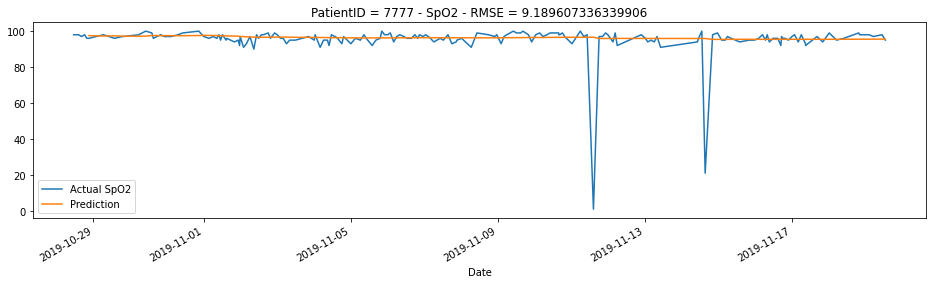

<Figure size 1152x288 with 0 Axes>

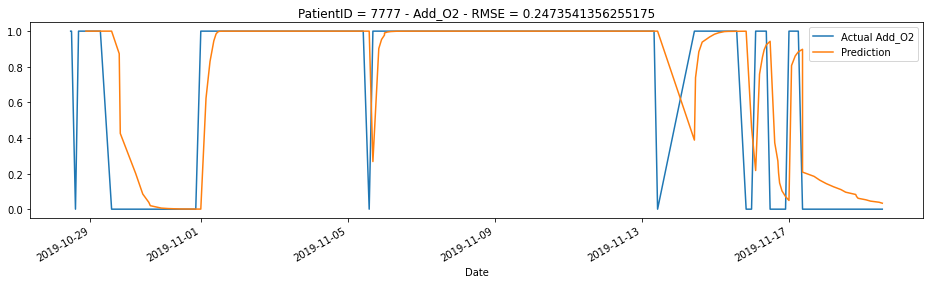

<Figure size 1152x288 with 0 Axes>

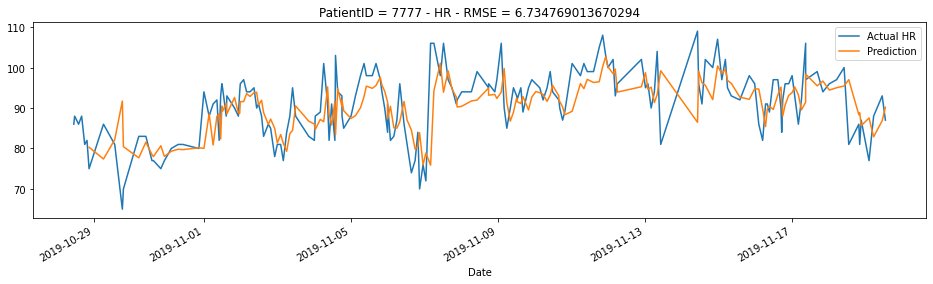

LinAlgError: Schur decomposition solver error.

In [170]:
#EWSmultiARIMA(7777, ('2019-10-28', '2019-11-19'), 185, [(2,1,1), (0,1,0), (0,0,0), (1,1,1), (3,0,1), (1,1,3), (1,1,1)] )

##### Observation:

The PDQ hyperparameters for the ARIMA algorithm were derived from one patients data. The PDQ list seems to work reasonably well for some patients, but less good for others. We need a set of PDQ values that works for most patients.


TO DO: derive the PDQ list for a large number of patients and select the ones that work for the most patients.